#3820231102-KIMMINJUN

从Kaggle到Colab下载数据集

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'movies-dataset-from-piracy-website:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2922294%2F5035020%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240324%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240324T145807Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D61d9ae2164867782e3e3bad6a79e2aa4f75f5c081a9262a9b33e38befa38157f93e3296b528763a2afa7ea0a2c064149732802a5b2e8b3bd055fe5faaffd81c6a8ca125cc973093f2577c8575de6ad7e8c56069b7baea79e337db812c1062dfb4839a691bd09c74a75959033f8a15452bde76f4bf9929ece1993bf1fd11840d1862e2003d1beda29aacebac878bd142dffe55bcc0dba8b4cdad080efcf50b7effd6359dc9fbe50c406295f3793a8c7880f156f6c70cfa2ce4f964f15183fcb3f3617c0c27ebe1abb895b359e7d649ea7af1493de716a67127fad56a16f402516567956ca0f26a8ccf93ce4d319da7794efbfed7f8dc29ca4fd34e24fc7c8e37c'

DATASET_PATH='/content'


for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(DATASET_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 3713705 bytes downloaded
Downloaded and uncompressed: movies-dataset-from-piracy-website
Data source import complete.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

## 1. 数据摘要
### 列

`id`: movie's unique id

`title`: movie's name

`storyline`: a short description of the movie

`views`: no. of clicks per movie

`downloads`: no. of downloads per movie

`IMDb-rating`: rating

`appropriate_for`: R-rated, PG-13, etc

`language`: this can be multiple languages also

`industry`: Hollywood, Bollywood, etc.

`posted_date`: when the movie is posted on the platform

`release_date`: when the movie is released worldwide

`run_time`: in minutes

`director`: director's name

`writer`: list of all the writers

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Load data set.
mov_data = pd.read_csv('/content/movies-dataset-from-piracy-website/movies_dataset.csv')

# Check the columns.
mov_data.columns

Index(['Unnamed: 0', 'IMDb-rating', 'appropriate_for', 'director', 'downloads',
       'id', 'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

In [4]:
# Drop the irrelevant volumn 'Unnamed: 0'
mov_data = mov_data.drop(columns='Unnamed: 0')

# Check the columns.
mov_data.columns

Index(['IMDb-rating', 'appropriate_for', 'director', 'downloads', 'id',
       'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

#### 数据类型、数据示例、唯一值和缺失值
创建一个DataFrame来展示原始`mov_data`每一列的数据类型、示例、唯一值和缺失值。

`dtype`: the data type of the column.

`eg.`: the specimen of the column.

`num_unique`: number of unique values of the column.

`null_share`: the share of missing values of the column.

In [5]:
def dtype_uni_miss(mov_data):
    cols, dtype, specimens, num_unique, null_share = [], [], [], [], []

    for column in mov_data:
        cols.append(column)
        col_dtype = mov_data[column].dtype
        dtype.append(col_dtype)

        specimen = mov_data.loc[mov_data[column].first_valid_index(), column]
        specimens.append(specimen)

        num_unique.append(mov_data[column].nunique())

        null_sum = mov_data[column].isna().sum()
        null_to_len = null_sum / len(mov_data[column])
        null_share.append(f'{null_to_len:.2%}')

    df = pd.DataFrame(list(zip(dtype, specimens, num_unique, null_share)), index=cols)
    df.columns=['dtype', 'eg.', 'num_unique', 'null_share']

    return df

In [6]:
dtype_uni_miss(mov_data)

dtype                                                eg.  \
IMDb-rating      float64                                                4.8   
appropriate_for   object                                                  R   
director          object                                          John Swab   
downloads         object                                                304   
id                 int64                                             372092   
industry          object                                Hollywood / English   
language          object                                            English   
posted_date       object                                       20 Feb, 2023   
release_date      object                                        Jan 28 2023   
run_time          object                                                105   
storyline         object  Doc\r\n facilitates a fragile truce between th...   
title             object                                       Little Dixie   
views             object                                              2,794   
writer            object                                          John Swab   

                 num_unique null_share  
IMDb-rating              85      4.09%  
appropriate_for          21     46.12%  
director               9672      9.43%  
downloads             10625      0.00%  
id                    17086      0.00%  
industry                 10      0.00%  
language               1168      2.64%  
posted_date            4123      0.00%  
release_date           4886      0.00%  
run_time                415      8.60%  
storyline             15748      8.28%  
title                 16572      0.00%  
views                 16821      0.00%  
writer                13603     10.67%

列`downloads`和`views`应该是数值属性，而列`id`应该是字符串。

In [7]:
for col in 'downloads', 'views':
    mov_data[col] = mov_data[col].str.replace(',','')
    mov_data[col] = mov_data[col].astype('float')

mov_data['id'] = mov_data['id'].astype('str')

In [8]:
# Show the basic information of the dataset again.
dtype_uni_miss(mov_data)

dtype                                                eg.  \
IMDb-rating      float64                                                4.8   
appropriate_for   object                                                  R   
director          object                                          John Swab   
downloads        float64                                              304.0   
id                object                                             372092   
industry          object                                Hollywood / English   
language          object                                            English   
posted_date       object                                       20 Feb, 2023   
release_date      object                                        Jan 28 2023   
run_time          object                                                105   
storyline         object  Doc\r\n facilitates a fragile truce between th...   
title             object                                       Little Dixie   
views            float64                                             2794.0   
writer            object                                          John Swab   

                 num_unique null_share  
IMDb-rating              85      4.09%  
appropriate_for          21     46.12%  
director               9672      9.43%  
downloads             10625      0.00%  
id                    17086      0.00%  
industry                 10      0.00%  
language               1168      2.64%  
posted_date            4123      0.00%  
release_date           4886      0.00%  
run_time                415      8.60%  
storyline             15748      8.28%  
title                 16572      0.00%  
views                 16821      0.00%  
writer                13603     10.67%

可以对 mov_data 进行概述

In [9]:
mov_data.head()

IMDb-rating appropriate_for      director  downloads      id  \
0          4.8               R     John Swab      304.0  372092   
1          6.4           TV-PG   Paul Ziller       73.0  372091   
2          5.2               R  Ben Wheatley     1427.0  343381   
3          8.1             NaN  Venky Atluri     1549.0  372090   
4          4.6             NaN  Shaji Kailas      657.0  372089   

              industry       language   posted_date release_date  run_time  \
0  Hollywood / English        English  20 Feb, 2023  Jan 28 2023       105   
1  Hollywood / English        English  20 Feb, 2023  Feb 05 2023        84   
2  Hollywood / English  English,Hindi  20 Apr, 2021  Jun 18 2021  1h 47min   
3            Tollywood          Hindi  20 Feb, 2023  Feb 17 2023       139   
4            Tollywood          Hindi  20 Feb, 2023  Jan 26 2023       122   

                                           storyline  \
0  Doc\r\n facilitates a fragile truce between th...   
1  Caterer\r\n Goldy Berry reunites with detectiv...   
2  As the world searches for a cure to a disastro...   
3  The life of a young man and his struggles agai...   
4  A man named Kalidas gets stranded due to the p...   

                                        title    views                  writer  
0                                Little Dixie   2794.0               John Swab  
1  Grilling Season: A Curious Caterer Mystery   1002.0  John Christian Plummer  
2                                In the Earth  14419.0            Ben Wheatley  
3                                      Vaathi   4878.0            Venky Atluri  
4                                       Alone   2438.0        Rajesh Jayaraman

查看是否有重复的行。如果是，则删除它们。

In [ ]:
mov_data.duplicated().sum()

可以看到没有需要删除的重复行。

### 标称属性

`id`: movie's unique id

`title`: movie's name

`storyline`: a short description of the movie

`appropriate_for`: R-rated, PG-13, etc

`language`: this can be multiple languages also

`industry`: Hollywood, Bollywood, etc.

`posted_date`: when the movie is posted on the platform

`release_date`: when the movie is released worldwide

`runtime`: in minutes

`director`: director's name

`writer`: list of all the writers

没有重复的行。但是，由于`id`是每部电影的唯一标识符，重要的是查看`id`是否存在重复的条目，以及如何处理它。对于其他名义属性，我们需要查看它们的频率。

#### *频数 -- `id`*

In [ ]:
mov_data['id'].value_counts()

可以看到一些电影被描述了多次，甚至高达402次。现在我们可以看一个例子，看看这些描述相同电影ID的细节如何不同，因为我们先前已经看到没有重复的行。

In [ ]:
# Take id == '372090' as an example.
mov_data[mov_data['id'] == '372090']

可以看到，对于电影372090的描述只在`downloads`和`views`（都是数值属性）方面有所不同。趋势是这样的：如果`views`次数更高，则`downloads`次数也会更高。因此，数据集中的这种差异可能是由电影盗版造成的。因此，使用具有最高`downloads`和`views`次数的数据来代表电影的信息是合理的，并且仅按照这种方法保留一个电影的描述。

注意，在此操作之后，其他名义属性的频率将更加合理。

In [10]:
mov_data.groupby('id').agg(id_count=('id', 'count')).query('id_count > 1').sort_values(by='id_count', ascending=False)

id_count
id              
371744       402
371877       402
372090       402
371936       202
371740       202
...          ...
12600          2
12523          2
12522          2
12521          2
9976           2

[107 rows x 1 columns]

In [11]:
non_unique_id_mov_data = mov_data.groupby('id').agg(id_count=('id', 'count')).query('id_count > 1').sort_values(by='id_count', ascending=False).index.to_list()
# non_unique_id_mov_data

In [12]:
mov_data.query('id in @non_unique_id_mov_data')

IMDb-rating appropriate_for          director  downloads      id  \
0              4.8               R         John Swab      304.0  372092   
3              8.1             NaN      Venky Atluri     1549.0  372090   
11             9.0             NaN      Rohit Dhawan    12954.0  372039   
14             7.1               R  Elegance Bratton      463.0  371991   
19             4.7             NaN       Sean Lahiff     1453.0  371943   
...            ...             ...               ...        ...     ...   
20542          7.2             NaN      C.V. Sridhar     2266.0   26428   
20543          NaN             NaN               NaN     1998.0   28957   
20544          7.7             NaN         Bimal Roy     6080.0   28958   
20546          NaN             NaN               NaN      309.0  371669   
20547          NaN             NaN               NaN     2613.0  371816   

                  industry       language   posted_date release_date  \
0      Hollywood / English        English  20 Feb, 2023  Jan 28 2023   
3                Tollywood          Hindi  20 Feb, 2023  Feb 17 2023   
11      Bollywood / Indian          Hindi  18 Feb, 2023  Feb 17 2023   
14     Hollywood / English        English  17 Feb, 2023  Dec 02 2022   
19     Hollywood / English        English  16 Feb, 2023  Dec 01 2022   
...                    ...            ...           ...          ...   
20542   Bollywood / Indian  Hindi,English  01 Jan, 1970  Mar 22 1968   
20543   Bollywood / Indian          Hindi  01 Jan, 1970  Mar 13 1959   
20544   Bollywood / Indian          Hindi  01 Jan, 1970  May 13 1955   
20546            Wrestling        English  10 Feb, 2023  Feb 09 2023   
20547            Wrestling        English  14 Feb, 2023  Feb 13 2023   

       run_time                                          storyline  \
0           105  Doc\r\n facilitates a fragile truce between th...   
3           139  The life of a young man and his struggles agai...   
11          142  Bantu\r\n is hated by his father Valmiki since...   
14           95  A\r\n young, gay Black man, rejected by his mo...   
19           93  An\r\n aspiring documentarian and two conserva...   
...         ...                                                ...   
20542  2h 36min  Dr. Ravi returns from abroad and takes up posi...   
20543       NaN                                                NaN   
20544       159  Devdas and Parvati had been inseparable as chi...   
20546       NaN                                                NaN   
20547       NaN                                                NaN   

                       title    views  \
0               Little Dixie   2794.0   
3                     Vaathi   4878.0   
11                  Shehzada  35831.0   
14            The Inspection   5763.0   
19                  Carnifex  11626.0   
...                      ...      ...   
20542                 Saathi   5932.0   
20543             Bhai-Bahen   6219.0   
20544                 Devdas  16376.0   
20546  TNA.Impact 2023-02-09   1419.0   
20547     WWE Raw 2023-02-13   6697.0   

                                                  writer  
0                                              John Swab  
3                                           Venky Atluri  
11       Hussain Dalal, Rohit Dhawan, Trivikram Srinivas  
14                                      Elegance Bratton  
19                                        Shanti Gudgeon  
...                                                  ...  
20542                         Abrar Alvi, Raj Baldev Raj  
20543                                                NaN  
20544  Rajinder Singh Bedi, Saratchandra Chatterjee, ...  
20546                                                NaN  
20547                                                NaN  

[3569 rows x 14 columns]

In [13]:
id_count = mov_data.query('id in @non_unique_id_mov_data').groupby('id').agg(id_count=('id', 'count')).query('id_count > 1').sort_values(by='id_count', ascending=False)
id_count

id_count
id              
371744       402
371877       402
372090       402
371936       202
371740       202
...          ...
12600          2
12523          2
12522          2
12521          2
9976           2

[107 rows x 1 columns]

看起来奇怪的是，列表`non_unique_id_mov_data` 的长度为107，而按`title`分组的DataFrame只有106行。让我们找出原因。

In [14]:
title_list = []
for id in non_unique_id_mov_data:
    title = mov_data[mov_data['id'] == id]['title'].iloc[0]
    title_list.append(title)
    # print(title)

title_data = pd.DataFrame(title_list)
title_data.value_counts()

Bodyguard                 2
A Dangerous Method        1
Spy Game                  1
The Condemned             1
The Company Men           1
                         ..
K-11                      1
Ittefaq                   1
Ishq Schoolay             1
Hum Bhi Umeed Say Hain    1
Your Place or Mine        1
Length: 106, dtype: int64

In [15]:
# 2 movies with the same name -- 'Bodyguard'.
mov_data[mov_data['title'] == 'Bodyguard']

IMDb-rating appropriate_for            director  downloads     id  \
17239          5.1             NaN  Gopichand Malineni    30110.0  12017   
17248          5.1             NaN  Gopichand Malineni    30110.0  12017   
18287          4.7       Not Rated            Siddique   160296.0   7048   
18290          4.7       Not Rated            Siddique   160296.0   7048   

                 industry       language   posted_date release_date run_time  \
17239           Tollywood         Telugu  25 Oct, 2012  Oct 24 2012      150   
17248           Tollywood         Telugu  25 Oct, 2012  Oct 24 2012      150   
18287  Bollywood / Indian  Hindi,English  01 Sep, 2011  Aug 31 2011      130   
18290  Bollywood / Indian  Hindi,English  01 Sep, 2011  Aug 31 2011      130   

                                               storyline      title     views  \
17239                                                NaN  Bodyguard   75070.0   
17248                                                NaN  Bodyguard   75071.0   
18287  Reading from a diary a lad comes to know about...  Bodyguard  243451.0   
18290  Reading from a diary a lad comes to know about...  Bodyguard  243452.0   

                                          writer  
17239  Siddique, Kona Venkat, Gopichand Malineni  
17248  Siddique, Kona Venkat, Gopichand Malineni  
18287     J.P. Chowksey, Kiran Kotrial, Siddique  
18290     J.P. Chowksey, Kiran Kotrial, Siddique

可以看到有一些电影的名称相同，但实际上是不同的电影。因此，按照`title` 分组并不是正确的分析方法。








In [16]:
id_count = pd.DataFrame(mov_data['id'].value_counts())
id_count.rename(columns={'id':'id_count'}, inplace=True)
id_count = id_count.query('id_count > 1').sort_values(by='id_count', ascending=True)
id_count

id_count
9430           2
9728           2
894            2
6857           2
21422          2
...          ...
371991       202
372092       202
371877       402
371744       402
372090       402

[107 rows x 1 columns]

In [17]:
# Reindex this table
id_title_dict = {}
for id in non_unique_id_mov_data:
    title = mov_data[mov_data['id'] == id]['title'].iloc[0]
    id_title_dict[id] = title

title_count = id_count.query('id_count > 1').rename(index=id_title_dict)
title_count

id_count
Boy Wonder                                            2
Ocean's Twelve                                        2
Ishq Schoolay                                         2
Bin Bulaye Baraati                                    2
Strippers vs Werewolves                               2
...                                                 ...
The Inspection                                      202
Little Dixie                                        202
The Girl Who Escaped: The Kara Robinson Story       402
Who Invited Charlie?                                402
Vaathi                                              402

[107 rows x 1 columns]

In [18]:
title_count_list = list(title_count.index)
# title_count_list

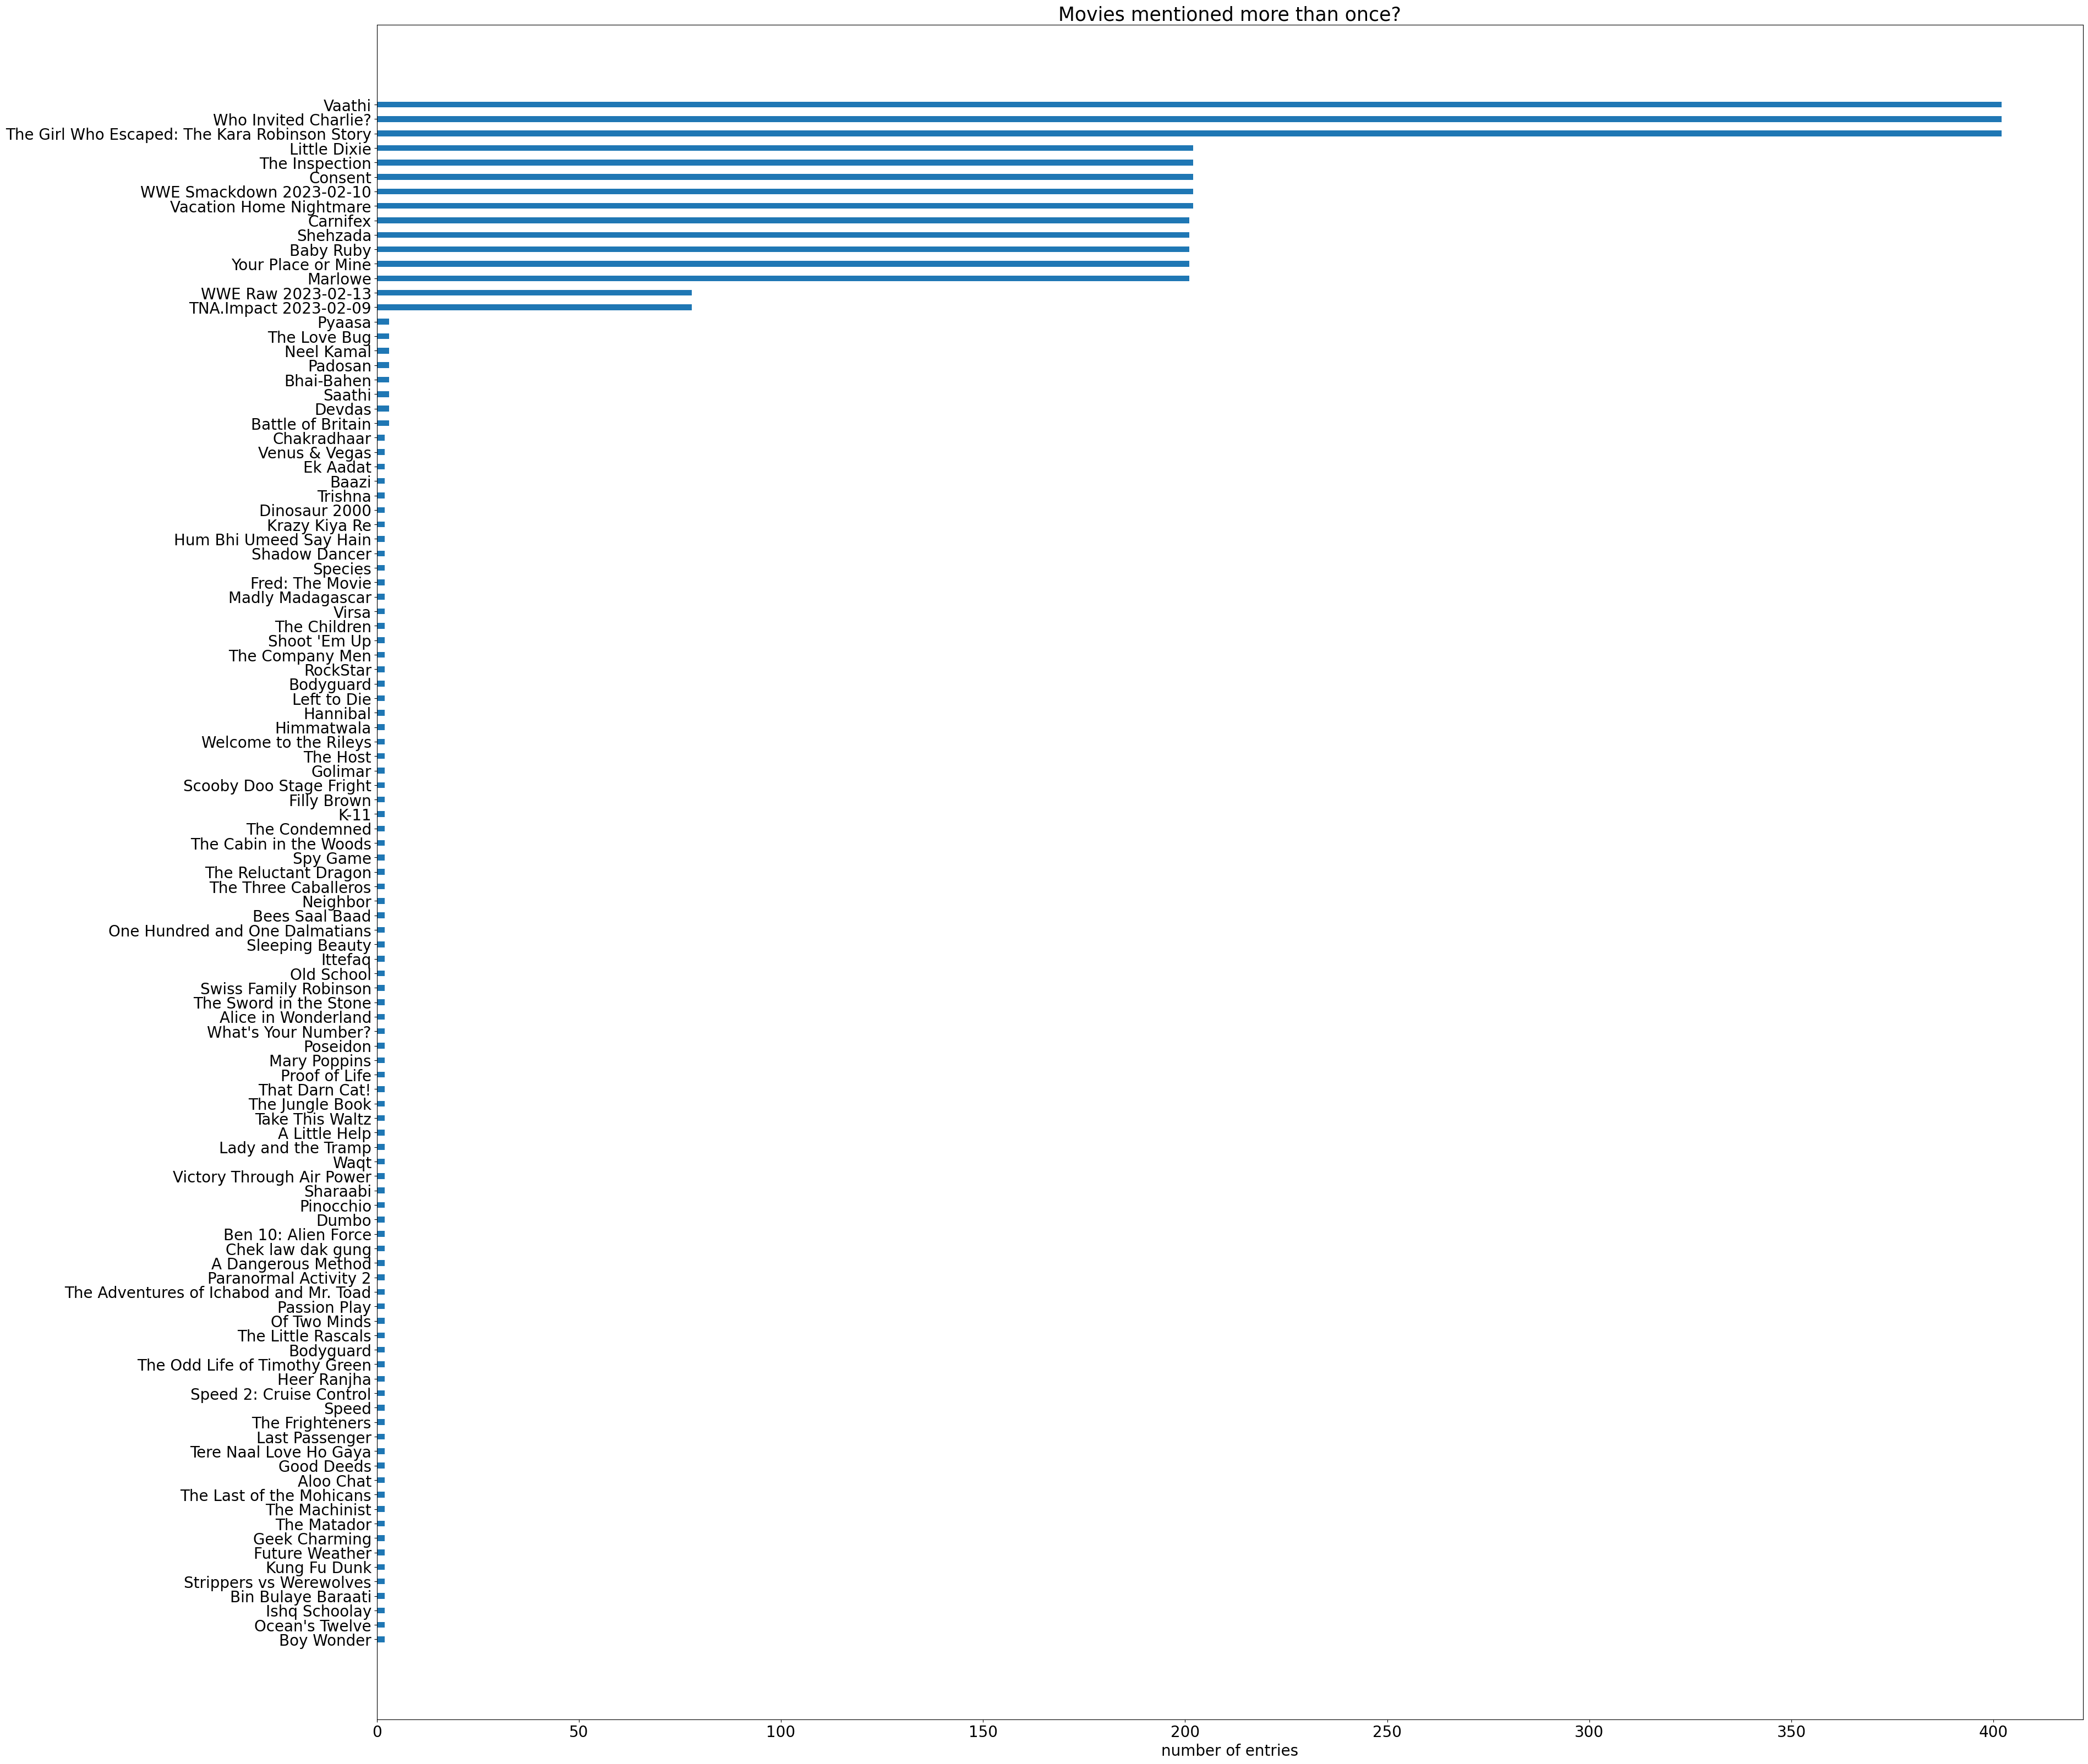

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 40))
plt.yticks(list(range(107)), list(title_count.index), fontsize=20)
plt.xticks(fontsize=20)
plt.barh(id_count.index, width=id_count['id_count'], height=0.4)
plt.ylabel('')
plt.xlabel('number of entries', fontsize=20)
plt.title('Movies mentioned more than once?', fontsize=25, loc='center')
plt.show()

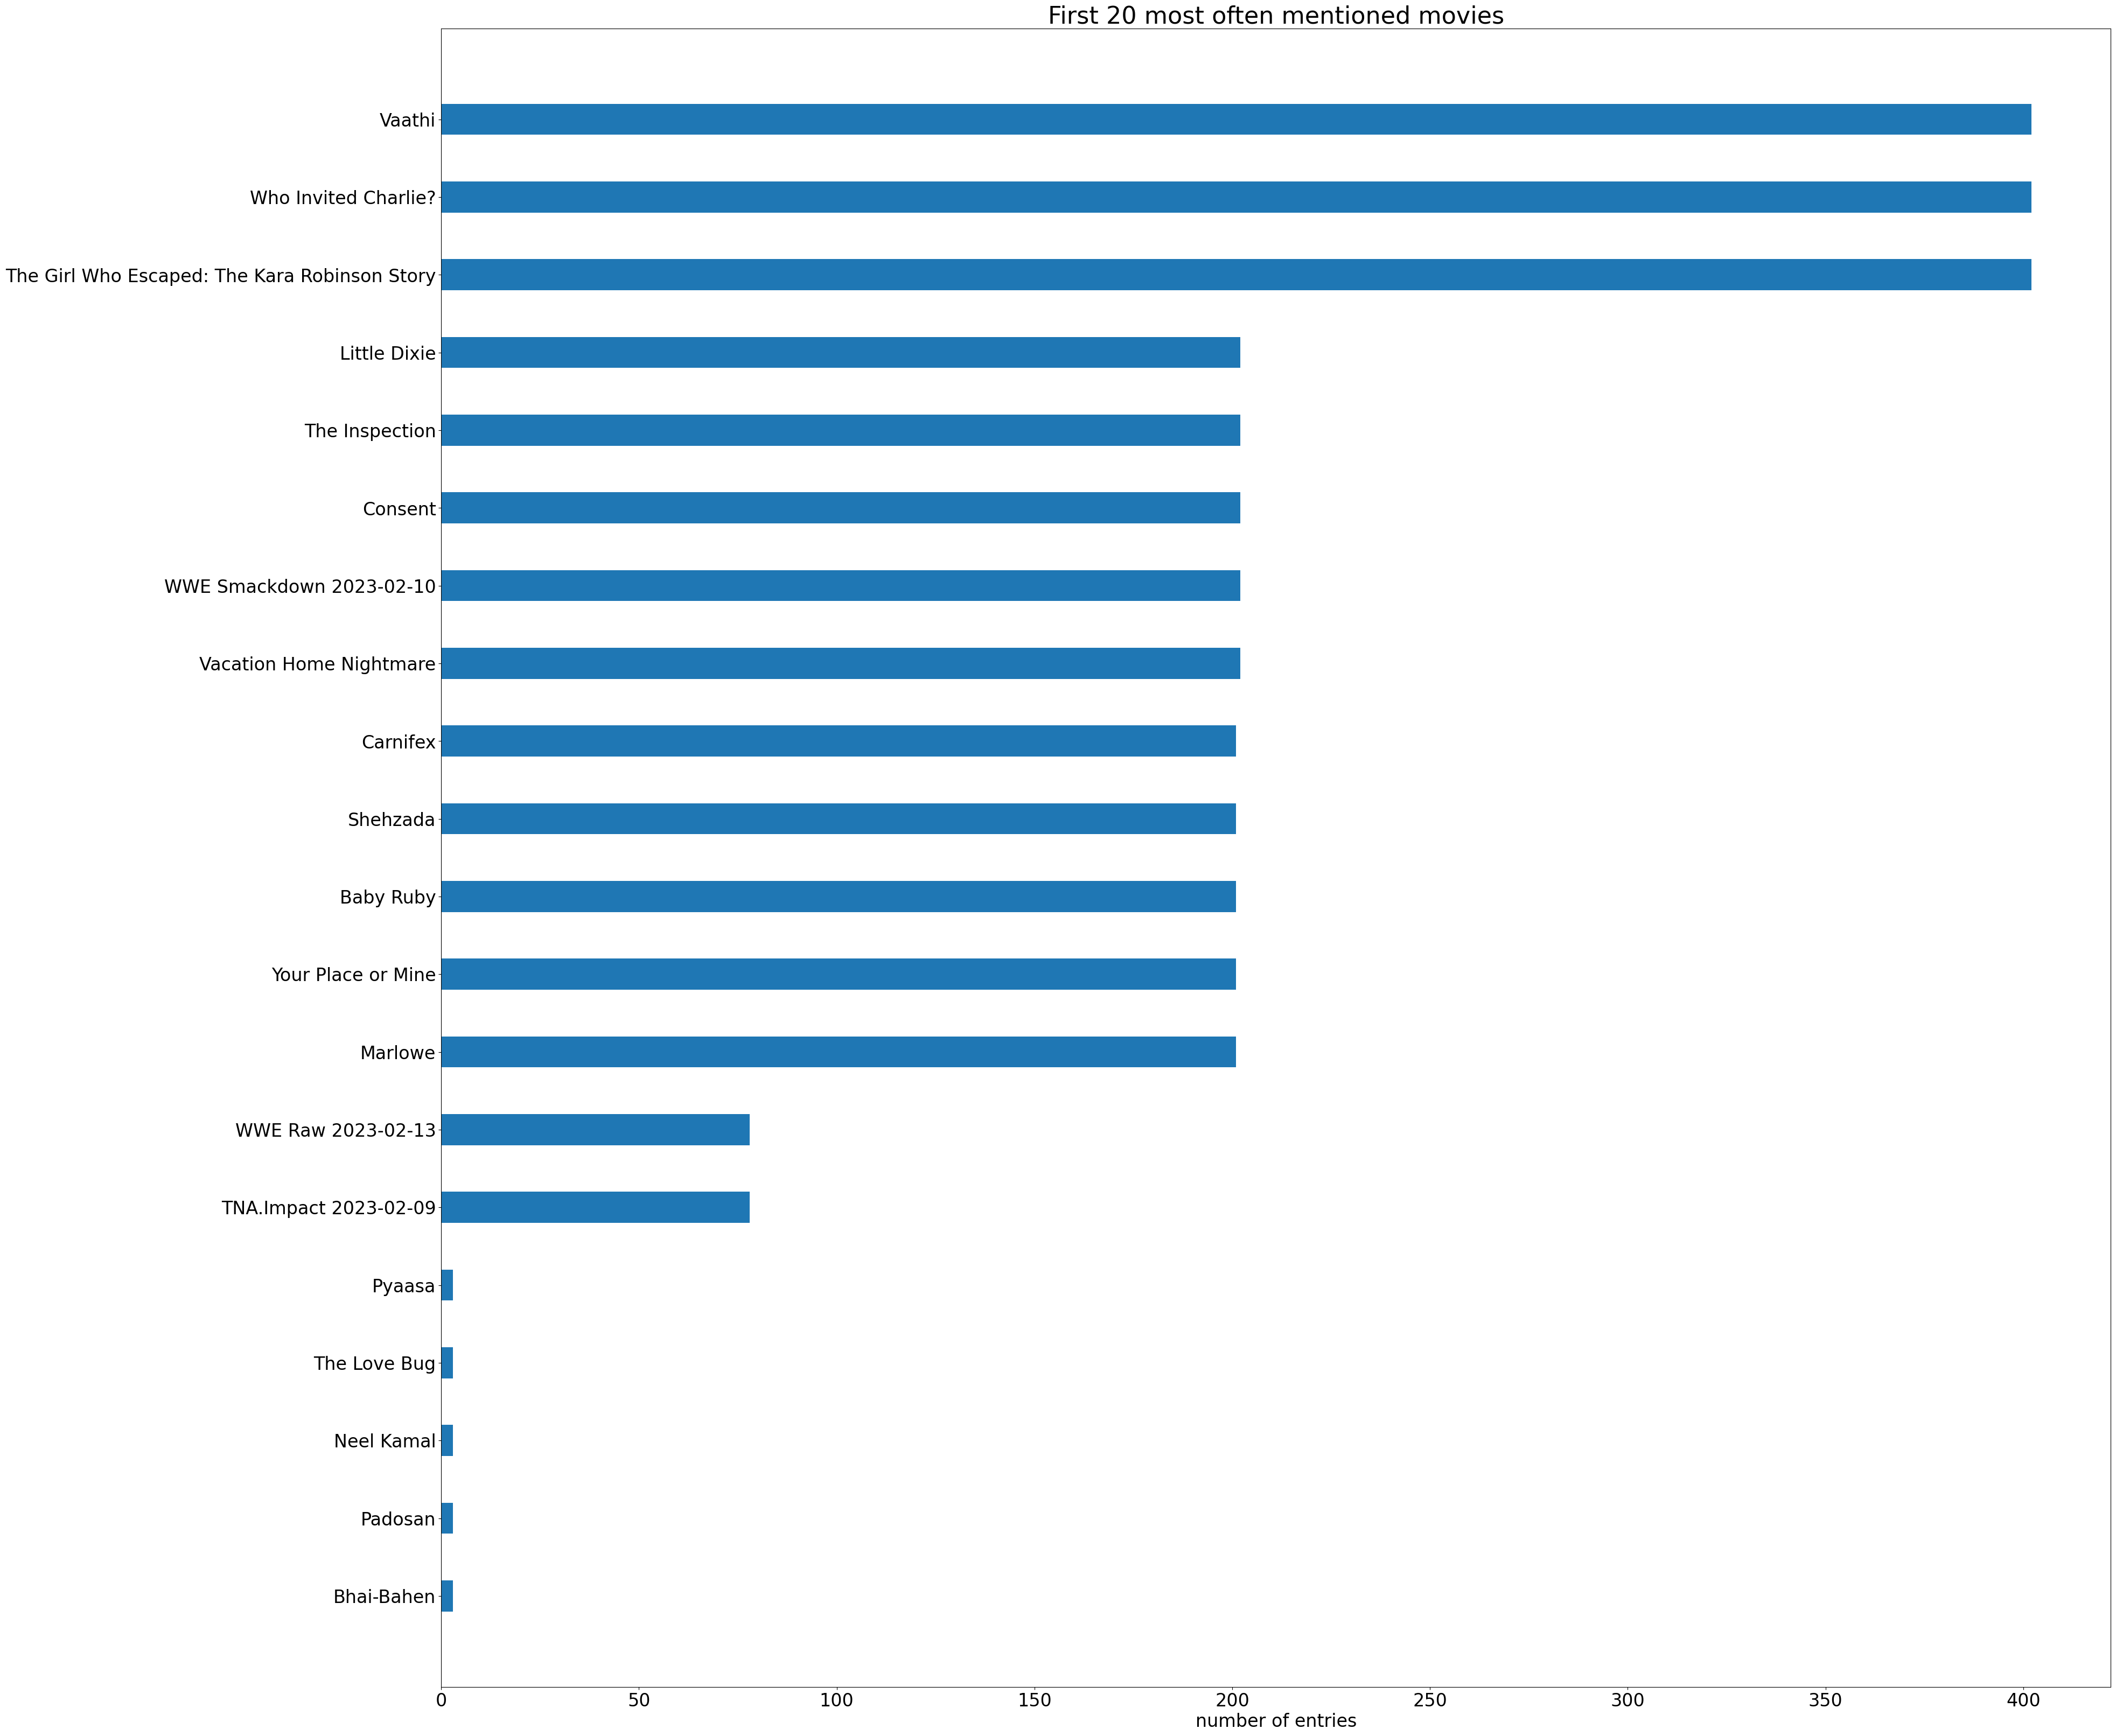

In [20]:
plt.figure(figsize=(40, 40))
plt.yticks(list(range(20)), list(title_count.tail(20).index), fontsize=24)
plt.xticks(fontsize=24)
plt.barh(id_count.tail(20).index, width=id_count['id_count'].tail(20), height=0.4)
plt.ylabel('')
plt.xlabel('number of entries', fontsize=24)
plt.title('First 20 most often mentioned movies', fontsize=32, loc='center')
plt.show()

使用最大的`downloads` 和最大的 `views`作为电影的代表。

In [21]:
# Create a DataFrame with the information of max downloads and max views for non-unique movie ids.
for id in non_unique_id_mov_data:
    non_unique_id_df = mov_data.query('id == @id').groupby('id').agg(max_downloads=('downloads', 'max'), max_views=('views', 'max'))
    max_downloads = non_unique_id_df['max_downloads'].iloc[0]
    max_views = non_unique_id_df['max_views'].iloc[0]

    mov_data.loc[mov_data['id'] == id, 'downloads'] = max_downloads
    mov_data.loc[mov_data['id'] == id, 'views'] = max_views

mov_data

IMDb-rating appropriate_for      director  downloads      id  \
0              4.8               R     John Swab      455.0  372092   
1              6.4           TV-PG   Paul Ziller       73.0  372091   
2              5.2               R  Ben Wheatley     1427.0  343381   
3              8.1             NaN  Venky Atluri     2379.0  372090   
4              4.6             NaN  Shaji Kailas      657.0  372089   
...            ...             ...           ...        ...     ...   
20543          NaN             NaN           NaN     1998.0   28957   
20544          7.7             NaN     Bimal Roy     6080.0   28958   
20545          8.0             NaN           NaN     3276.0   30459   
20546          NaN             NaN           NaN      309.0  371669   
20547          NaN             NaN           NaN     2613.0  371816   

                  industry       language   posted_date release_date  \
0      Hollywood / English        English  20 Feb, 2023  Jan 28 2023   
1      Hollywood / English        English  20 Feb, 2023  Feb 05 2023   
2      Hollywood / English  English,Hindi  20 Apr, 2021  Jun 18 2021   
3                Tollywood          Hindi  20 Feb, 2023  Feb 17 2023   
4                Tollywood          Hindi  20 Feb, 2023  Jan 26 2023   
...                    ...            ...           ...          ...   
20543   Bollywood / Indian          Hindi  01 Jan, 1970  Mar 13 1959   
20544   Bollywood / Indian          Hindi  01 Jan, 1970  May 13 1955   
20545   Bollywood / Indian          Hindi  01 Jan, 1970  Mar 28 1958   
20546            Wrestling        English  10 Feb, 2023  Feb 09 2023   
20547            Wrestling        English  14 Feb, 2023  Feb 13 2023   

       run_time                                          storyline  \
0           105  Doc\r\n facilitates a fragile truce between th...   
1            84  Caterer\r\n Goldy Berry reunites with detectiv...   
2      1h 47min  As the world searches for a cure to a disastro...   
3           139  The life of a young man and his struggles agai...   
4           122  A man named Kalidas gets stranded due to the p...   
...         ...                                                ...   
20543       NaN                                                NaN   
20544       159  Devdas and Parvati had been inseparable as chi...   
20545  1h 50min  While driving his car on a rainy night, Anand'...   
20546       NaN                                                NaN   
20547       NaN                                                NaN   

                                            title    views  \
0                                    Little Dixie   4442.0   
1      Grilling Season: A Curious Caterer Mystery   1002.0   
2                                    In the Earth  14419.0   
3                                          Vaathi   7891.0   
4                                           Alone   2438.0   
...                                           ...      ...   
20543                                  Bhai-Bahen   6219.0   
20544                                      Devdas  16376.0   
20545                                   Madhumati   7220.0   
20546                       TNA.Impact 2023-02-09   1419.0   
20547                          WWE Raw 2023-02-13   6697.0   

                                                  writer  
0                                              John Swab  
1                                 John Christian Plummer  
2                                           Ben Wheatley  
3                                           Venky Atluri  
4                                       Rajesh Jayaraman  
...                                                  ...  
20543                                                NaN  
20544  Rajinder Singh Bedi, Saratchandra Chatterjee, ...  
20545                                                NaN  
20546                                                NaN  
20547                                                N

In [22]:
mov_data.duplicated().sum()

3462

In [23]:
mov_data = mov_data.drop_duplicates()
mov_data

IMDb-rating appropriate_for                   director  downloads  \
0              4.8               R                  John Swab      455.0   
1              6.4           TV-PG                Paul Ziller       73.0   
2              5.2               R               Ben Wheatley     1427.0   
3              8.1             NaN               Venky Atluri     2379.0   
4              4.6             NaN               Shaji Kailas      657.0   
...            ...             ...                        ...        ...   
20521          7.8             NaN                Yash Chopra     2433.0   
20522          7.1       Not Rated                  Biren Nag     1932.0   
20533          5.6               R  Barbara Topsøe-Rothenborg    12284.0   
20534          7.9             NaN                 Raj Kapoor     5625.0   
20545          8.0             NaN                        NaN     3276.0   

           id             industry                language   posted_date  \
0      372092  Hollywood / English                 English  20 Feb, 2023   
1      372091  Hollywood / English                 English  20 Feb, 2023   
2      343381  Hollywood / English           English,Hindi  20 Apr, 2021   
3      372090            Tollywood                   Hindi  20 Feb, 2023   
4      372089            Tollywood                   Hindi  20 Feb, 2023   
...       ...                  ...                     ...           ...   
20521   22874   Bollywood / Indian           Hindi,English  01 Jan, 1970   
20522   23825   Bollywood / Indian                   Hindi  01 Jan, 1970   
20533    1173  Hollywood / English  Spanish,German,English  26 May, 2016   
20534    6839   Bollywood / Indian                   Hindi  01 Jan, 1970   
20545   30459   Bollywood / Indian                   Hindi  01 Jan, 1970   

      release_date  run_time  \
0      Jan 28 2023       105   
1      Feb 05 2023        84   
2      Jun 18 2021  1h 47min   
3      Feb 17 2023       139   
4      Jan 26 2023       122   
...            ...       ...   
20521  Jul 28 1965   178 min   
20522  May 11 1962       158   
20533  Jan 01 1970        90   
20534  Jan 25 1954  3h 13min   
20545  Mar 28 1958  1h 50min   

                                               storyline  \
0      Doc\r\n facilitates a fragile truce between th...   
1      Caterer\r\n Goldy Berry reunites with detectiv...   
2      As the world searches for a cure to a disastro...   
3      The life of a young man and his struggles agai...   
4      A man named Kalidas gets stranded due to the p...   
...                                                  ...   
20521  Members of a family are separated in a natural...   
20522  After a lusty Thakur rapes a young girl, she k...   
20533  LOVE AT FIRST HICCUP is a charming, innocent, ...   
20534  Raju lives as a derelict as a result of being ...   
20545  While driving his car on a rainy night, Anand'...   

                                            title    views  \
0                                    Little Dixie   4442.0   
1      Grilling Season: A Curious Caterer Mystery   1002.0   
2                                    In the Earth  14419.0   
3                                          Vaathi   7891.0   
4                                           Alone   2438.0   
...                                           ...      ...   
20521                                        Waqt   6908.0   
20522                              Bees Saal Baad   6077.0   
20533                        Love at First Hiccup  36022.0   
20534                                      Awaara  13829.0   
20545                                   Madhumati   7220.0   

                                                  writer  
0                                              John Swab  
1                                 John Christian Plummer  
2                                           Ben Wheatley  
3                                           Venky Atluri  
4                                  

In [24]:
mov_data.duplicated().sum()

0

已经完成了清理具有相同电影`id`的条目的不同描述。

#### *频数 -- `storyline`*

In [25]:
mov_data['storyline'].value_counts()

A young couple awakens a terrible force when they attempt to socialize their reclusive neighbor.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       2

#### *频数 -- `appropriate_for`*

In [26]:
mov_data['appropriate_for'].value_counts()

R                 3752
Not Rated         2132
PG-13             1763
PG                 884
TV-MA              406
TV-14              293
G                  140
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               44
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64

#### *频数 -- `language`*

In [27]:
mov_data['language'].value_counts().head(30)

English                  10052
Hindi                     1938
English,Spanish            388
Punjabi                    309
Telugu                     297
Tamil                      198
Hindi,English              187
English,French             174
English,Hindi              103
English,Russian             71
English,German              65
English,Italian             53
Urdu                        52
English,Japanese            49
English,Mandarin            48
Malayalam                   48
Kannada                     43
English,Arabic              38
French                      37
Japanese                    34
Spanish,English             34
Russian                     30
English,Chinese             30
Hindi,Urdu                  29
English,Ukrainian           29
Spanish                     28
English Hindi               28
English,Latin               26
Hindi,Marathi,English       25
Mandarin                    24
Name: language, dtype: int64

In [28]:
str = 'English, Spanish'
str = list(str.split(','))
print(str)
for s in range(len(str)):
    print(str[s])
    str[s] = str[s].lstrip(' ')

['English', ' Spanish']
English
 Spanish


In [29]:
mov_language = mov_data['language'].astype('str')
mov_language.iloc[2]

'English,Hindi'

In [30]:
for i in range(len(mov_language)):
    mov_language.iloc[i] = mov_language.iloc[i].split(',')
    for j in range(len(mov_language.iloc[i])):
        mov_language.iloc[i][j] = mov_language.iloc[i][j].lstrip(' ')

mov_language

0                         [English]
1                         [English]
2                  [English, Hindi]
3                           [Hindi]
4                           [Hindi]
                    ...            
20521              [Hindi, English]
20522                       [Hindi]
20533    [Spanish, German, English]
20534                       [Hindi]
20545                       [Hindi]
Name: language, Length: 17086, dtype: object

In [31]:
mov_language.iloc[2][1]

'Hindi'

In [32]:
len(mov_language.iloc[2])

2

In [33]:
mov_language_dict = {}

for i in range(len(mov_language)):
    for j in range(len(mov_language.iloc[i])):
        if mov_language.iloc[i][j] not in mov_language_dict:
            mov_language_dict['{}'.format(mov_language.iloc[i][j])] = 0
        mov_language_dict['{}'.format(mov_language.iloc[i][j])] += 1

# mov_language_dict

In [34]:
print("There are {} languages in all.".format(len(mov_language_dict)))

There are 187 languages in all.


In [35]:
mov_language_dict.keys()

dict_keys(['English', 'Hindi', 'Punjabi', 'Danish', 'Urdu', 'Spanish', 'Italian', 'French', 'Mandarin', 'Cantonese', 'nan', 'Greek', 'Maori', 'Tamil', 'Telugu', 'Chinese', 'Korean', 'Czech', 'Haryanvi', 'Swiss German', 'Bulgarian', 'Latin', 'Bambara', 'Kannada', 'Marathi', 'Russian', 'Malayalam', 'Norwegian', 'Gujarati', 'Arabic', 'Polish', 'Japanese', 'Irish Gaelic', 'German', 'Filipino', 'Turkish', 'Dutch', 'Portuguese', 'Kazakh', 'Zulu', 'North American Indian', 'Yoruba', 'Romanian', 'Akan', 'Min Nan', 'Maltese', 'Nepali', 'Estonian', 'Norse', 'Old', 'Vietnamese', 'Thai', 'Hawaiian', 'Welsh', 'Aboriginal', 'Xhosa', 'Ukrainian', 'Persian', 'Finnish', 'Swedish', 'Serbian', 'Sanskrit', 'Hebrew', 'Yiddish', 'Croatian', 'Afrikaans', 'Indonesian', 'American Sign Language', 'Sumerian', 'Ancient (to 1453)', 'Ojibwa', 'Samoan', 'Bengali', 'Cree', 'Tupi', 'Albanian', 'Chechen', 'Gaelic', 'Shoshoni', 'Hungarian', 'Macedonian', 'Nahuatl', 'Malay', 'Bable', 'Kashmiri', 'Icelandic', 'Tonga (Tonga

In [36]:
mov_language_dict = dict(sorted(mov_language_dict.items(), key=lambda x: x[1]))
# mov_language_dict

In [37]:
mov_data['language'].astype('str').iloc[0]

'English'

#### *频数 -- `industry`*

In [38]:
mov_data['industry'].value_counts()

Hollywood / English    12197
Bollywood / Indian      2420
Anime / Kids            1028
Tollywood                769
Punjabi                  331
Stage shows              124
Pakistani                 92
Wrestling                 78
Dub / Dual Audio          45
3D Movies                  1
Name: industry, dtype: int64

#### *频数 -- `posted_date`*

In [39]:
mov_data['posted_date'] = pd.to_datetime(mov_data['posted_date'])
mov_data['posted_date']

<ipython-input-39-3be71263dfa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_data['posted_date'] = pd.to_datetime(mov_data['posted_date'])


0       2023-02-20
1       2023-02-20
2       2021-04-20
3       2023-02-20
4       2023-02-20
           ...    
20521   1970-01-01
20522   1970-01-01
20533   2016-05-26
20534   1970-01-01
20545   1970-01-01
Name: posted_date, Length: 17086, dtype: datetime64[ns]

In [40]:
mov_data['posted_date'].value_counts()

1970-01-01    38
2014-01-03    24
2014-09-11    21
2013-02-25    20
2014-02-01    16
              ..
2009-05-26     1
2009-05-25     1
2009-05-18     1
2009-05-10     1
2010-03-27     1
Name: posted_date, Length: 4123, dtype: int64

#### *频数 -- `release_date`*

In [41]:
mov_data['release_date'] = pd.to_datetime(mov_data['release_date'])
mov_data['release_date']

<ipython-input-41-272a4fa4b3f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_data['release_date'] = pd.to_datetime(mov_data['release_date'])


0       2023-01-28
1       2023-02-05
2       2021-06-18
3       2023-02-17
4       2023-01-26
           ...    
20521   1965-07-28
20522   1962-05-11
20533   1970-01-01
20534   1954-01-25
20545   1958-03-28
Name: release_date, Length: 17086, dtype: datetime64[ns]

In [42]:
mov_data['release_date'].value_counts()

1970-01-01    958
2022-10-07     29
2020-02-14     28
2019-12-06     28
2015-10-16     27
             ... 
1999-07-16      1
1994-07-15      1
1997-09-26      1
1993-09-17      1
1958-03-28      1
Name: release_date, Length: 4886, dtype: int64

#### *频数 -- `run_time`*

In [43]:
time_data = mov_data['run_time']
time_data

0             105
1              84
2        1h 47min
3             139
4             122
           ...   
20521     178 min
20522         158
20533          90
20534    3h 13min
20545    1h 50min
Name: run_time, Length: 17086, dtype: object

In [44]:
# Obtain run_time in the form of minute.
for i in range(len(mov_data['run_time'])):
    # print(mov_data['run_time'].iloc[i])
    if mov_data['run_time'].isna().iloc[i] == False:
        time_list = mov_data['run_time'].astype('str').iloc[i].rstrip('min').rstrip('h').split('h ')
        if len(time_list) == 2:
            run_time = int(time_list[0]) * 60 + int(time_list[1])
        elif len(time_list) == 1:
            run_time = int(time_list[0])

        mov_data['run_time'].iloc[i] = run_time

<ipython-input-44-bec058327c14>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_data['run_time'].iloc[i] = run_time


In [47]:
mov_data['run_time'].head(10)

0    105
1     84
2    107
3    139
4    122
5    131
6    200
7    116
8     80
9     80
Name: run_time, dtype: object

In [48]:
mov_data['run_time'].value_counts()

90     851
95     470
92     447
93     427
85     418
      ... 
26       1
51       1
32       1
28       1
271      1
Name: run_time, Length: 201, dtype: int64

#### *频数 -- `director`*

In [49]:
mov_data['director'].value_counts()

David Dhawan             32
Ram Gopal Varma          27
Vikram Bhatt             25
Steven Spielberg         24
Priyadarshan             22
                         ..
Mike Gan                  1
Santhosh P. Jayakumar     1
Johnny Mitchell           1
Vijay Yelakanti           1
Biren Nag                 1
Name: director, Length: 9672, dtype: int64

#### *频数 -- `writer`*

In [50]:
mov_data['writer'].value_counts()

Naresh Kathuria                           11
Dheeraj Rattan                            11
Andrew Jones                              11
Jagdeep Singh                             10
Tyler Perry                               10
                                          ..
Jack Ketchum                               1
Kraig Wenman, Peter Sullivan               1
Robert Bruzio                              1
Lynn Shelton, Michael Patrick O'Brien      1
Khwaja Ahmad Abbas, Khwaja Ahmad Abbas     1
Name: writer, Length: 13603, dtype: int64

### 数值属性

`views`: no. of clicks per movie

`downloads`: no. of downloads per movie

`IMDb-rating`: rating

In [51]:
numeric_mov_data = pd.DataFrame(mov_data, columns=['views', 'downloads', 'IMDb-rating'])
numeric_mov_data.head()

views  downloads  IMDb-rating
0   4442.0      455.0          4.8
1   1002.0       73.0          6.4
2  14419.0     1427.0          5.2
3   7891.0     2379.0          8.1
4   2438.0      657.0          4.6

In [52]:
mov_data['views'].describe()

count    1.708500e+04
mean     4.105073e+04
std      6.704179e+04
min      6.670000e+02
25%      9.899000e+03
50%      1.920700e+04
75%      4.370000e+04
max      1.638533e+06
Name: views, dtype: float64

In [53]:
mov_data['downloads'].describe()

count     17085.000000
mean      12575.807609
std       25542.926019
min           0.000000
25%        1287.000000
50%        3757.000000
75%       12224.000000
max      391272.000000
Name: downloads, dtype: float64

In [54]:
mov_data['IMDb-rating'].describe()

count    16609.000000
mean         5.596442
std          1.281091
min          1.100000
25%          4.700000
50%          5.700000
75%          6.500000
max          9.900000
Name: IMDb-rating, dtype: float64

#### *5数概括 -- `views`, `downloads`, `IMDb-rating`*

In [55]:
numeric_mov_data.describe().loc[['max', '75%', '50%', '25%', 'min']]

views  downloads  IMDb-rating
max  1638533.0   391272.0          9.9
75%    43700.0    12224.0          6.5
50%    19207.0     3757.0          5.7
25%     9899.0     1287.0          4.7
min      667.0        0.0          1.1

#### *缺失值*

In [56]:
NaN_counts = mov_data.isna().sum()
NaN_counts = pd.DataFrame(NaN_counts, columns=['NaN_counts']).T
NaN_counts

IMDb-rating  appropriate_for  director  downloads  id  industry  \
NaN_counts          477             7277      1566          1   0         1   

            language  posted_date  release_date  run_time  storyline  title  \
NaN_counts       534            1             1      1000       1322      1   

            views  writer  
NaN_counts      1    1820

## 2. 数据可视化

### 直方图
#### `appropriate_for`

In [57]:
appropriate_count = pd.DataFrame(mov_data['appropriate_for'].value_counts()).rename(columns={'appropriate_for': 'appropriate_count'}).sort_values(by='appropriate_count', ascending=True)
appropriate_count

appropriate_count
18+                             1
Drama                           1
TV-13                           1
MA-17                           1
Drama, Romance                  1
Passed                          3
TV-Y7-FV                        3
NC-17                           4
Approved                        9
TV-Y                           25
TV-Y7                          44
TV-G                           99
TV-PG                         115
Unrated                       132
G                             140
TV-14                         293
TV-MA                         406
PG                            884
PG-13                        1763
Not Rated                    2132
R                            3752

*Unrated*和*Not Rated*的含义完全相同。将*Unrated*替换为*Not Rated*。

In [58]:
mov_data['appropriate_for'] = mov_data['appropriate_for'].replace('Unrated', 'Not Rated')

<ipython-input-58-1c2f743bad9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_data['appropriate_for'] = mov_data['appropriate_for'].replace('Unrated', 'Not Rated')


In [59]:
appropriate_count = pd.DataFrame(mov_data['appropriate_for'].value_counts()).rename(columns={'appropriate_for': 'appropriate_count'}).sort_values(by='appropriate_count', ascending=True)
appropriate_count

appropriate_count
18+                             1
Drama                           1
TV-13                           1
MA-17                           1
Drama, Romance                  1
Passed                          3
TV-Y7-FV                        3
NC-17                           4
Approved                        9
TV-Y                           25
TV-Y7                          44
TV-G                           99
TV-PG                         115
G                             140
TV-14                         293
TV-MA                         406
PG                            884
PG-13                        1763
Not Rated                    2264
R                            3752

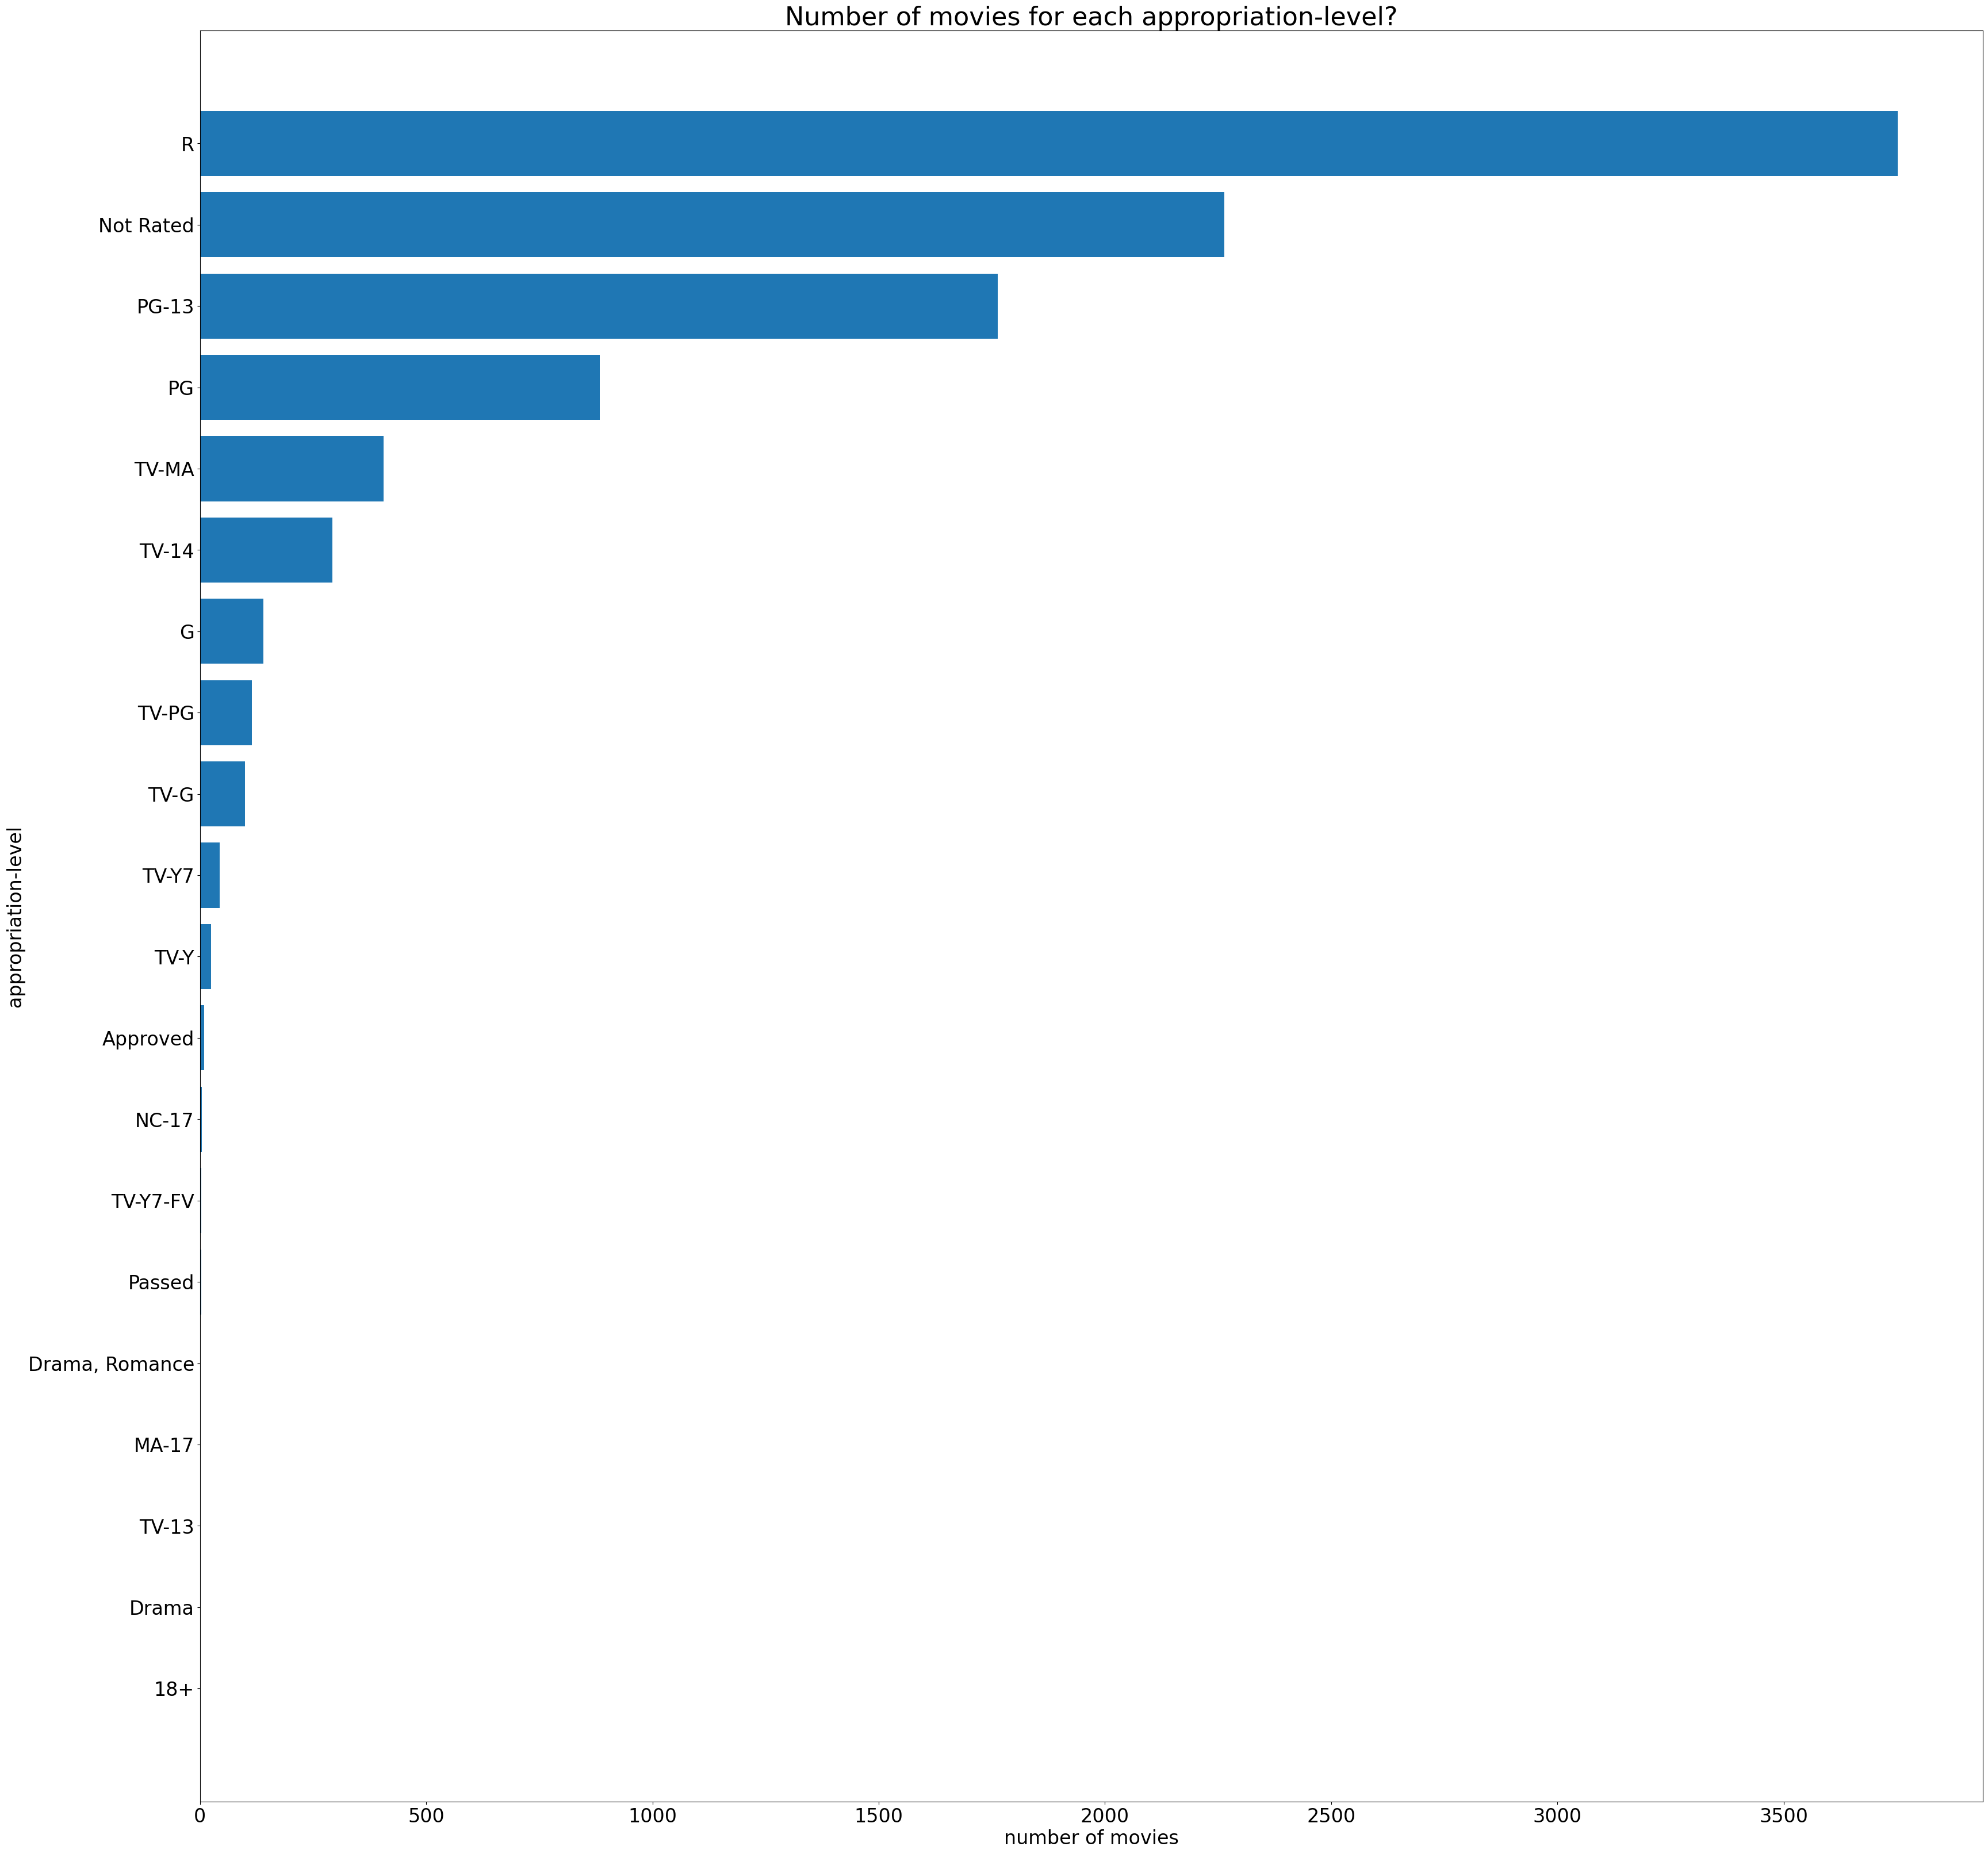

In [60]:
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(appropriate_count.index, width=appropriate_count['appropriate_count'])
plt.ylabel('appropriation-level', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies for each appropriation-level?', fontsize=32, loc='center')
plt.show()

In [61]:
list(mov_language_dict.keys())[-10:]

['Tamil',
 'Russian',
 'German',
 'Punjabi',
 'Telugu',
 'nan',
 'French',
 'Spanish',
 'Hindi',
 'English']

#### `language`

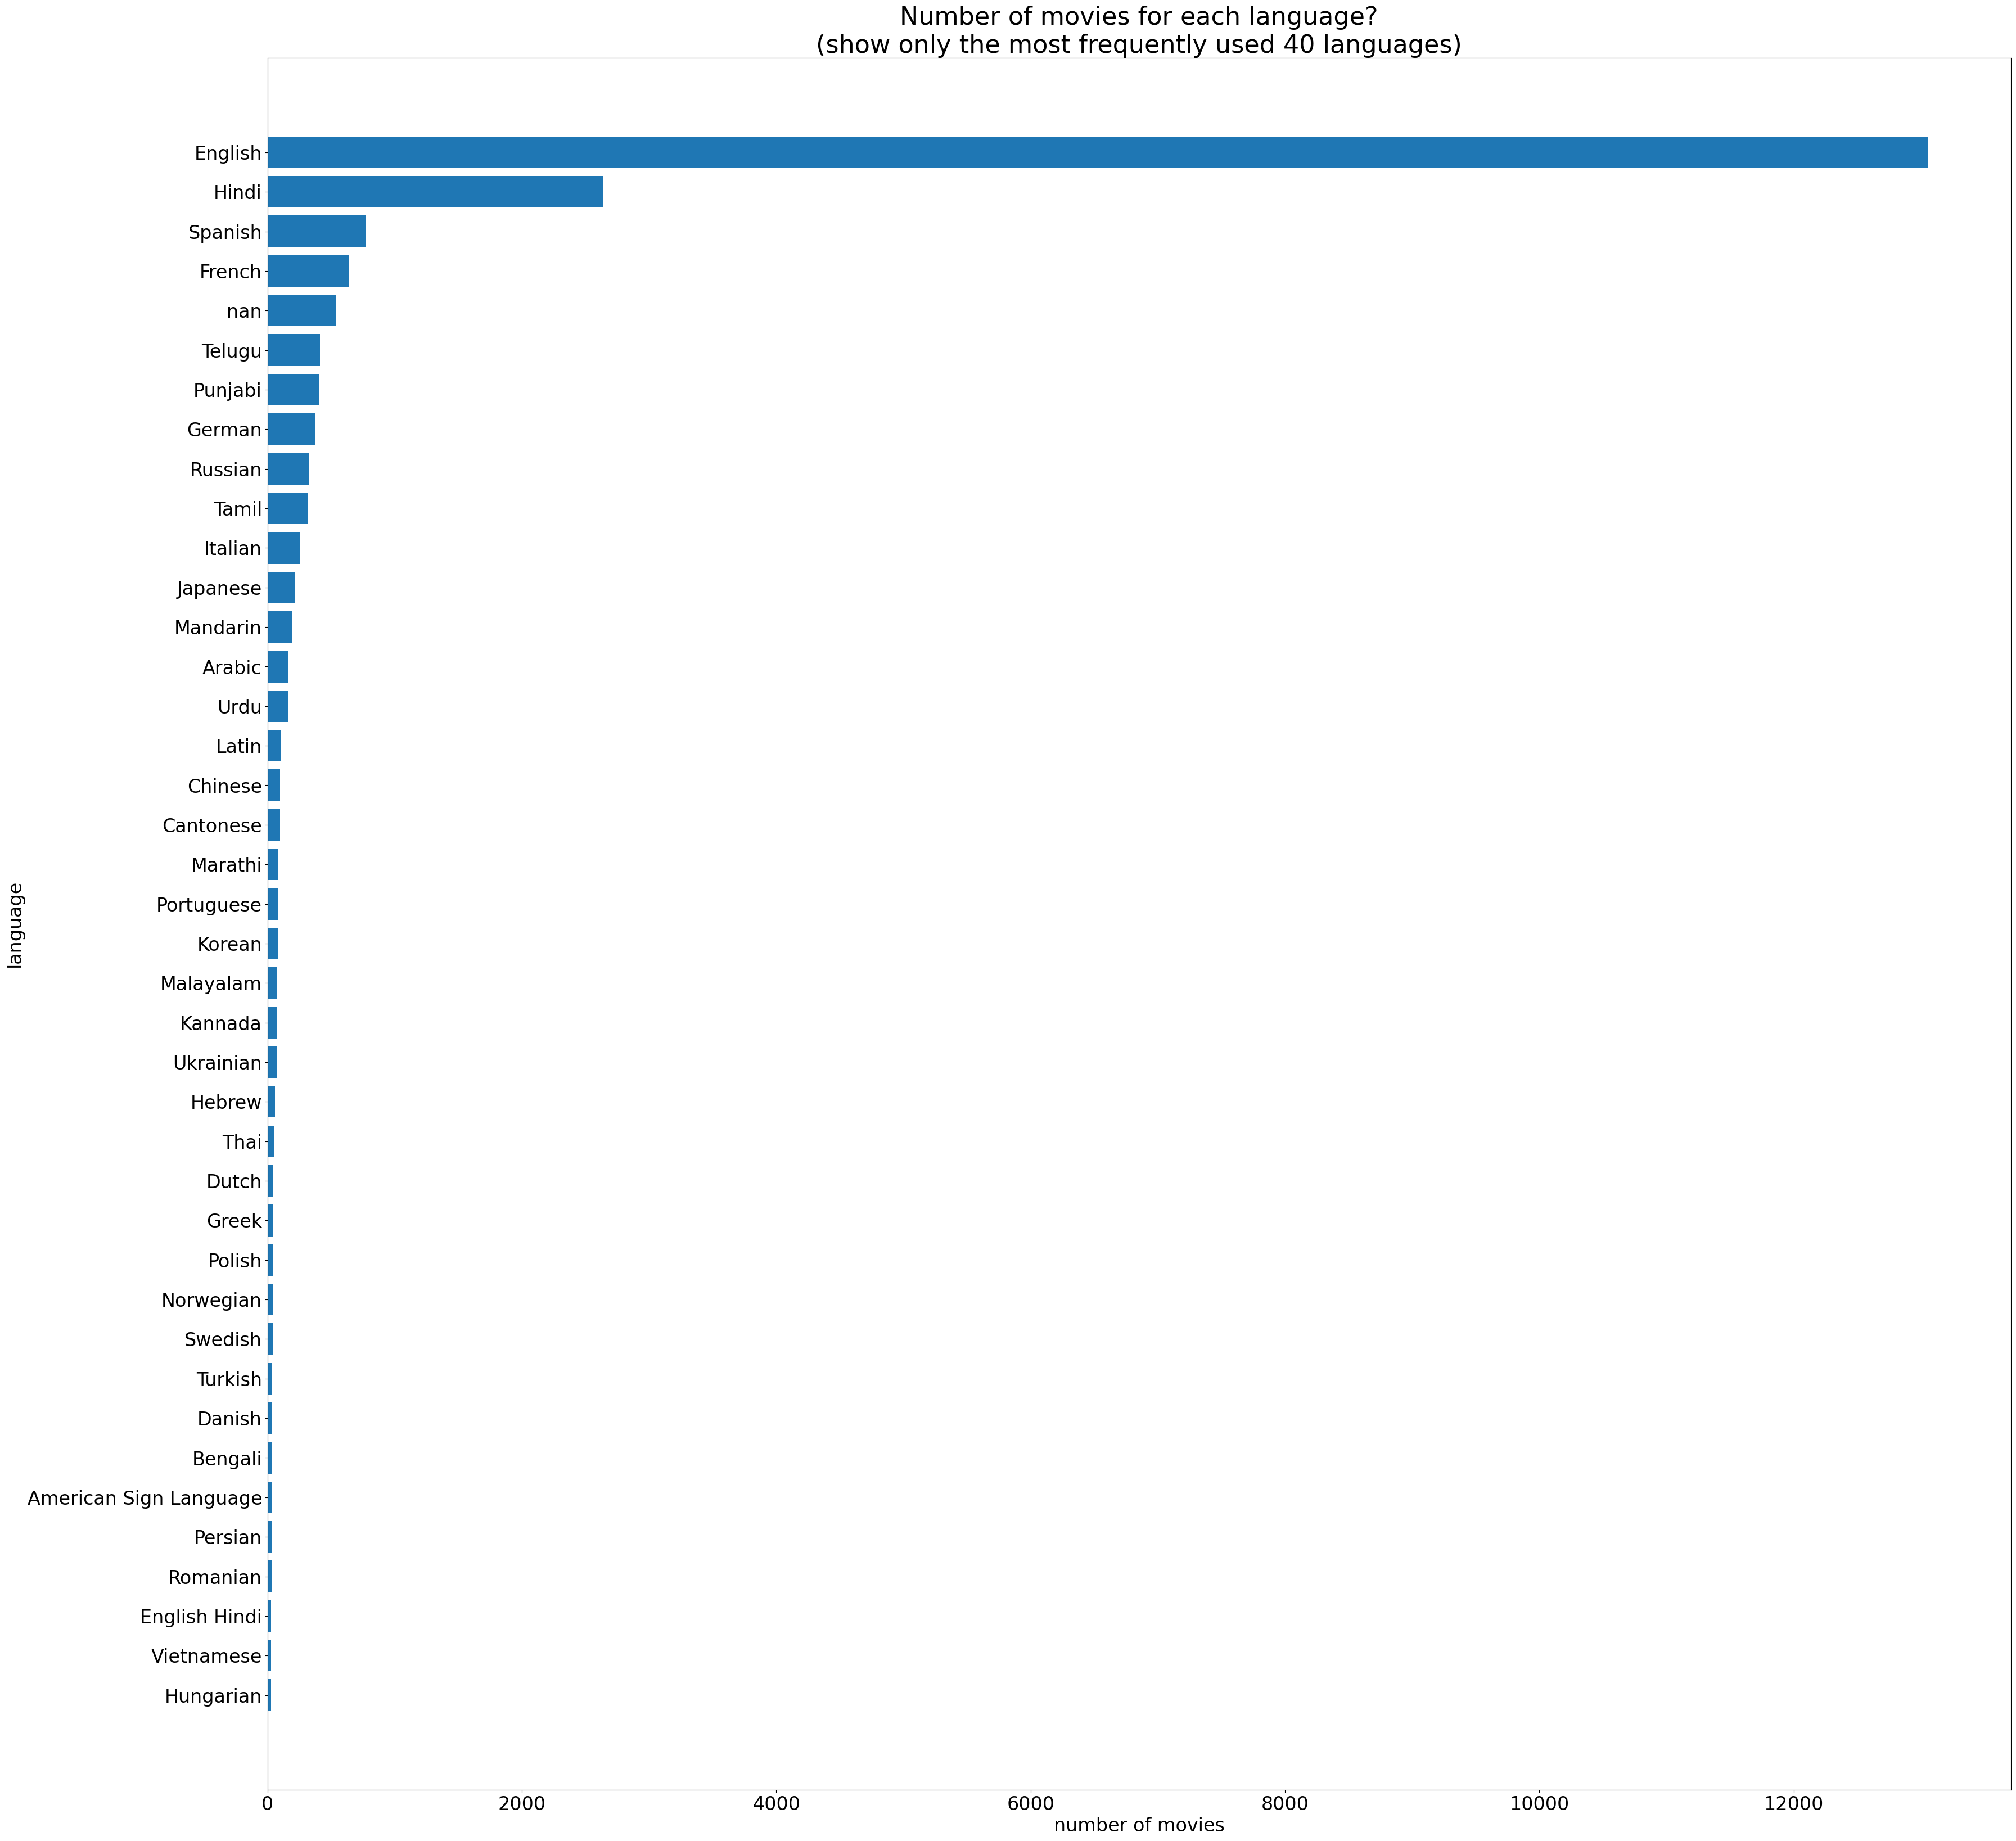

In [62]:
# language_count = pd.DataFrame(mov_data['language'].value_counts()).rename(columns={'language': 'language_count'}).sort_values(by='language_count', ascending=True)

plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(mov_language_dict.keys())[-40:], width=list(mov_language_dict.values())[-40:])
plt.ylabel('language', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies for each language?\n(show only the most frequently used 40 languages)', fontsize=32, loc='center')
plt.show()

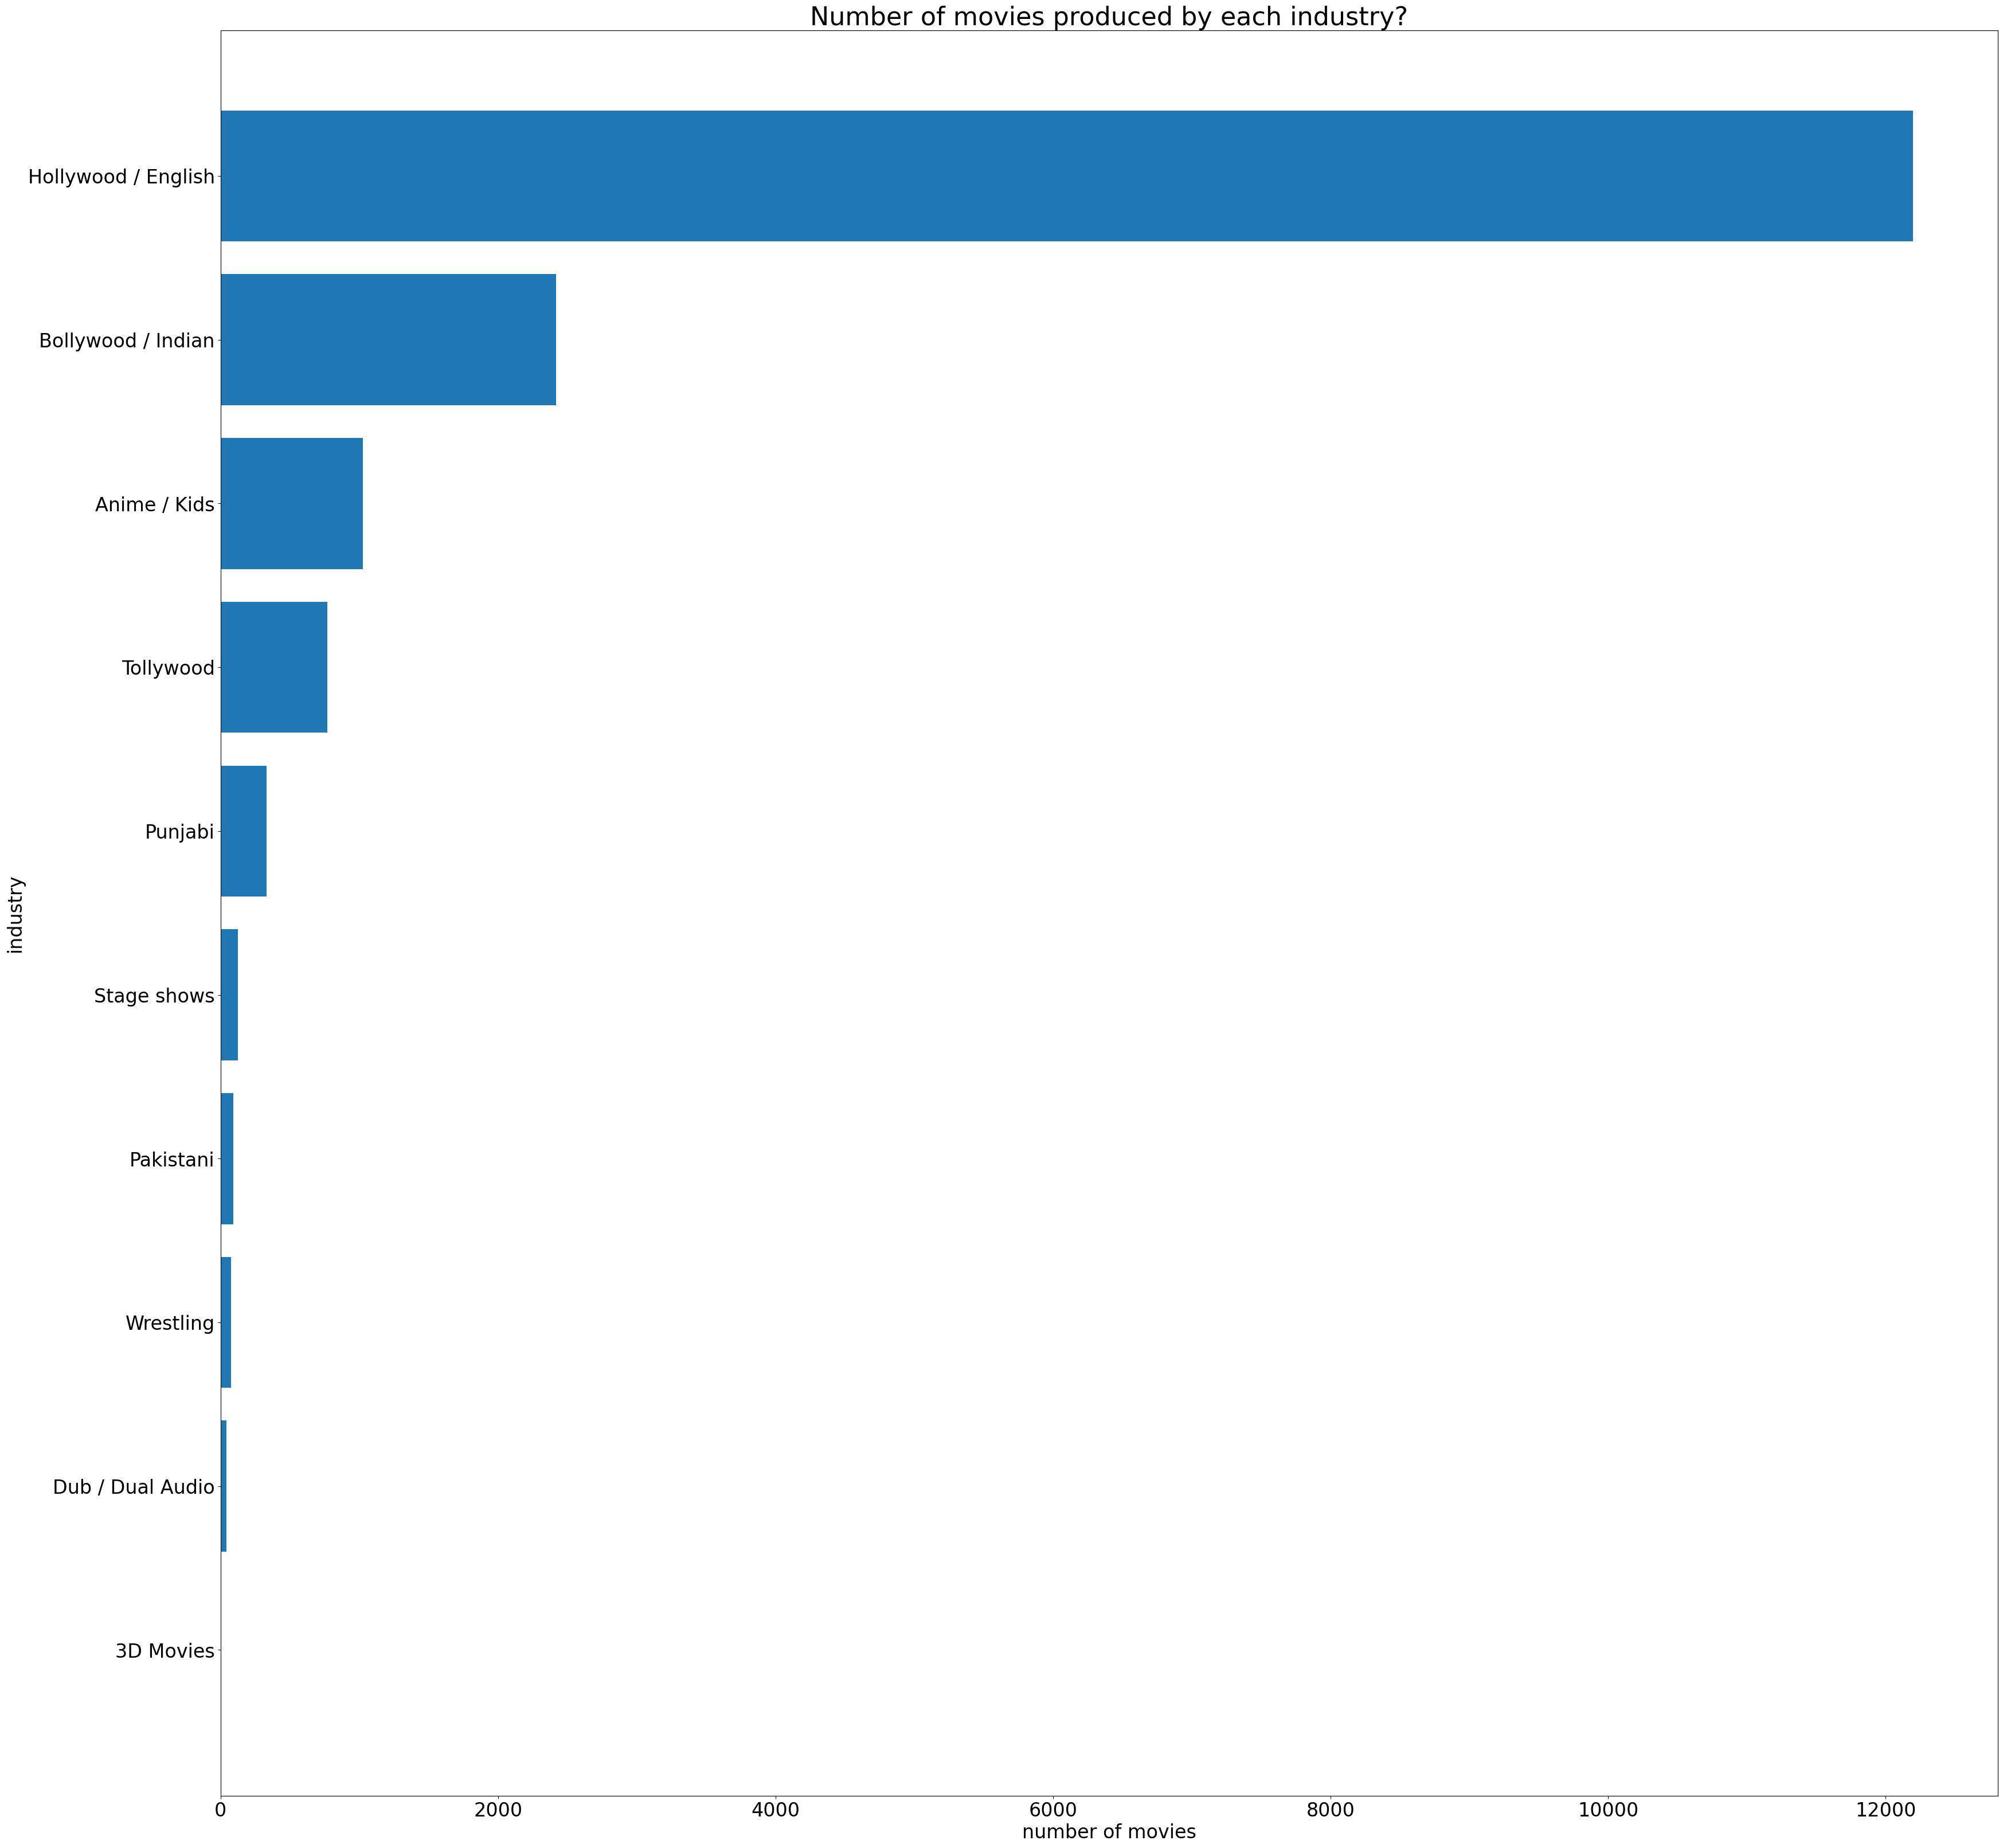

In [63]:
industry_count = pd.DataFrame(mov_data['industry'].value_counts()).rename(columns={'industry': 'industry_count'}).sort_values(by='industry_count', ascending=True)
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(industry_count.index, width=industry_count['industry_count'])
plt.ylabel('industry', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies produced by each industry?', fontsize=32, loc='center')
plt.show()

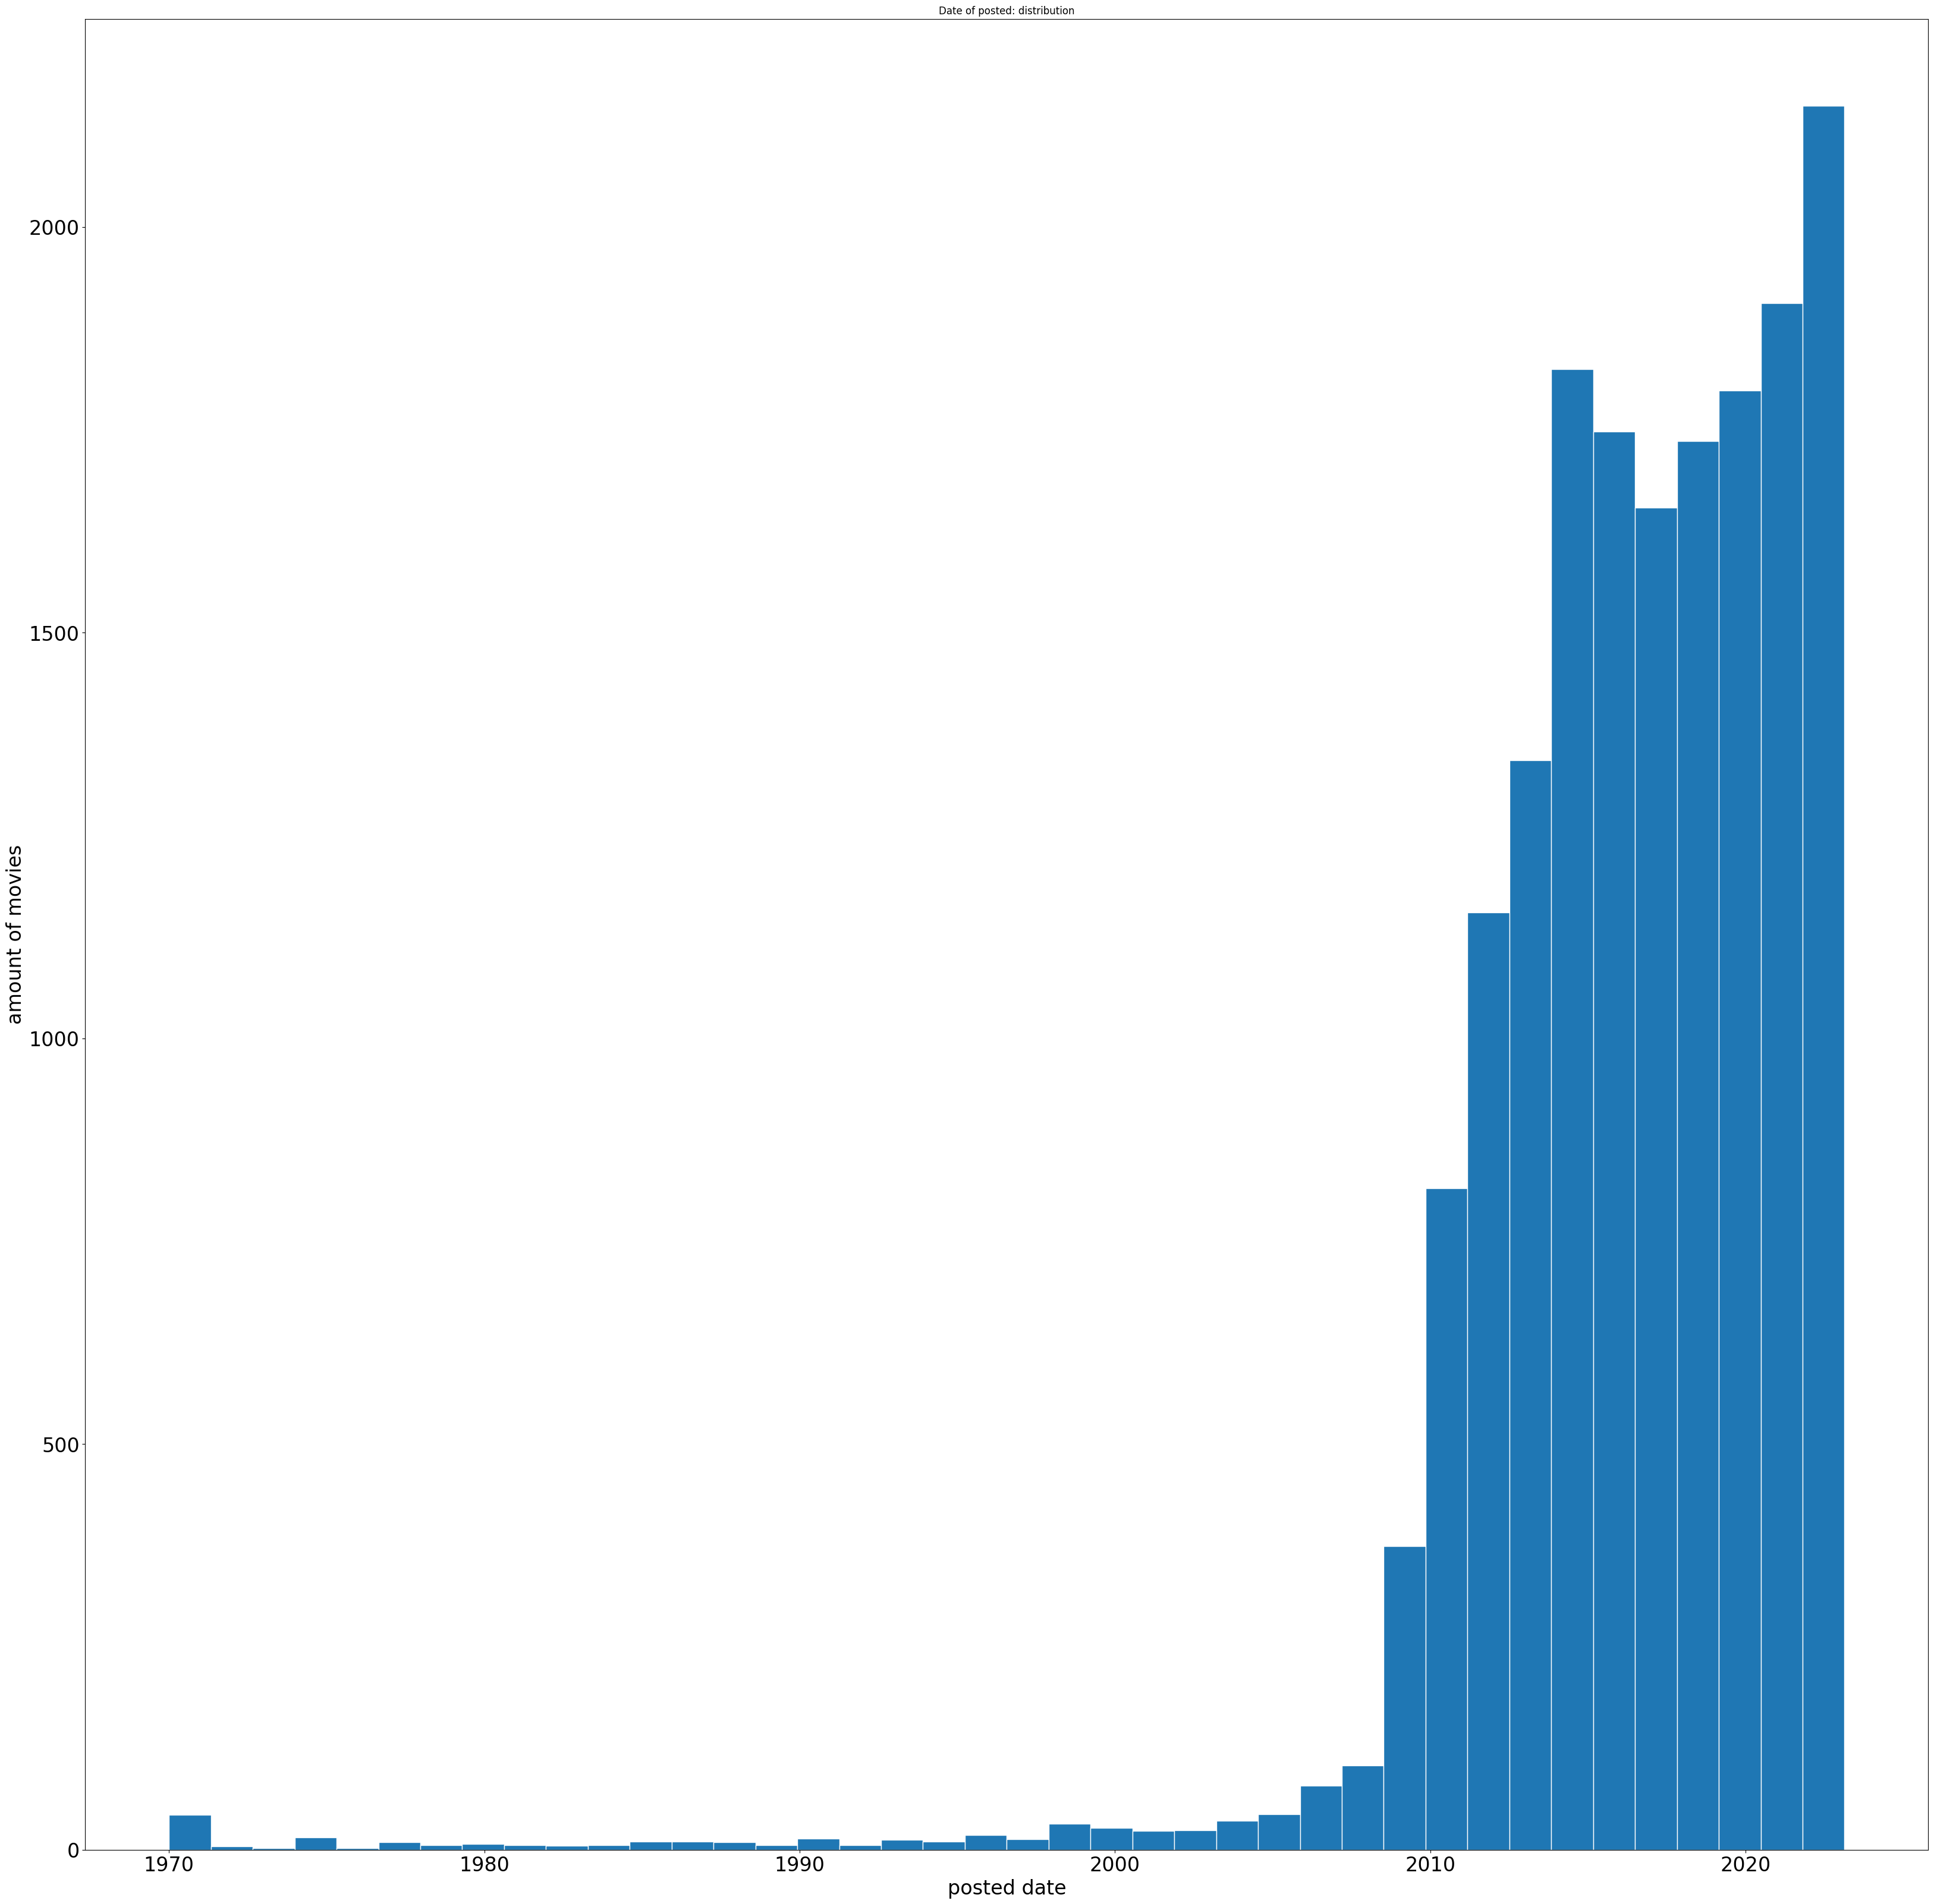

In [64]:
# mov_data['posted_date'].hist()
plt.figure(figsize=(40, 40))
plt.hist(mov_data['posted_date'], bins=40, edgecolor='white')
plt.title('Date of posted: distribution')
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel('amount of movies', fontsize=24)
plt.xlabel('posted date', fontsize=24)
plt.show()

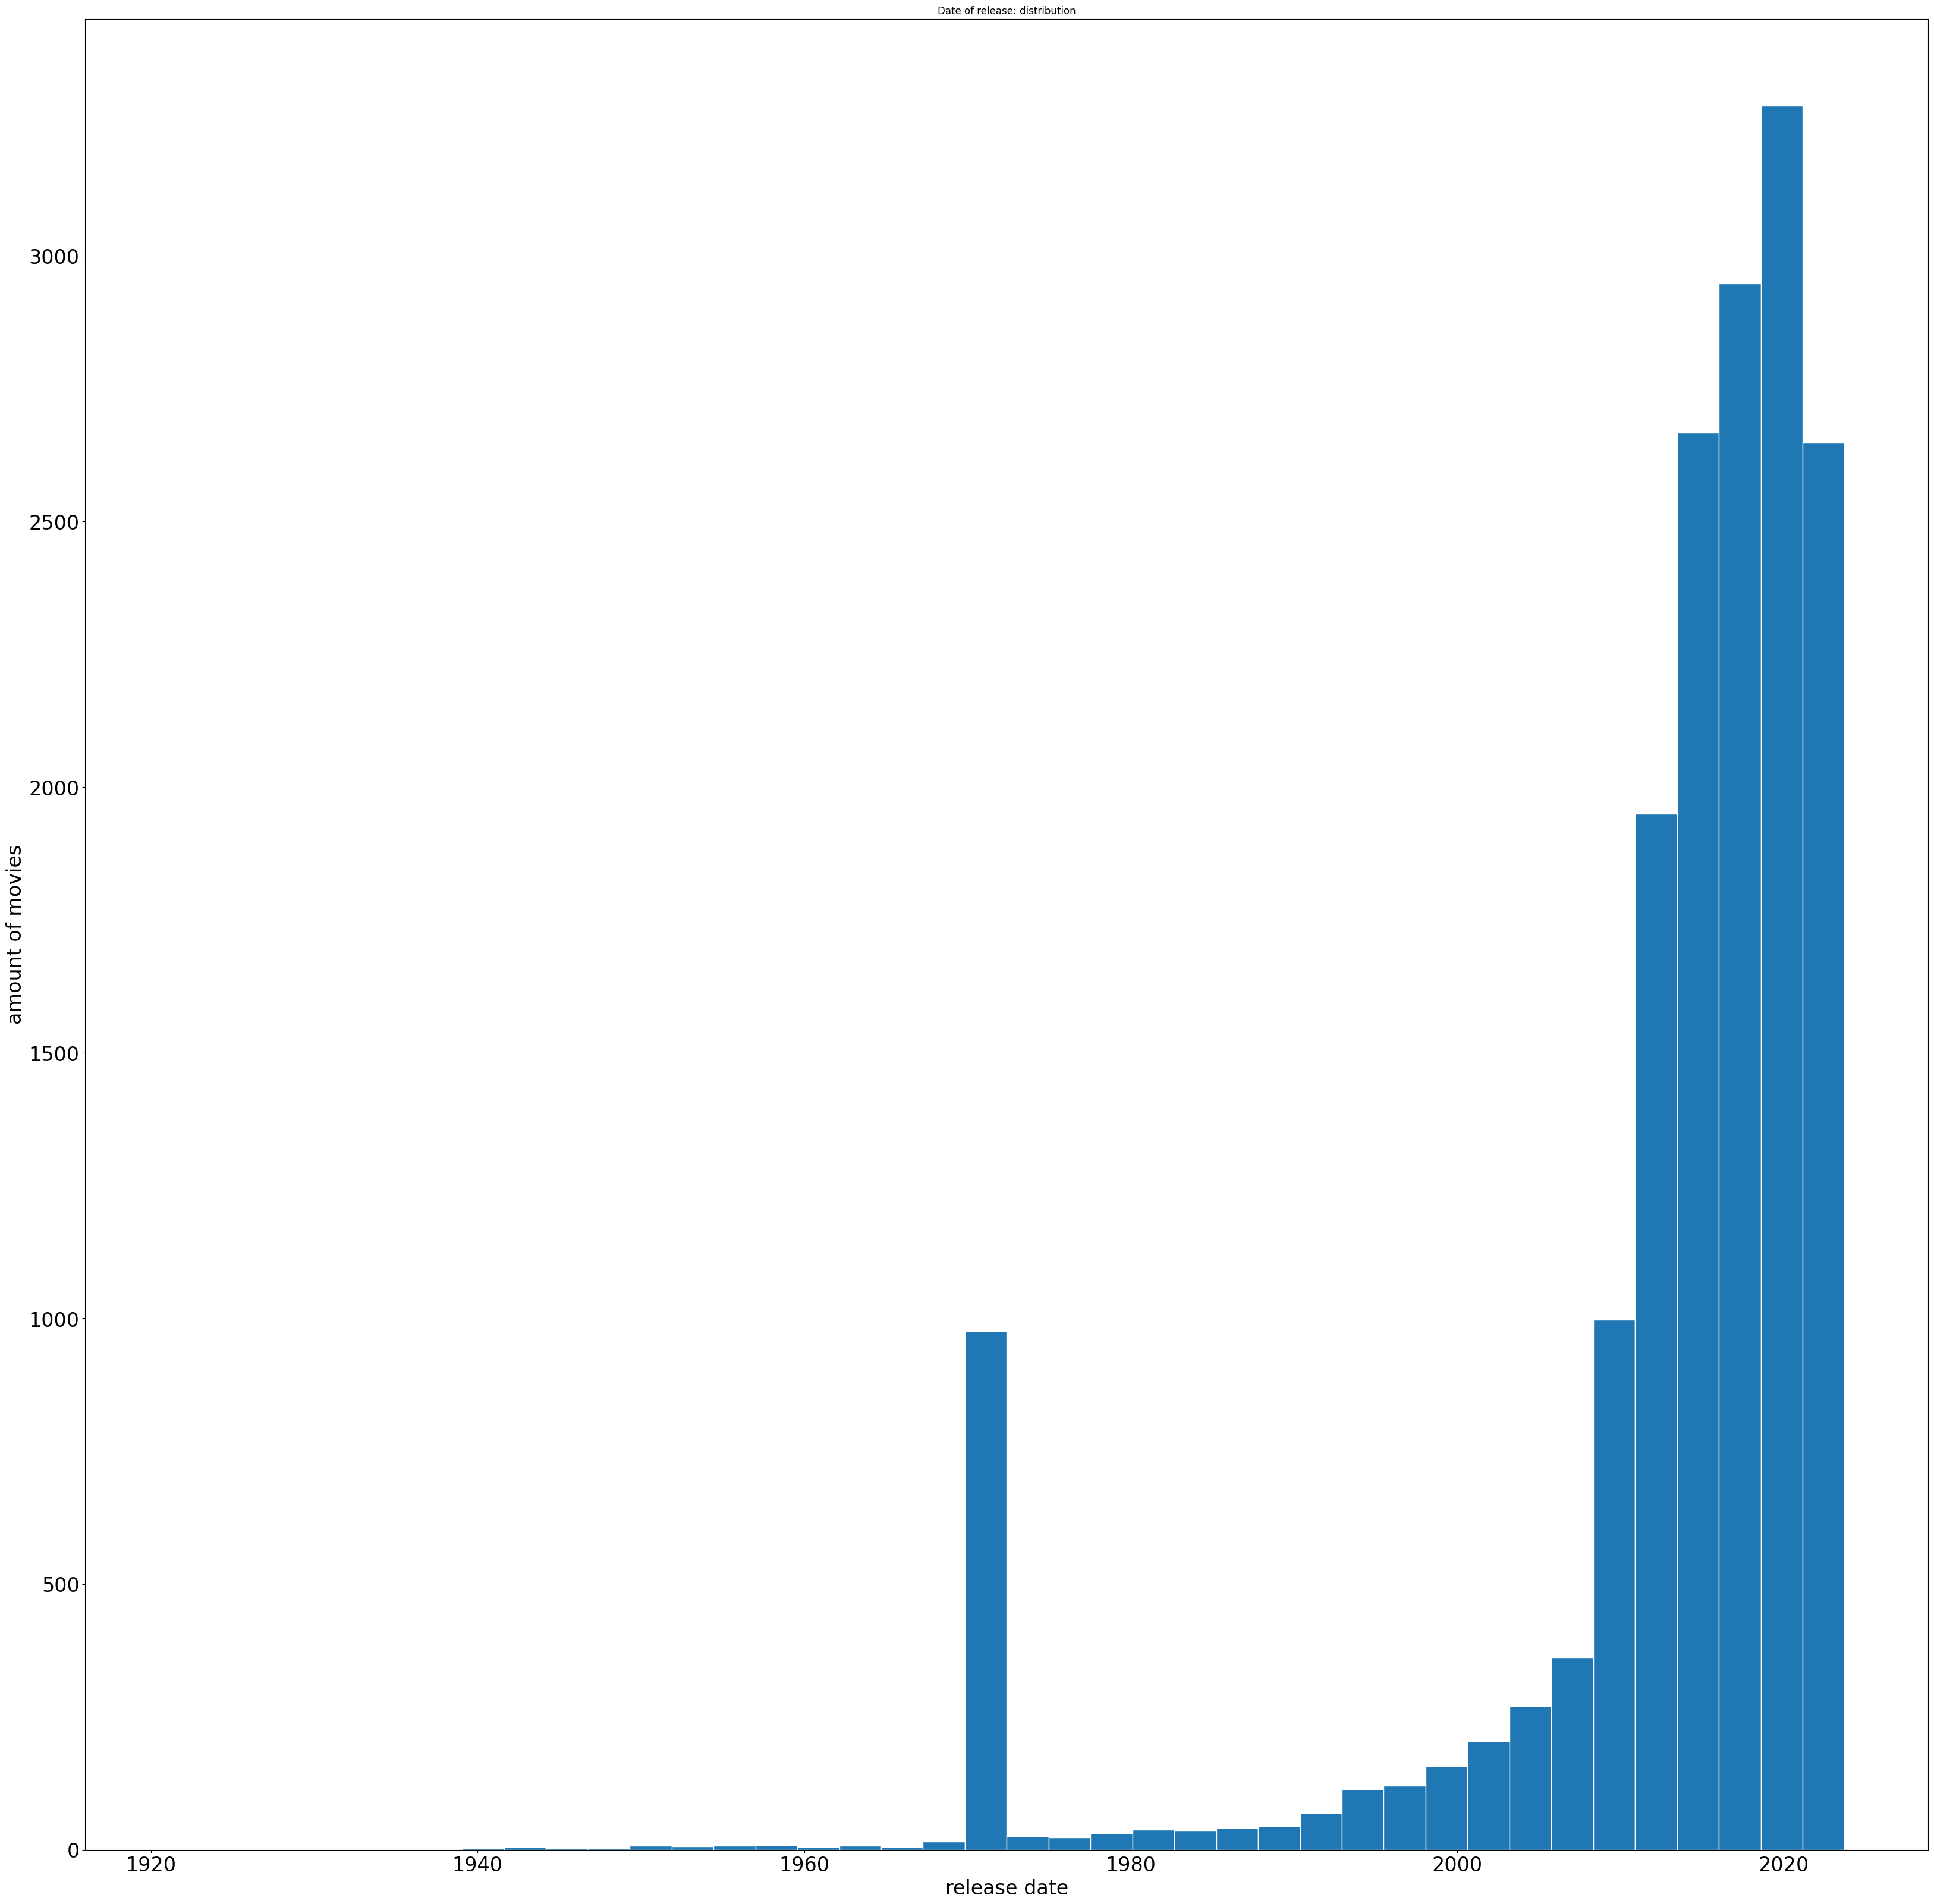

In [65]:
plt.figure(figsize=(40, 40))
plt.hist(mov_data['release_date'], bins=40, edgecolor='white')
plt.title('Date of release: distribution')
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel('amount of movies', fontsize=24)
plt.xlabel('release date', fontsize=24)
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


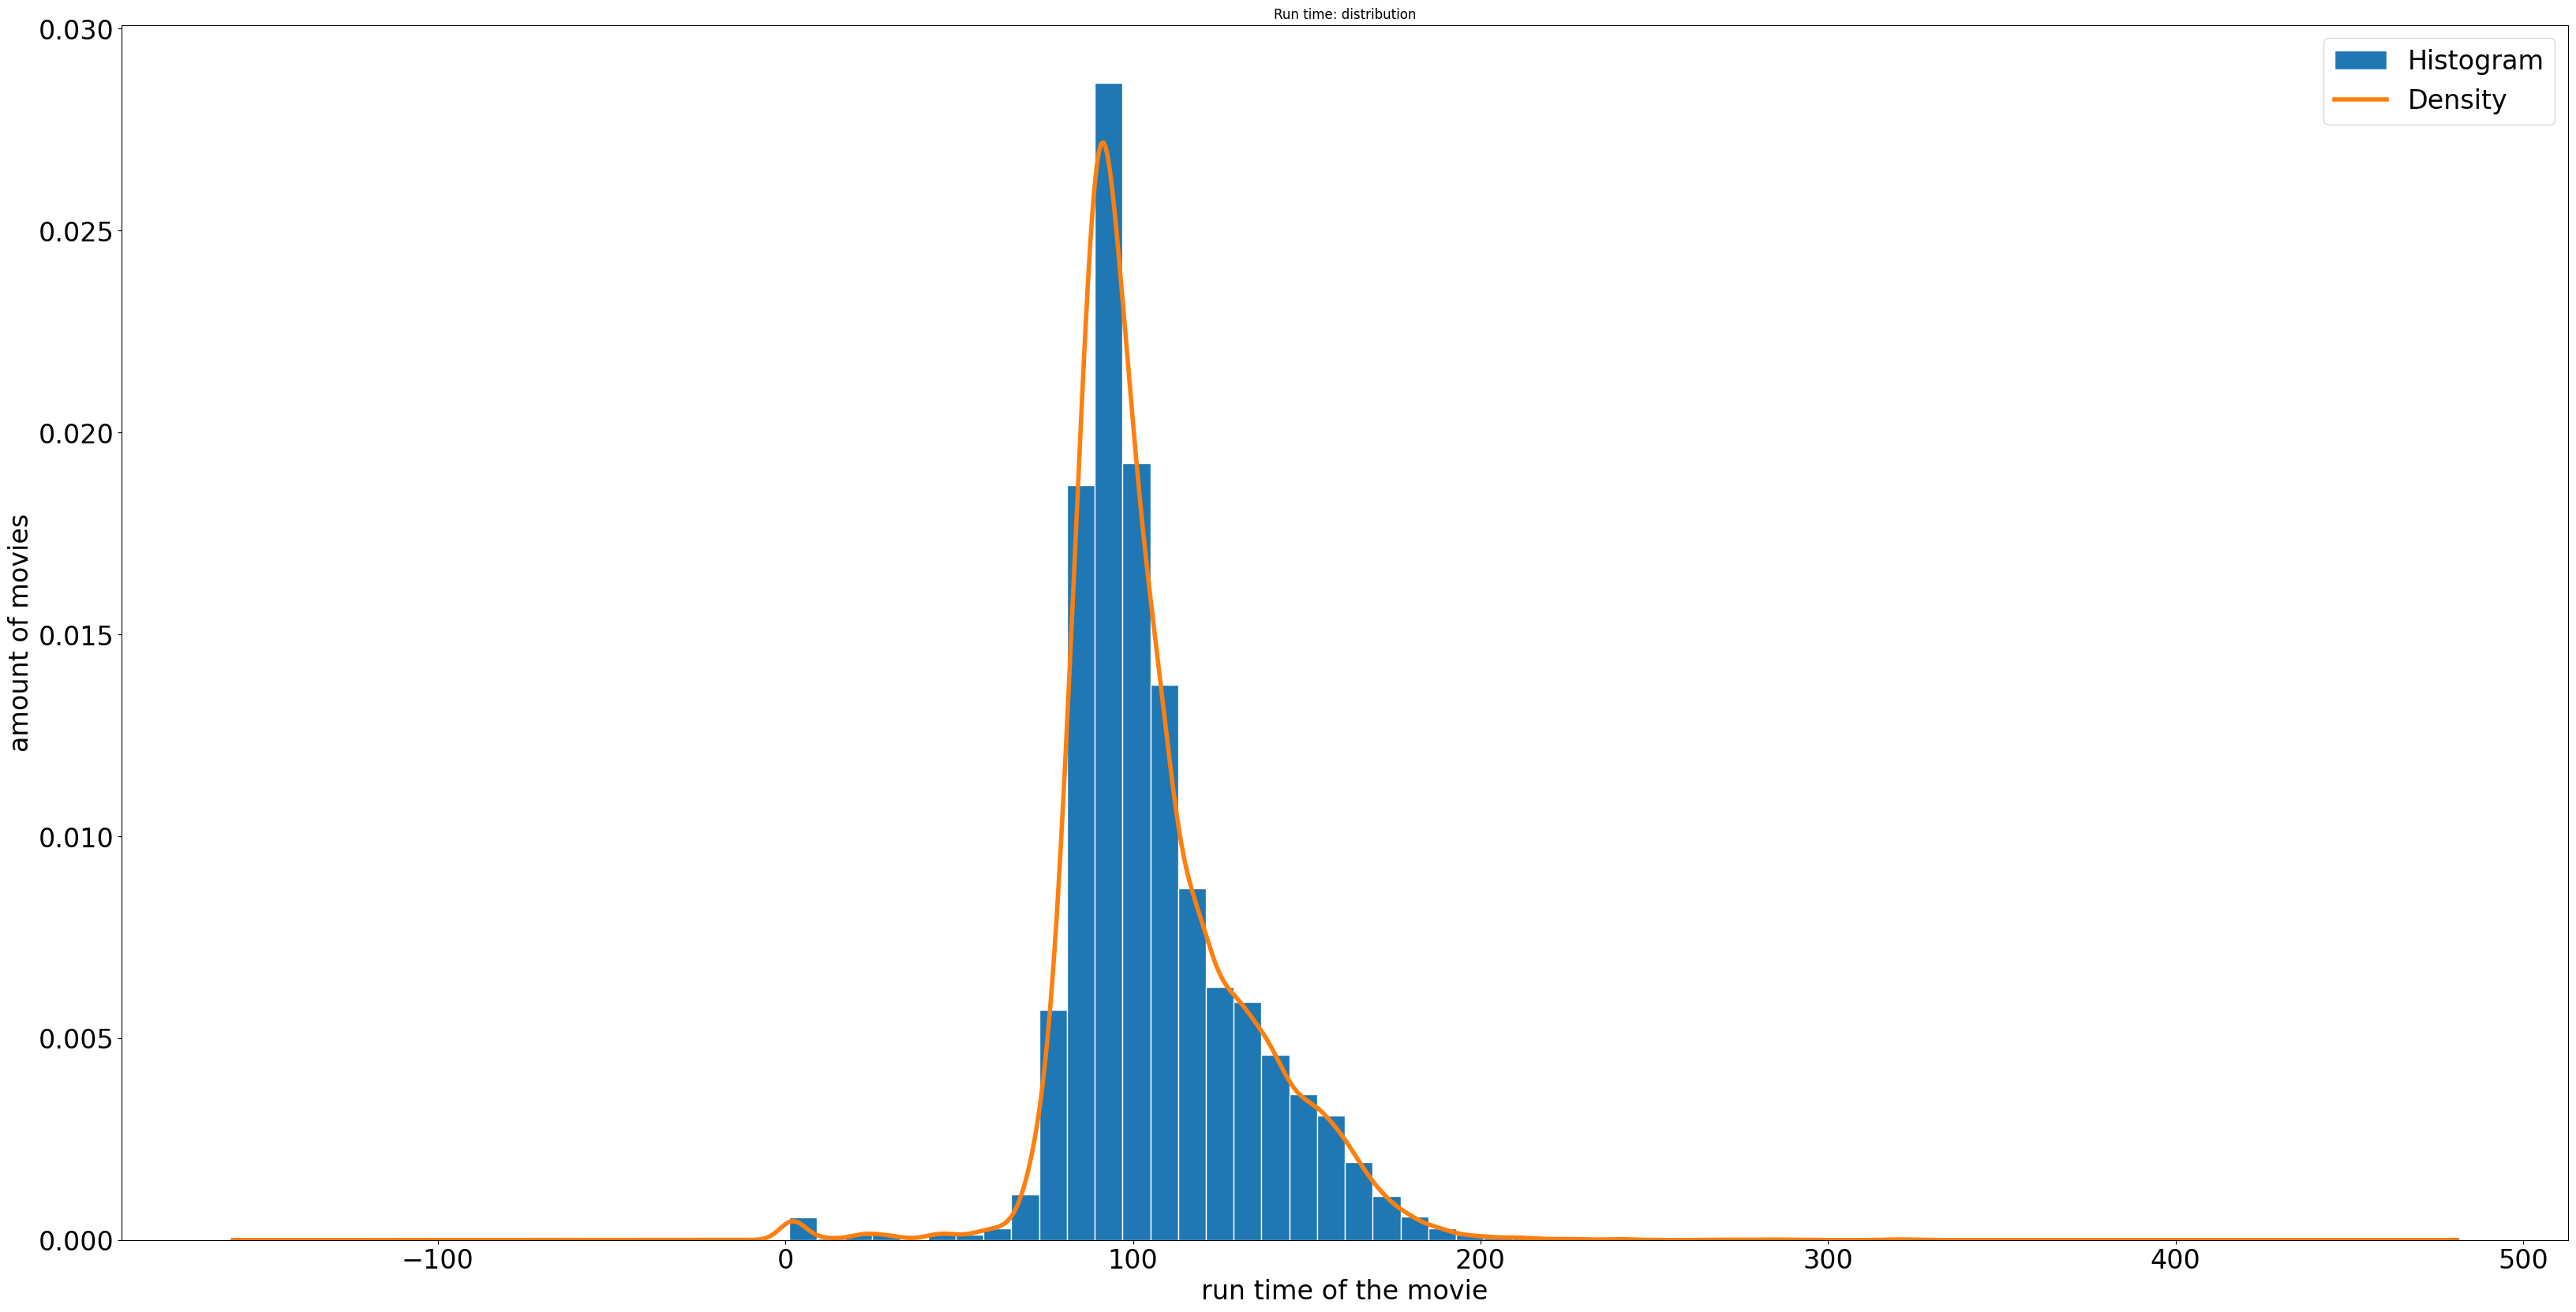

In [66]:
plt.figure(figsize=(40, 20))
plt.hist(mov_data['run_time'], bins=40, edgecolor='white', density=True, label='Histogram')
mov_data['run_time'].plot(kind='kde', label='Density', linewidth=4.0)
plt.title('Run time: distribution')
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel('amount of movies', fontsize=24)
plt.xlabel('run time of the movie', fontsize=24)
plt.legend(fontsize=24)
plt.show()

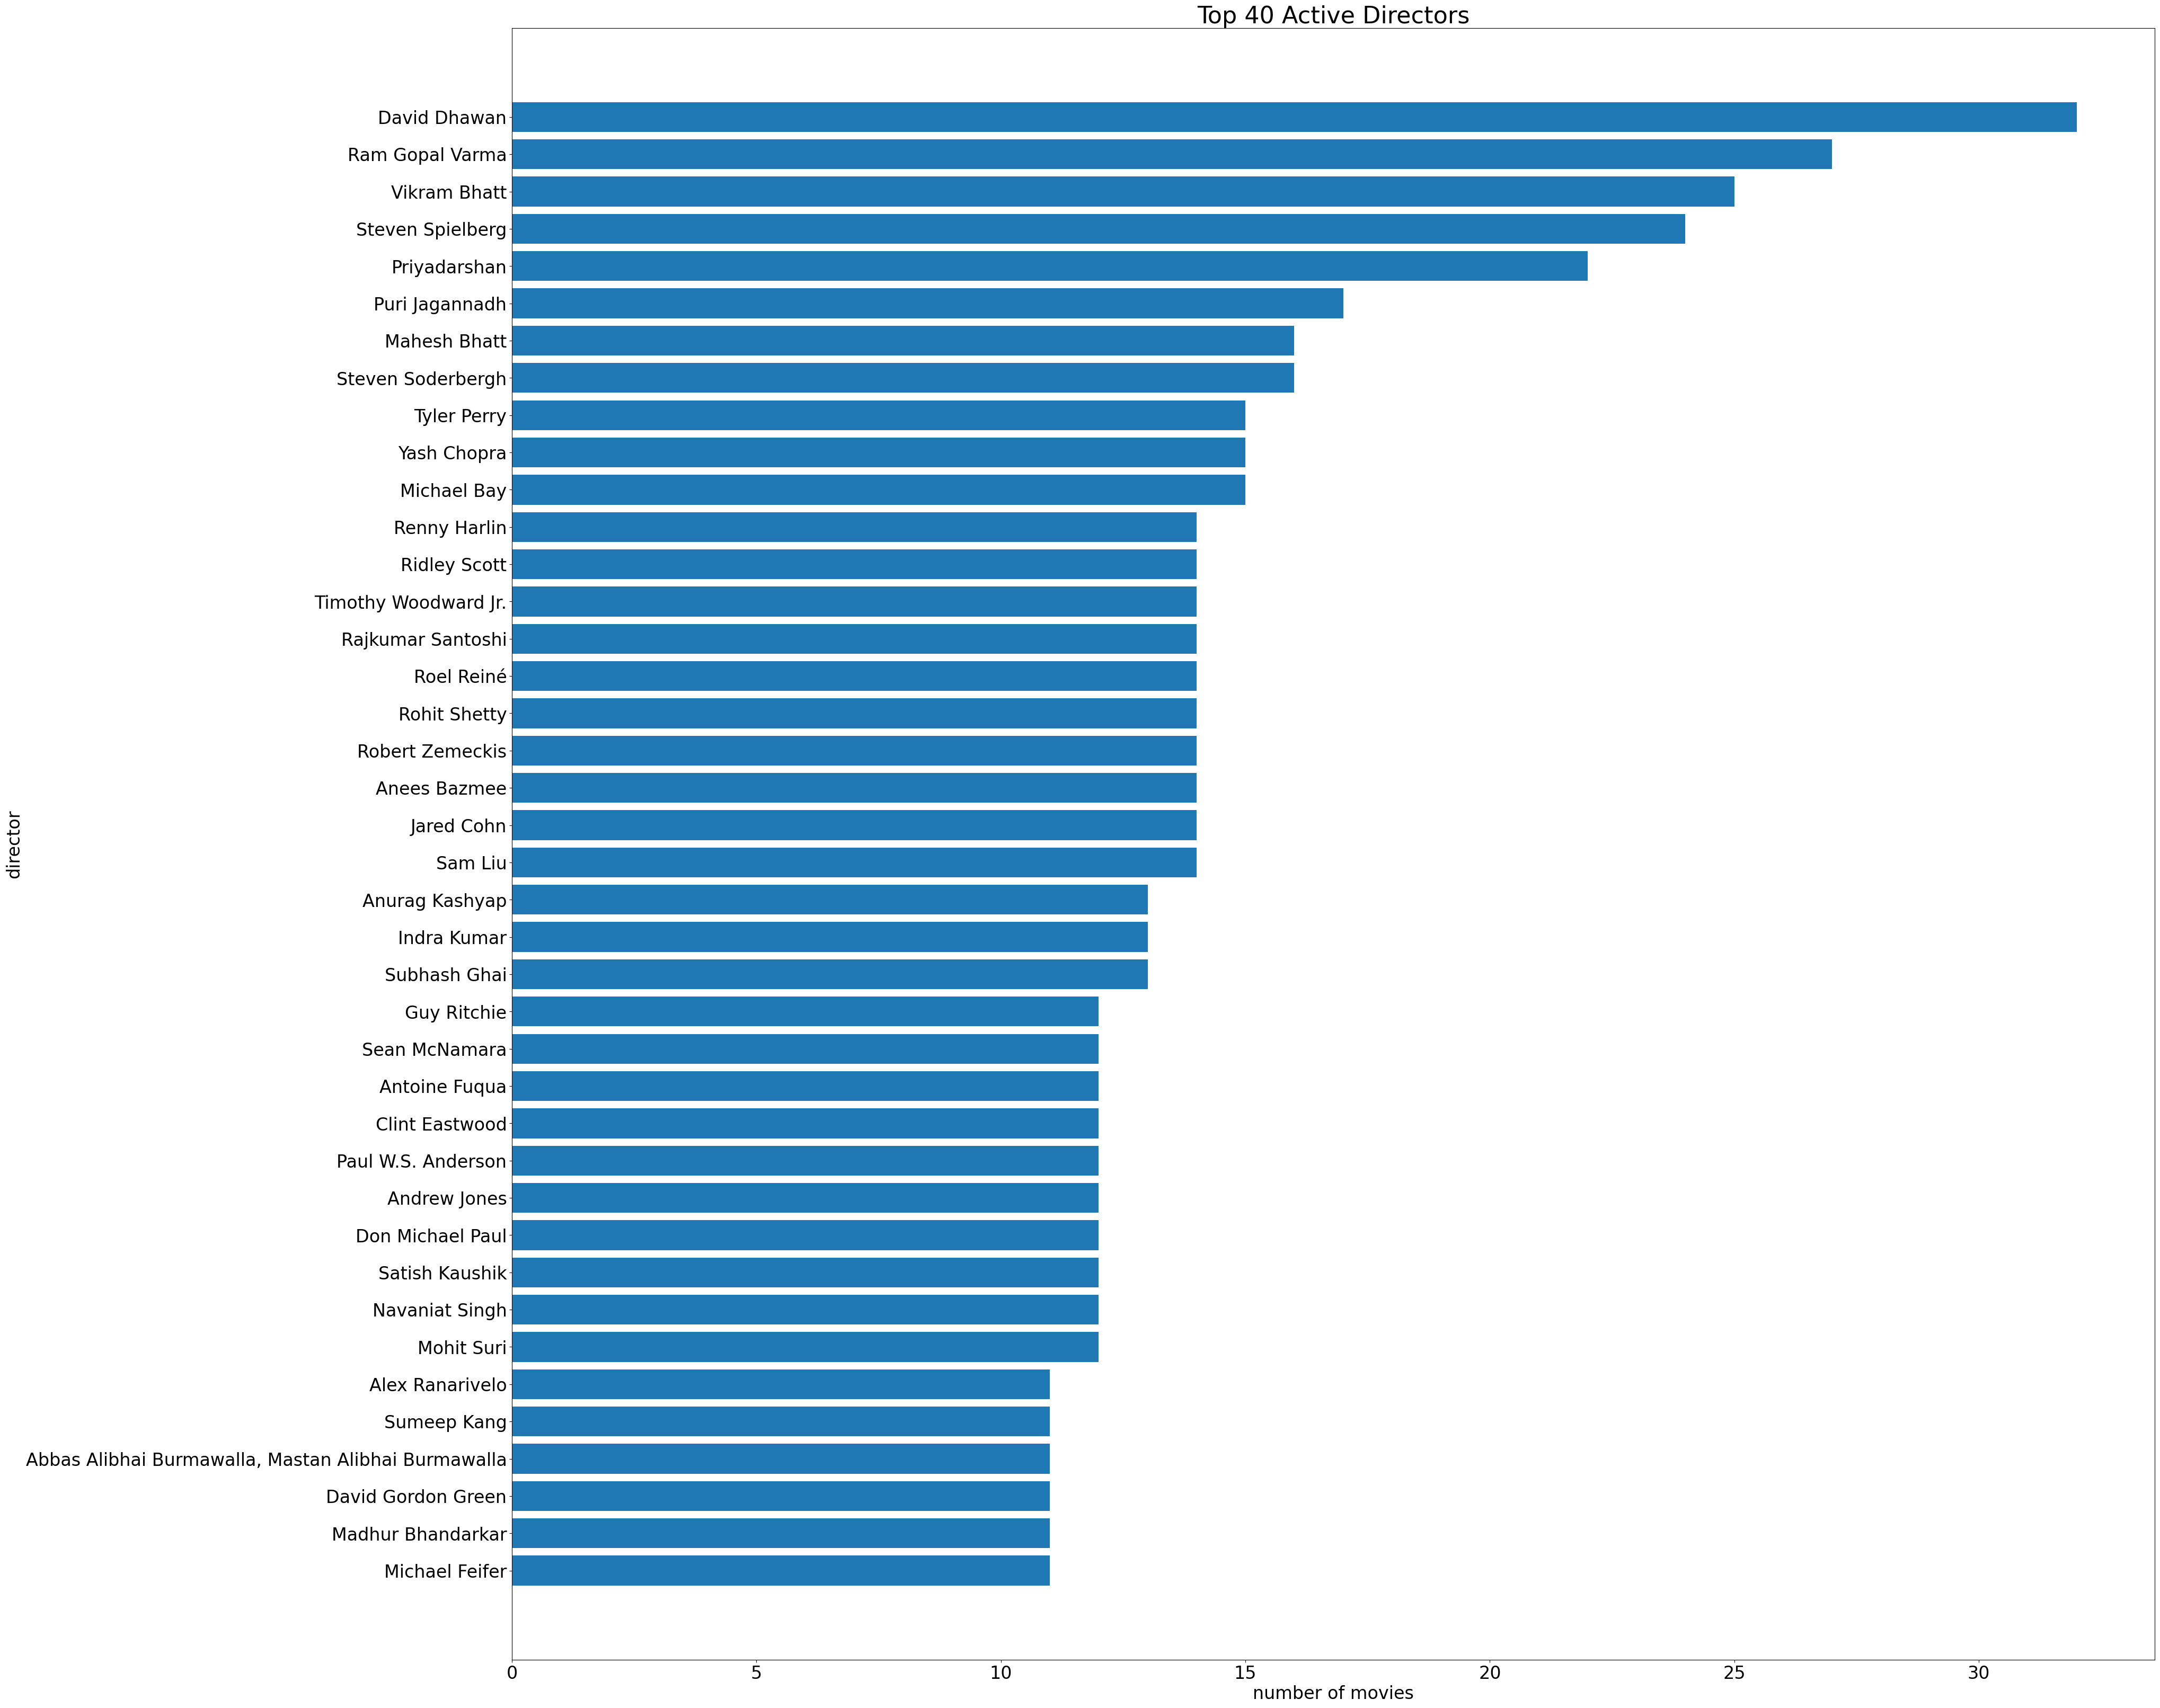

In [67]:
director_count = pd.DataFrame(mov_data['director'].value_counts()).rename(columns={'director': 'director_count'}).sort_values(by='director_count', ascending=True)
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(director_count.tail(40).index, width=director_count['director_count'].tail(40))
plt.ylabel('director', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Top 40 Active Directors', fontsize=32, loc='center')
plt.show()

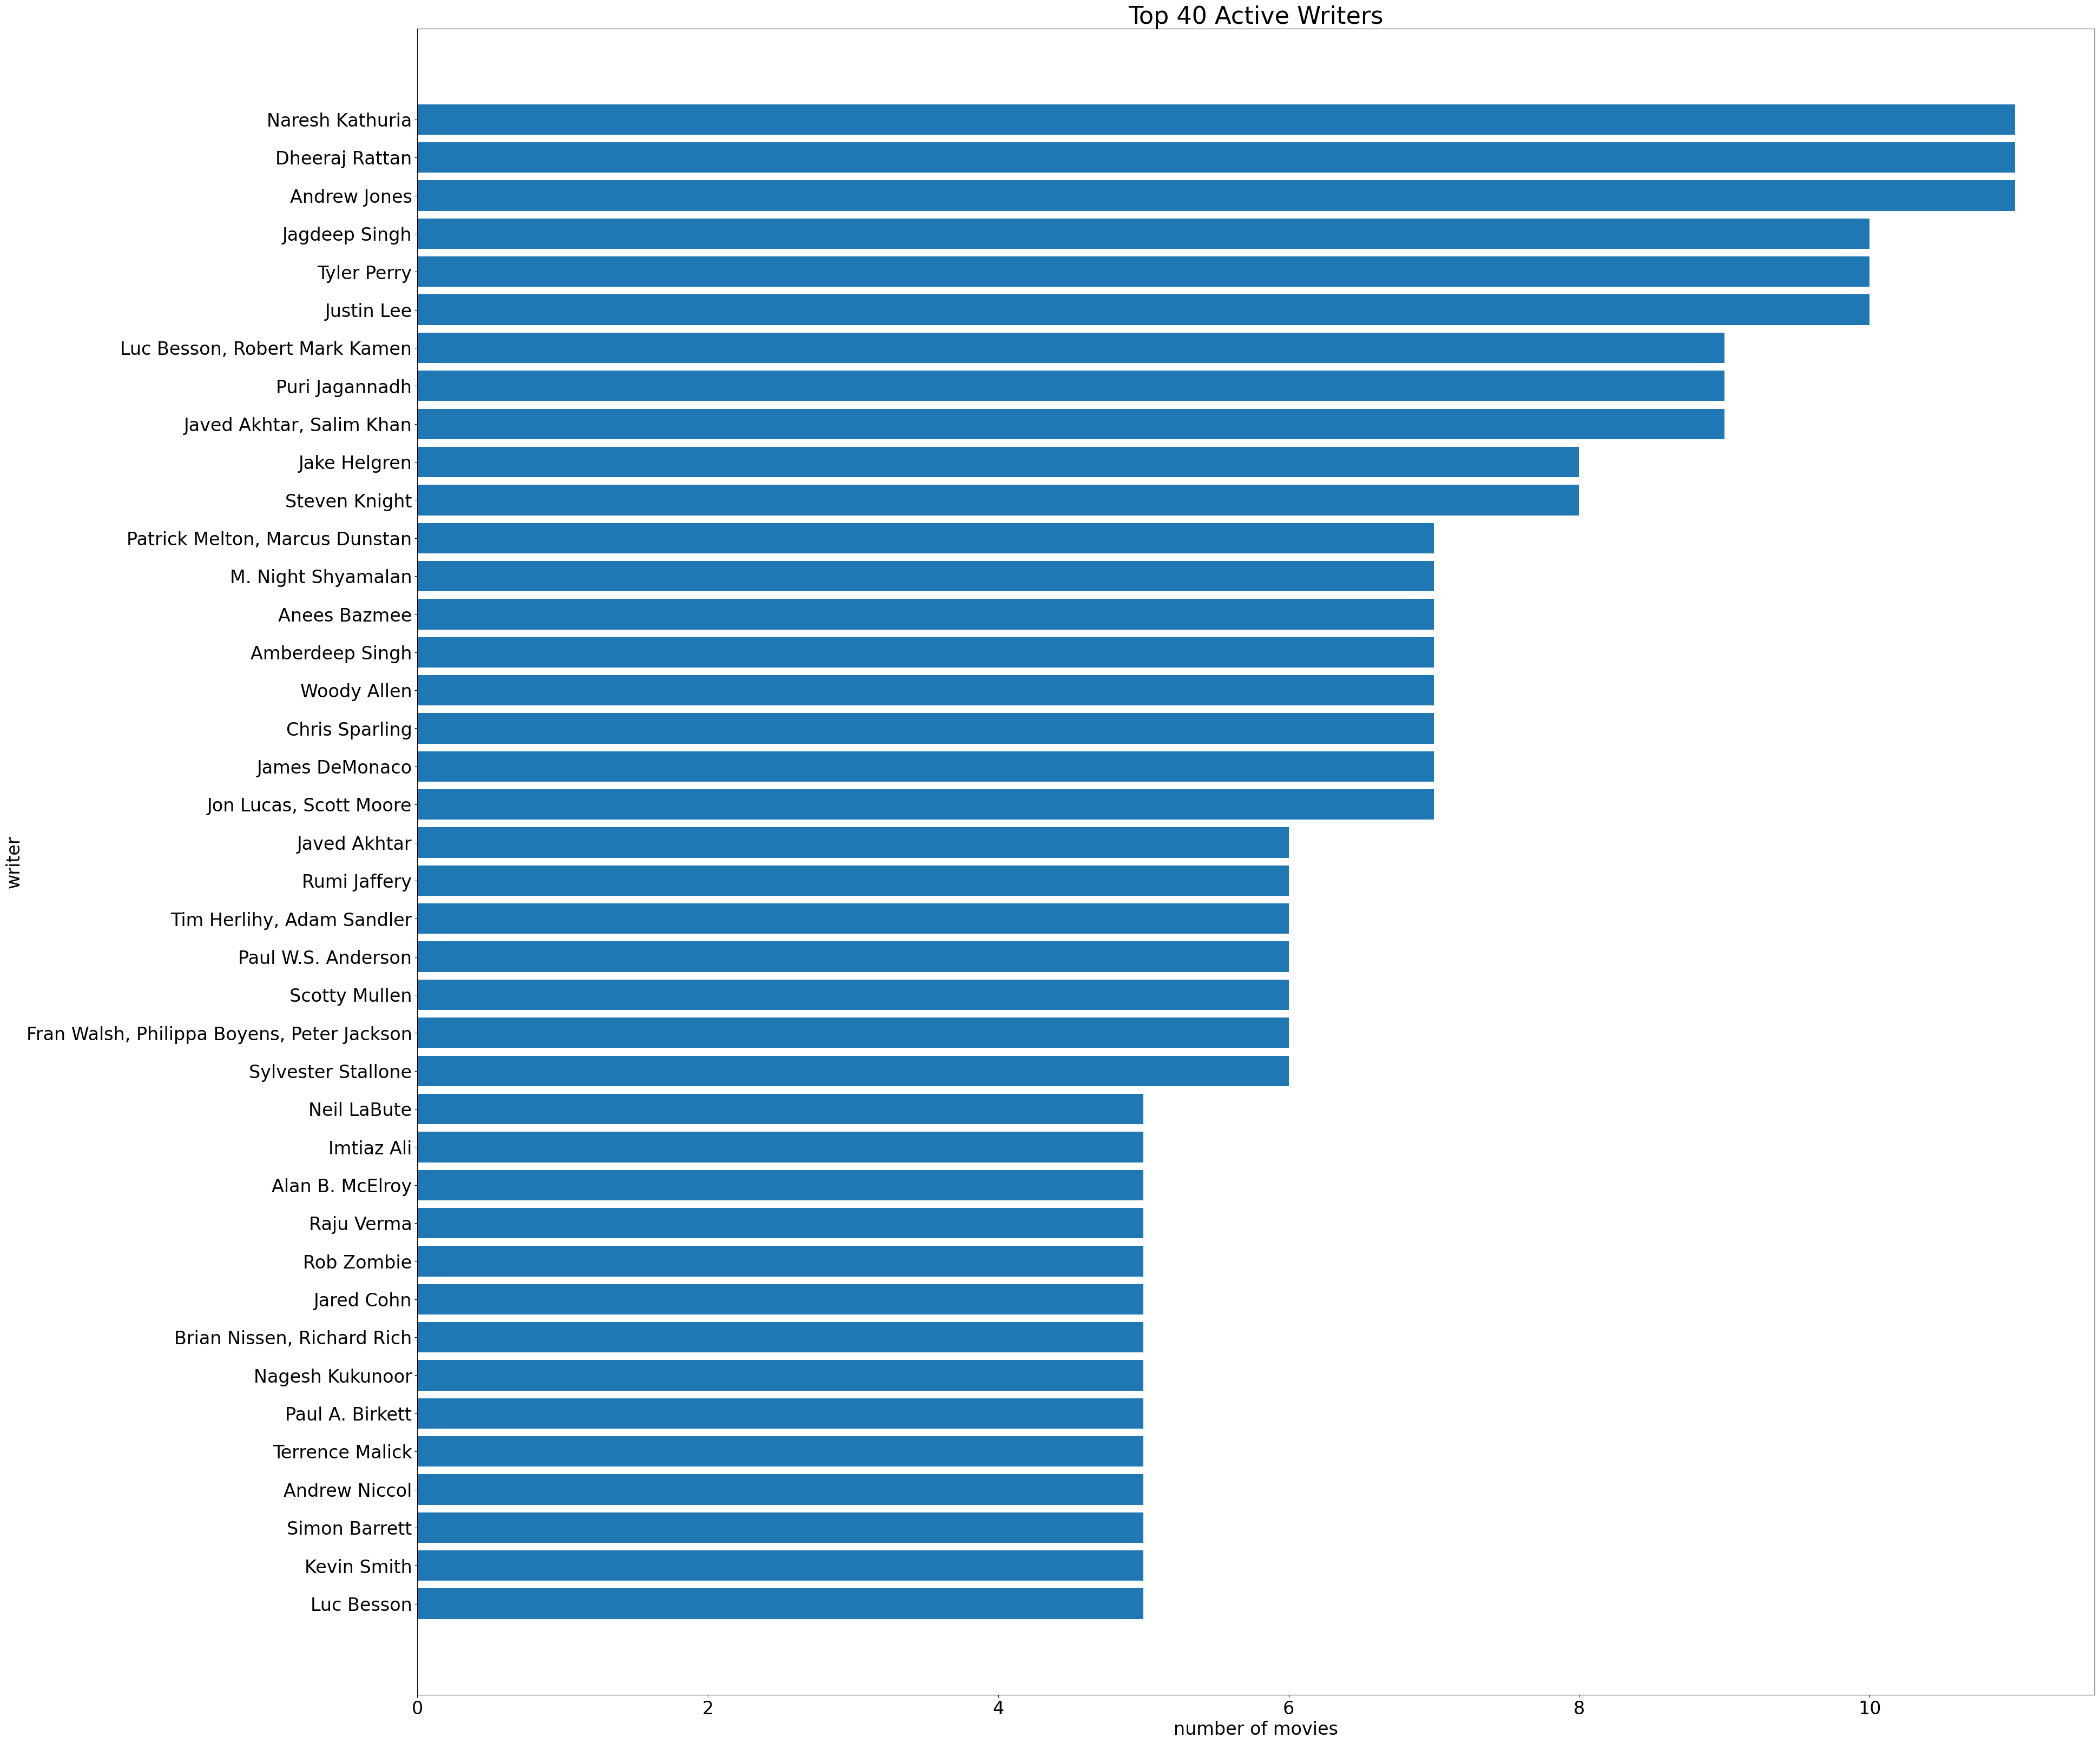

In [68]:
writer_count = pd.DataFrame(mov_data['writer'].value_counts()).rename(columns={'writer': 'writer_count'}).sort_values(by='writer_count', ascending=True)
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(writer_count.tail(40).index, width=writer_count['writer_count'].tail(40))
plt.ylabel('writer', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Top 40 Active Writers', fontsize=32, loc='center')
plt.show()

### 盒图

In [69]:
operation_counts = pd.DataFrame(list(mov_data['views']), columns=['counts'])
operation_counts = pd.DataFrame(operation_counts, columns=['operation', 'counts'])
operation_counts['operation'] = 'view'
operation_counts

operation   counts
0          view   4442.0
1          view   1002.0
2          view  14419.0
3          view   7891.0
4          view   2438.0
...         ...      ...
17081      view   6908.0
17082      view   6077.0
17083      view  36022.0
17084      view  13829.0
17085      view   7220.0

[17086 rows x 2 columns]

In [70]:
operation_counts = operation_counts.append(pd.DataFrame([['download', c] for c in list(mov_data['downloads'])], columns=['operation', 'counts']), ignore_index=True)
operation_counts

<ipython-input-70-e06ceba2363e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  operation_counts = operation_counts.append(pd.DataFrame([['download', c] for c in list(mov_data['downloads'])], columns=['operation', 'counts']), ignore_index=True)


operation   counts
0          view   4442.0
1          view   1002.0
2          view  14419.0
3          view   7891.0
4          view   2438.0
...         ...      ...
34167  download   2433.0
34168  download   1932.0
34169  download  12284.0
34170  download   5625.0
34171  download   3276.0

[34172 rows x 2 columns]

<ipython-input-71-1ba75cf12af2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  operations_count_box = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')


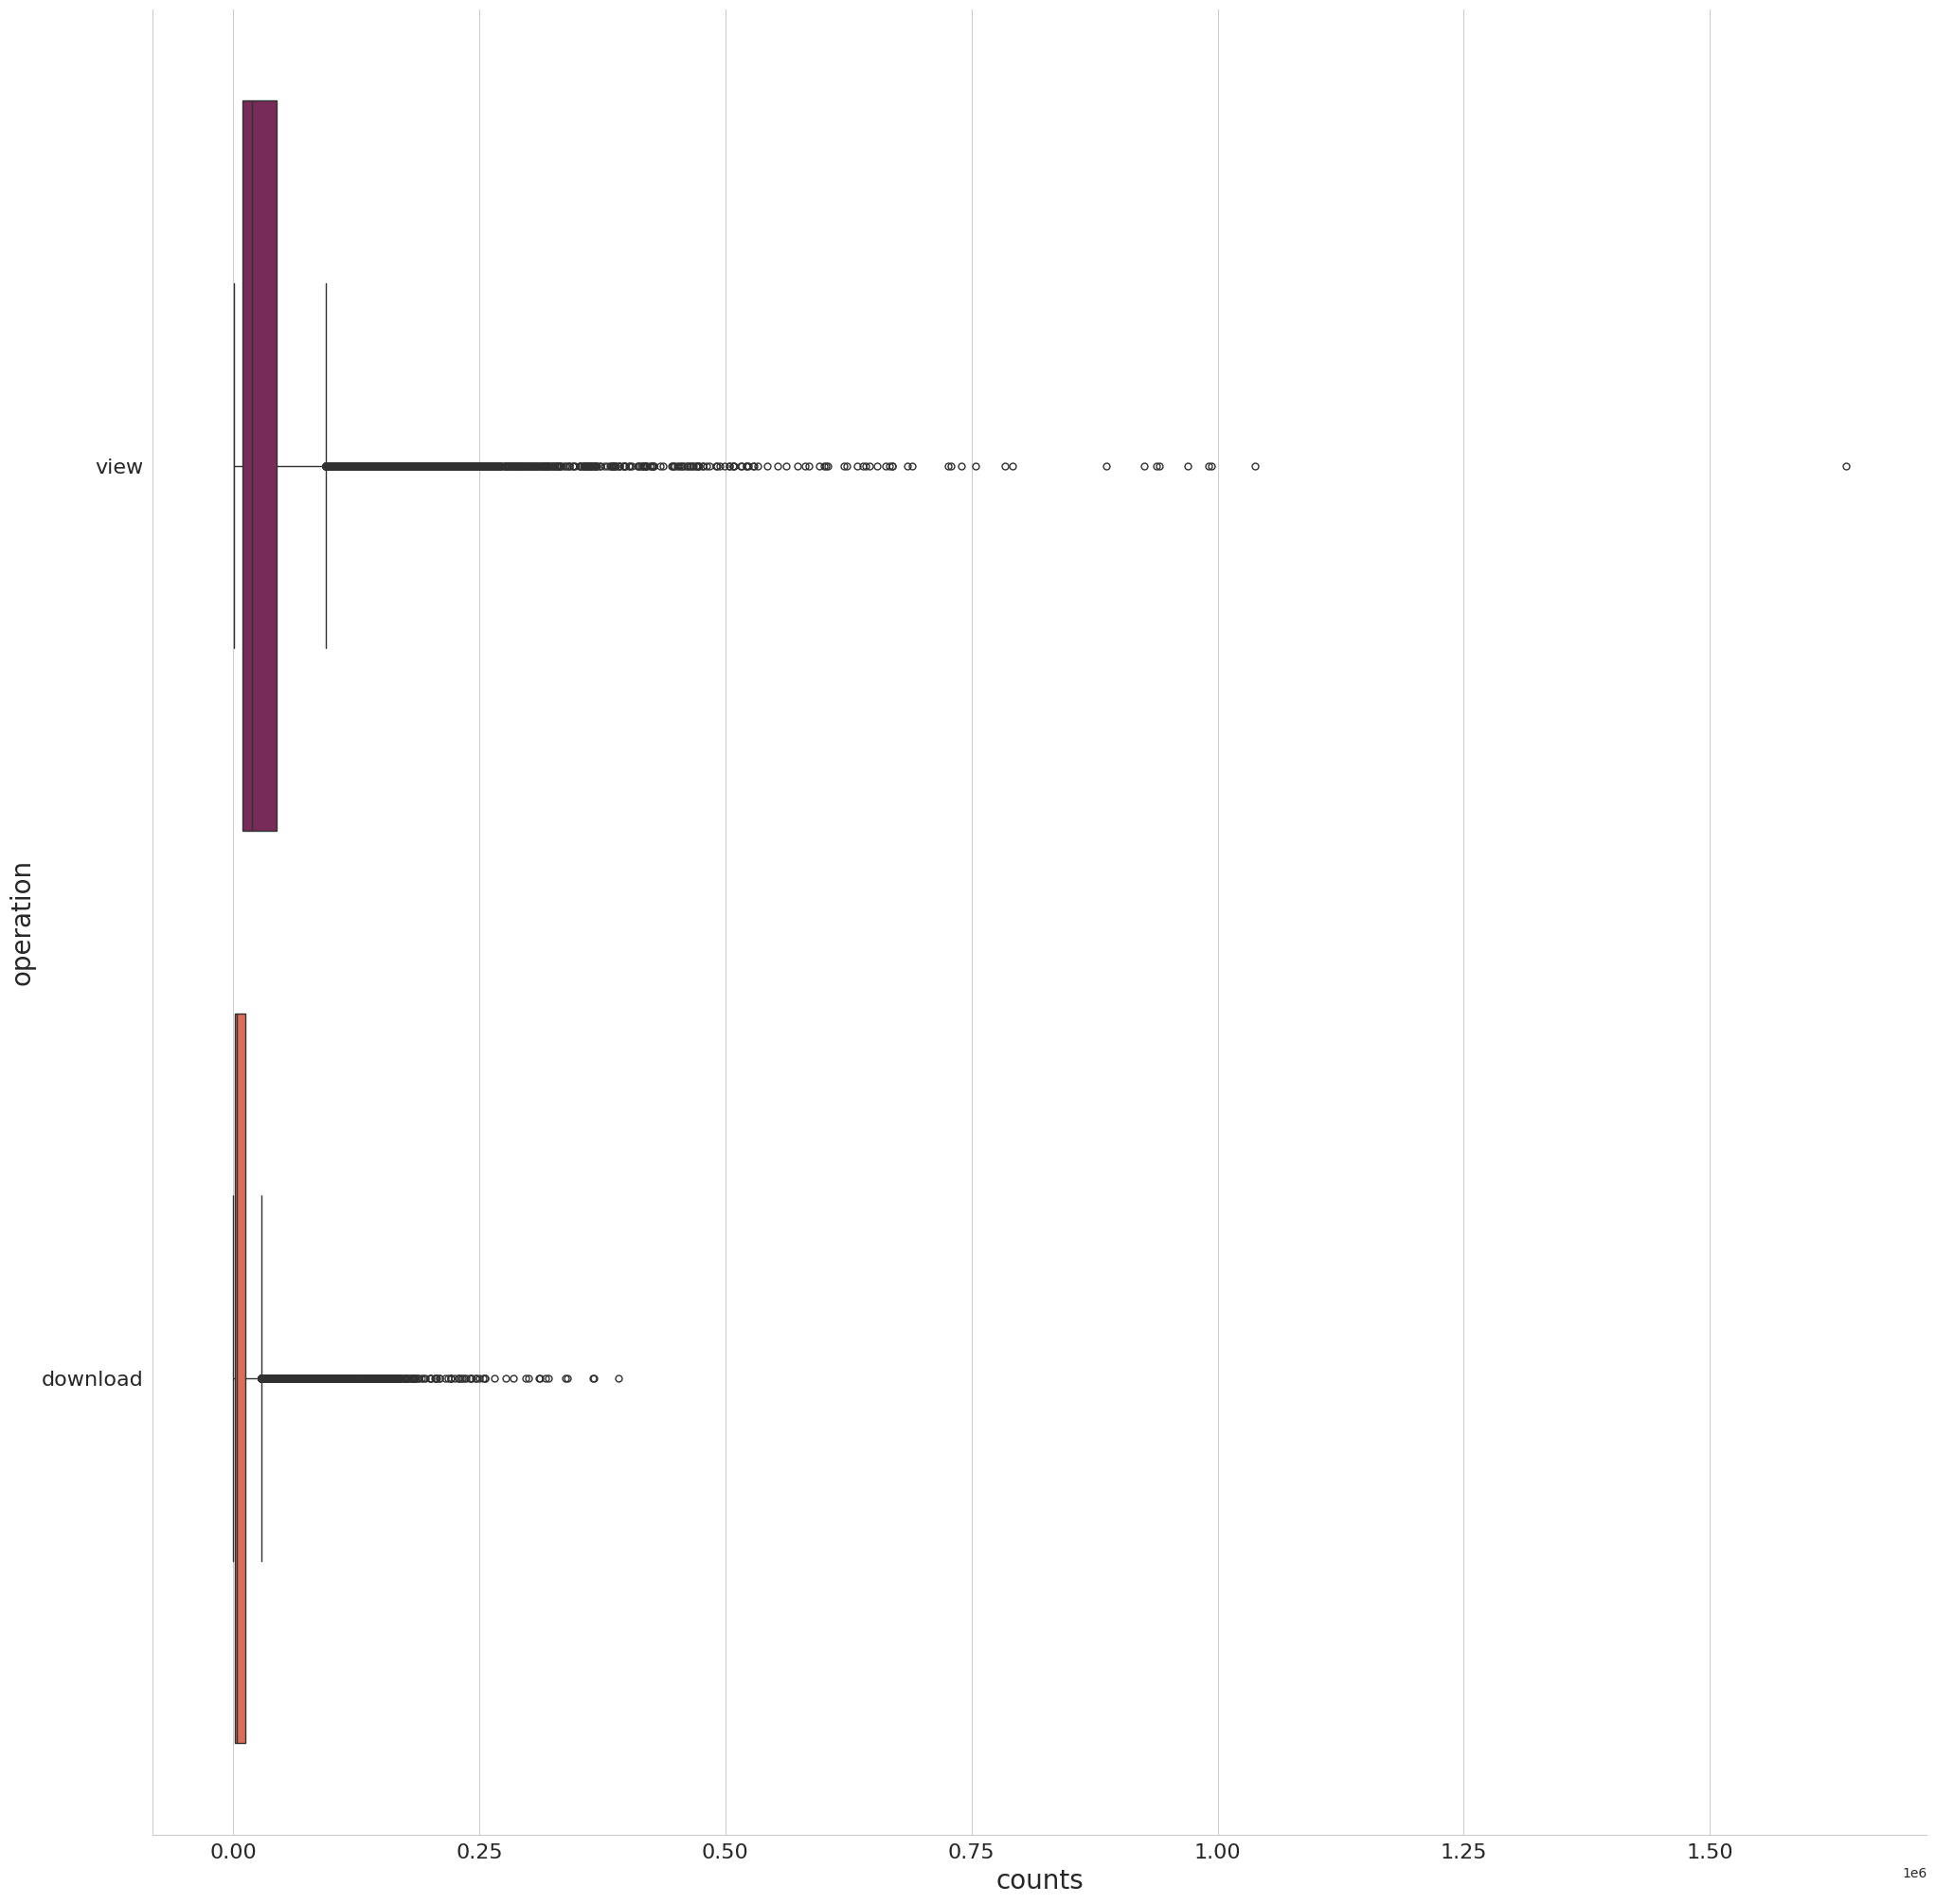

In [71]:
sns.set_style("whitegrid")
operations_count_box = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('operation', fontsize=20)
plt.xlabel('counts', fontsize=20)
plt.show()

<ipython-input-73-bdb7933ea5eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  operations_count_box_no_outliers = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')


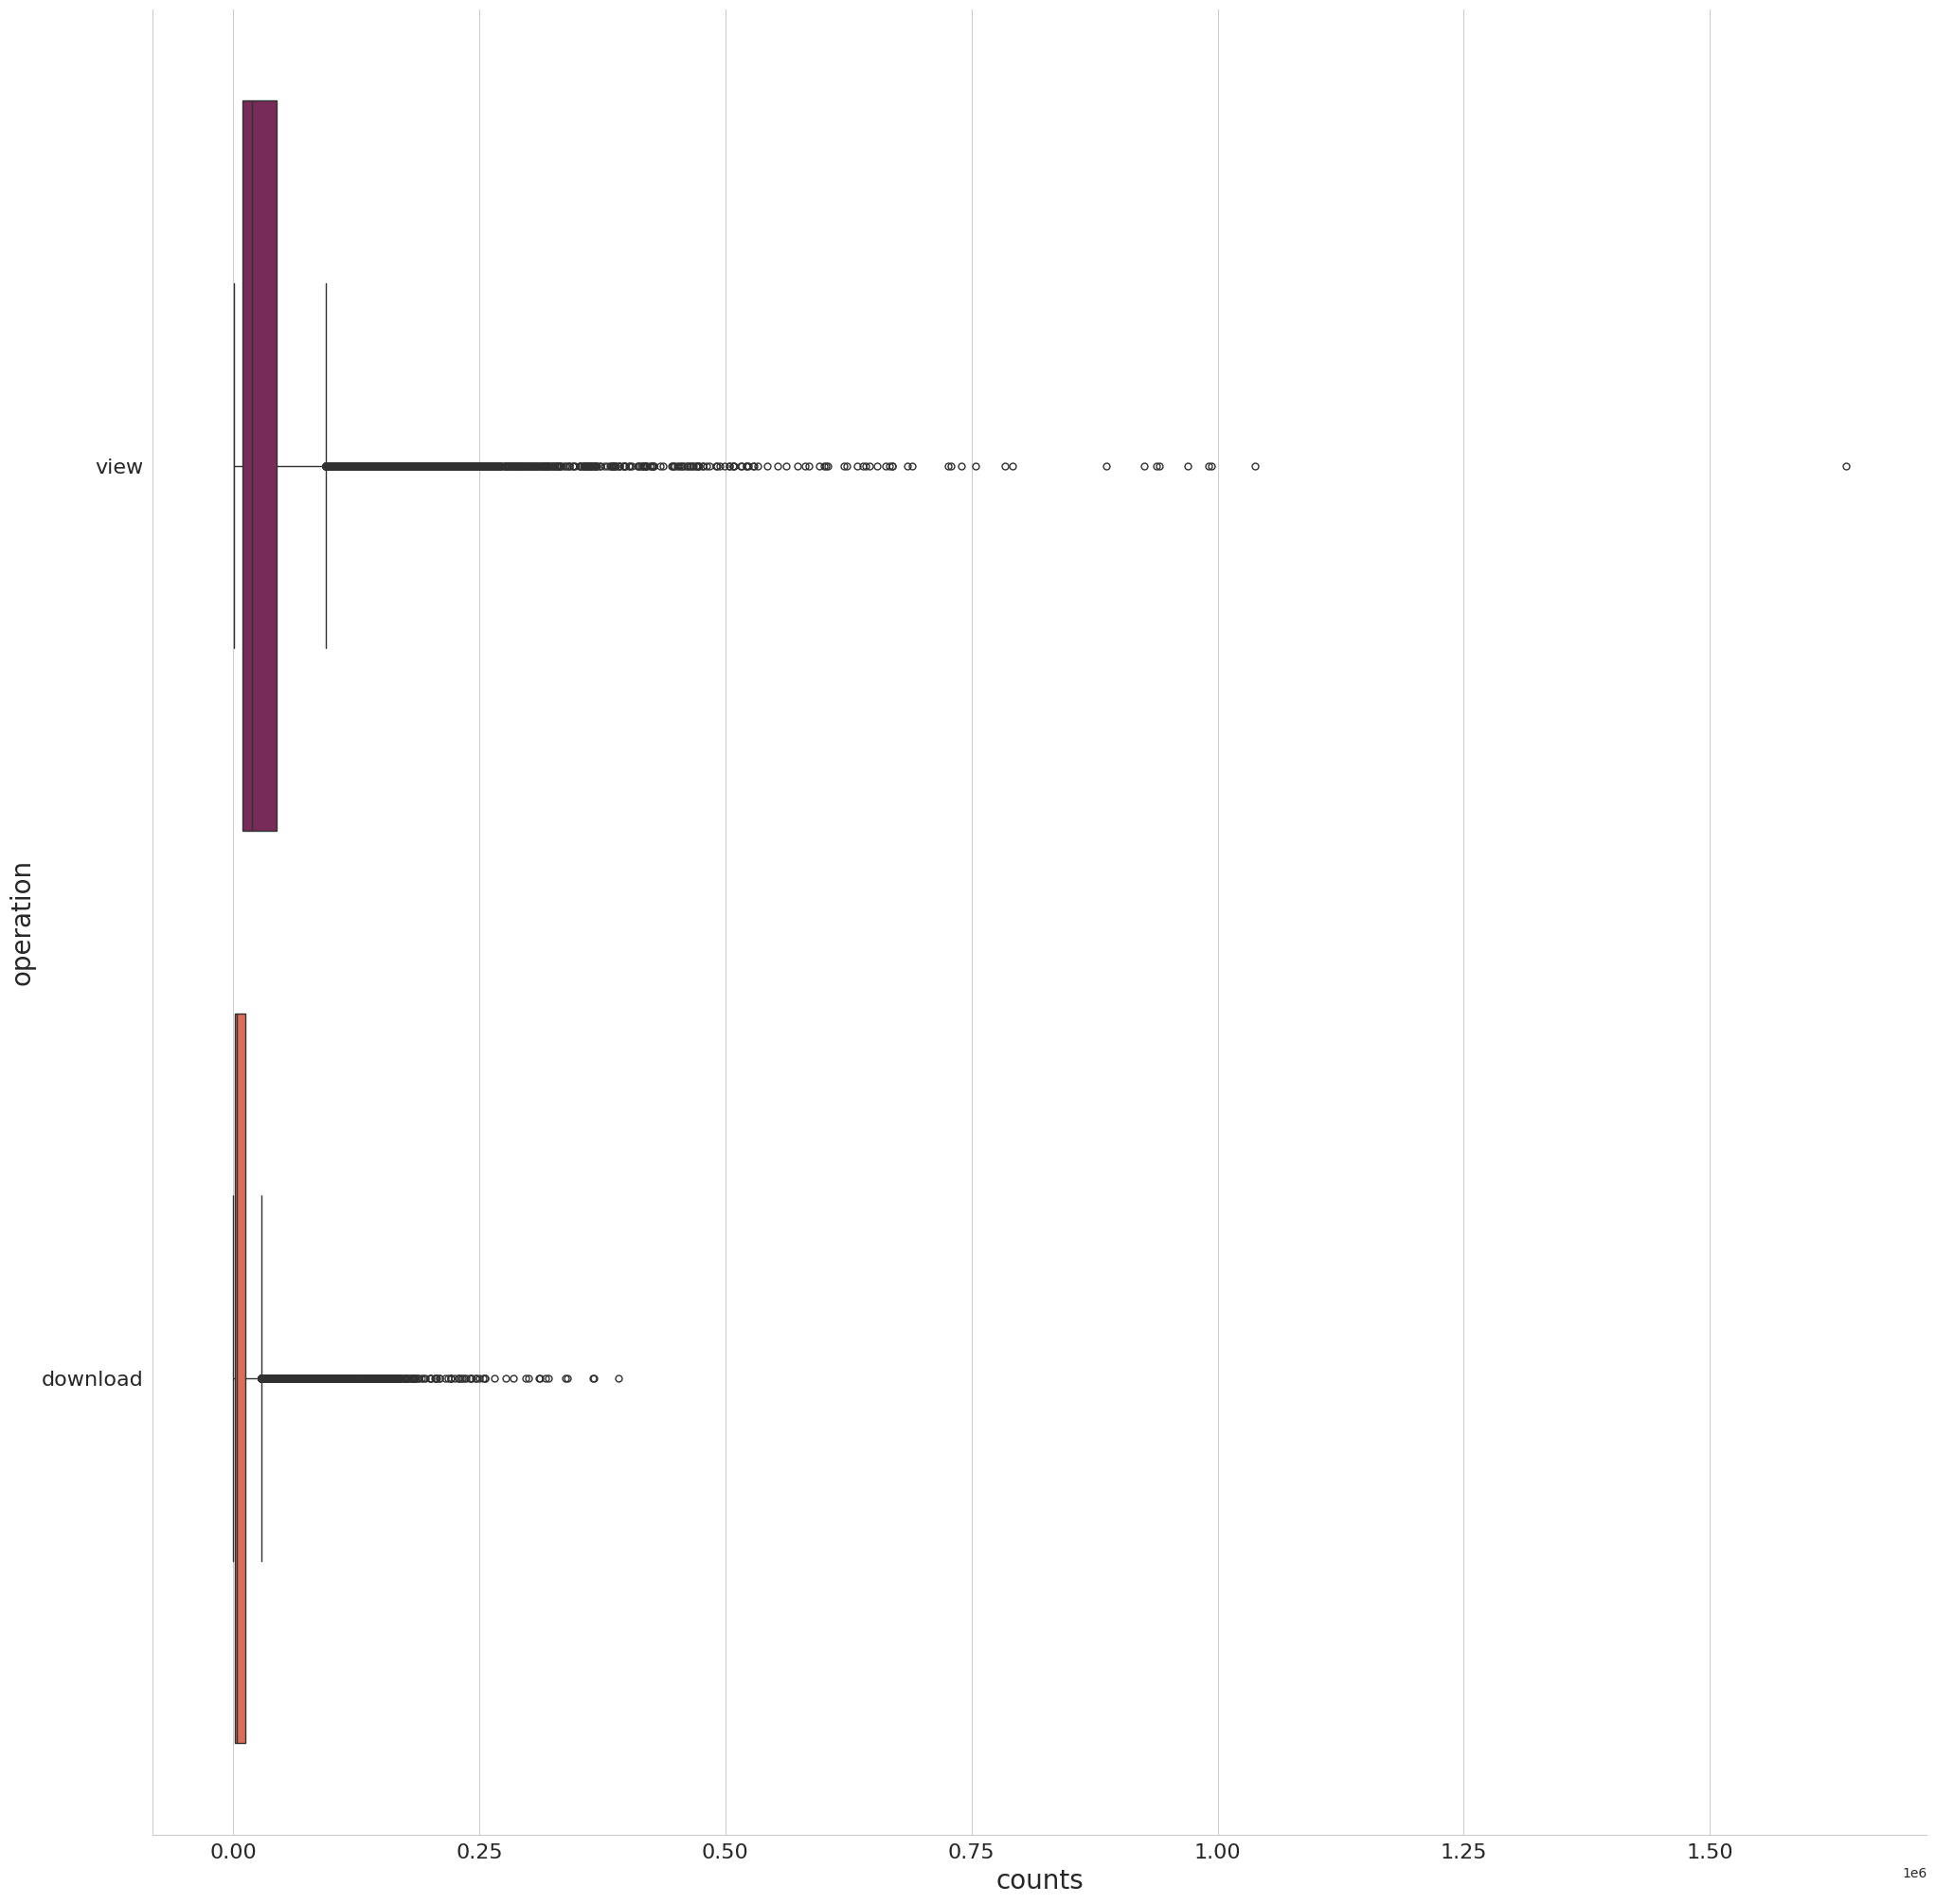

In [73]:
sns.set_style("whitegrid")
# No outliers
operations_count_box_no_outliers = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('operation', fontsize=20, )
plt.xlabel('counts', fontsize=20)
plt.show()

In [74]:
IMDb_rating = pd.DataFrame(list(mov_data['IMDb-rating']), columns=['rate'])
IMDb_rating = pd.DataFrame(IMDb_rating, columns=['source', 'rate'])
IMDb_rating['source'] = 'IMDb'
IMDb_rating

source  rate
0       IMDb   4.8
1       IMDb   6.4
2       IMDb   5.2
3       IMDb   8.1
4       IMDb   4.6
...      ...   ...
17081   IMDb   7.8
17082   IMDb   7.1
17083   IMDb   5.6
17084   IMDb   7.9
17085   IMDb   8.0

[17086 rows x 2 columns]

<ipython-input-75-8928cd0daee4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  rating_count_box = sns.catplot(data=IMDb_rating, kind='box', y='source', x='rate', height=20, palette='rocket')


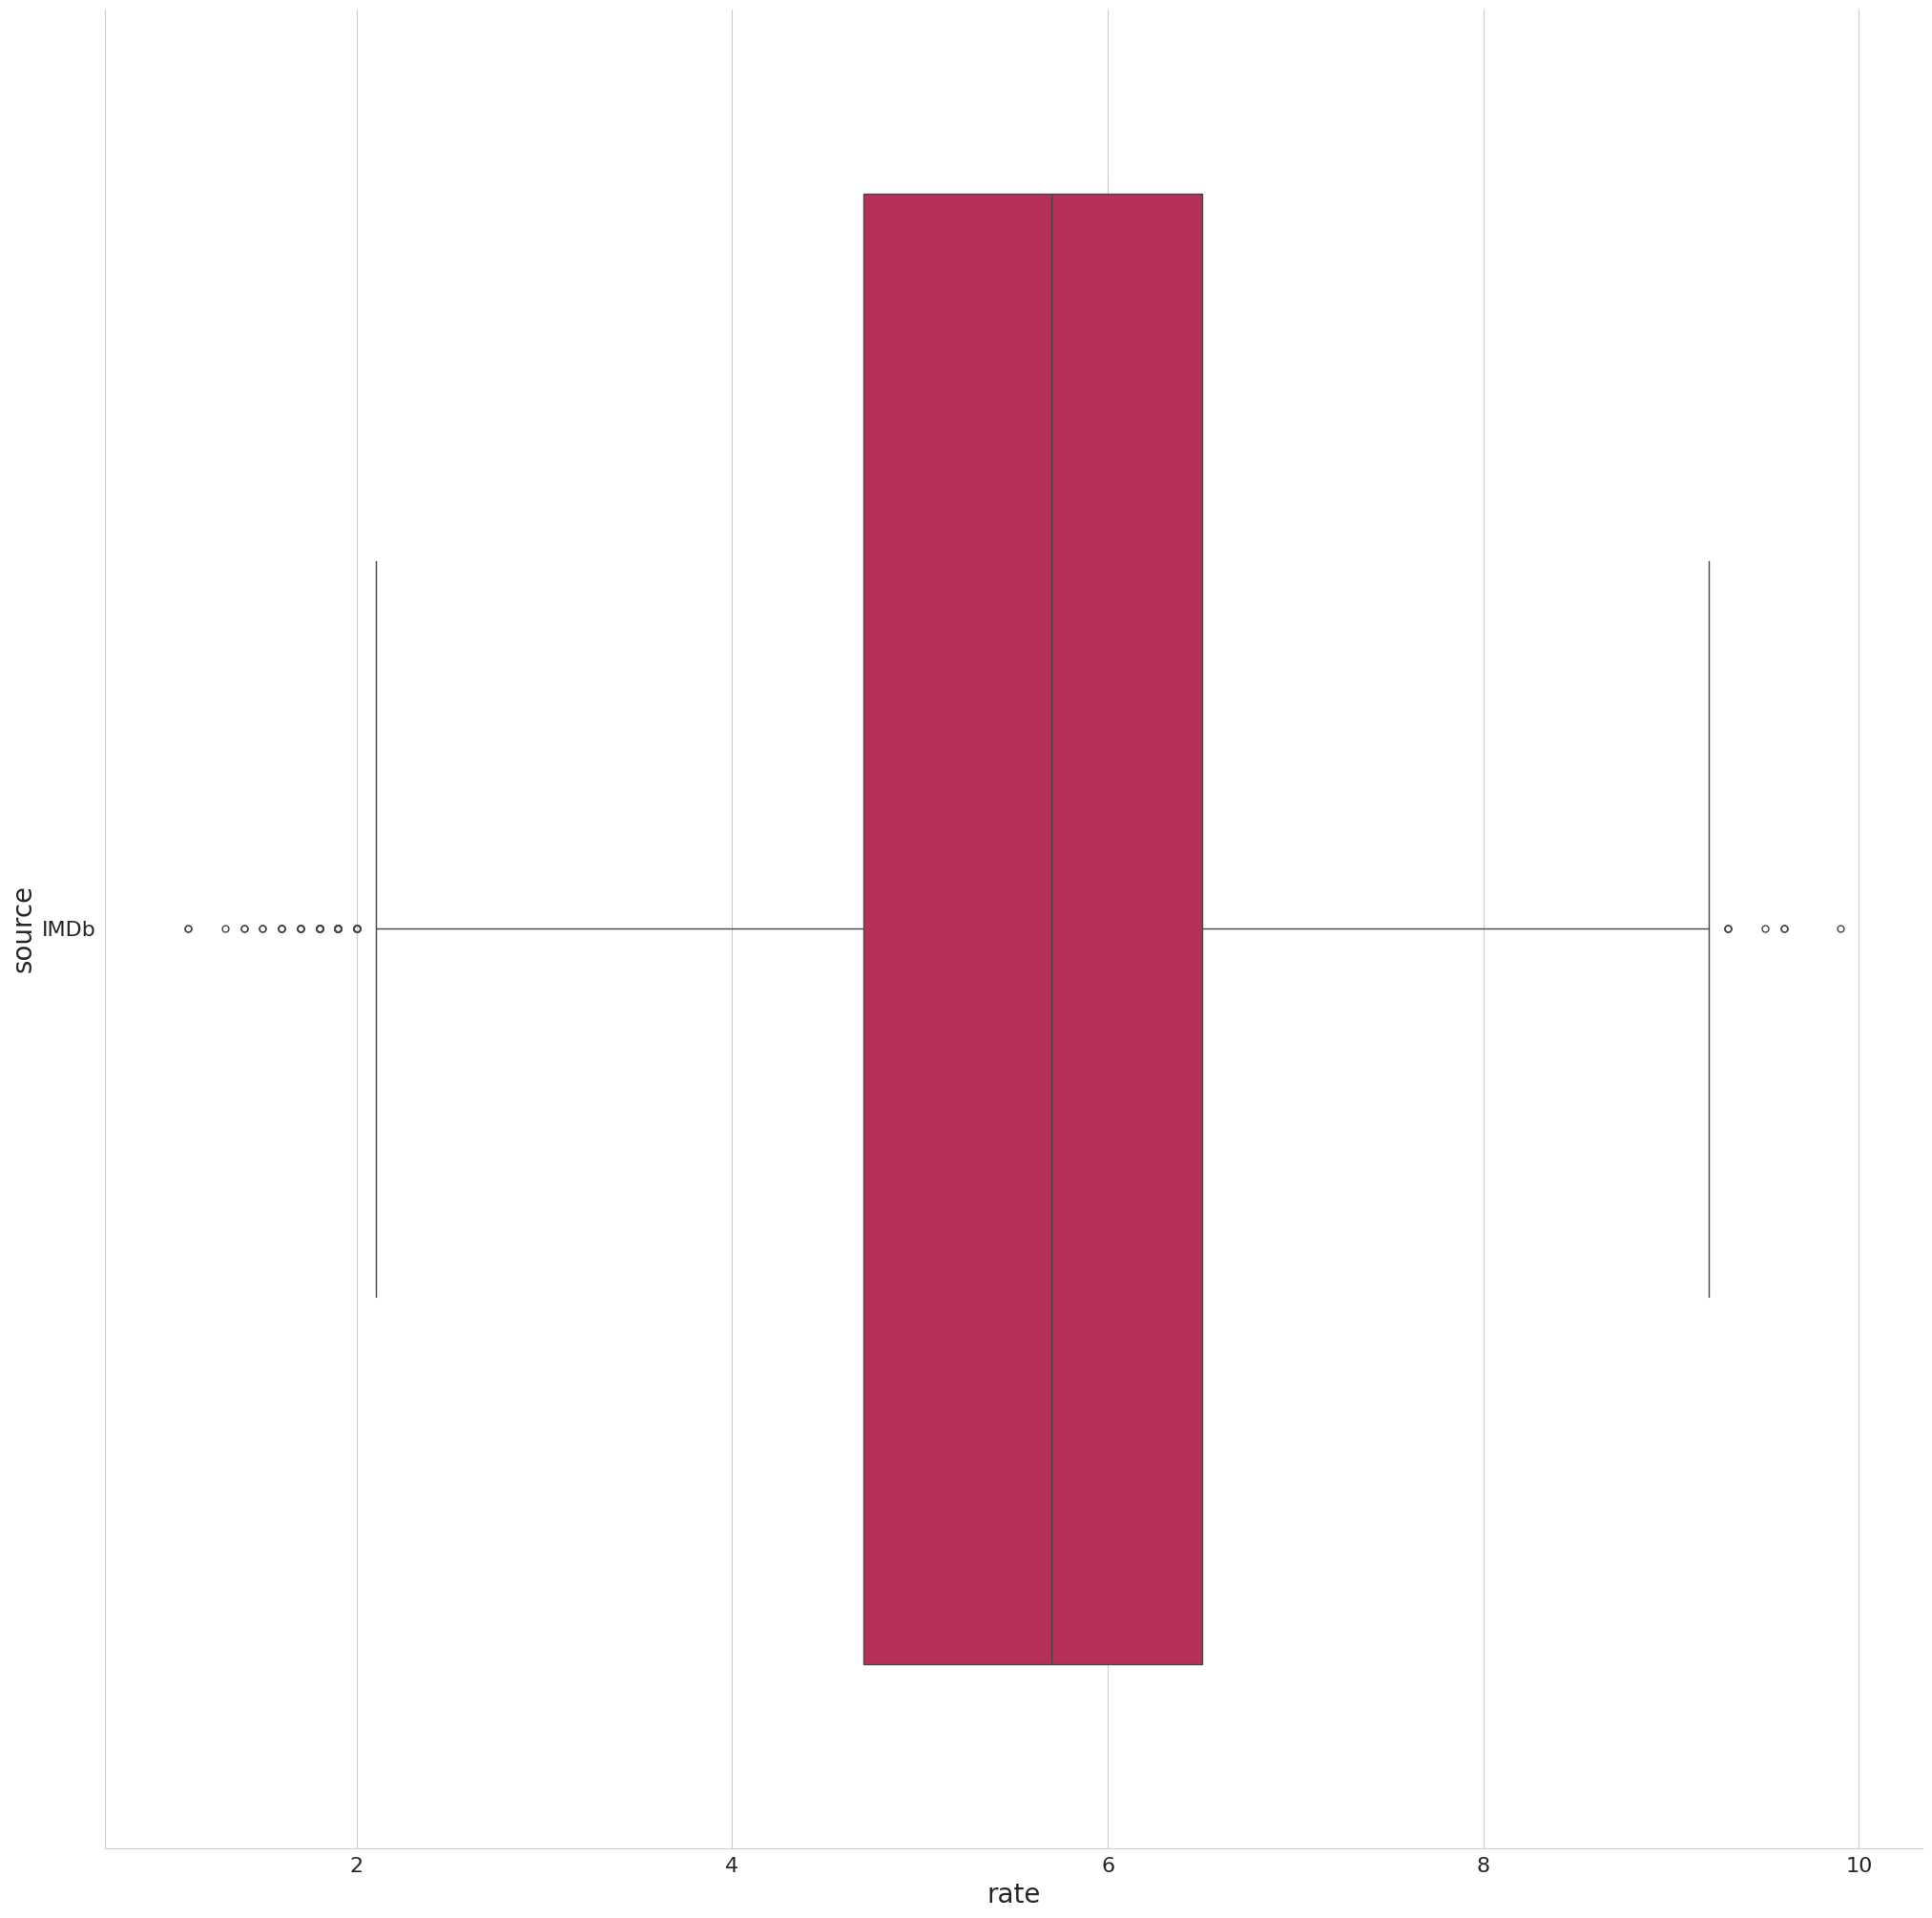

In [75]:
sns.set_style("whitegrid")
rating_count_box = sns.catplot(data=IMDb_rating, kind='box', y='source', x='rate', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('source', fontsize=20)
plt.xlabel('rate', fontsize=20)
plt.show()

## 3. 处理 NaN

### NaN Analysis

首先，让回顾一下数据集的摘要，特别是NaN的存在情况。

In [76]:
dtype_uni_miss(mov_data)

dtype  \
IMDb-rating             float64   
appropriate_for          object   
director                 object   
downloads               float64   
id                       object   
industry                 object   
language                 object   
posted_date      datetime64[ns]   
release_date     datetime64[ns]   
run_time                 object   
storyline                object   
title                    object   
views                   float64   
writer                   object   

                                                               eg.  \
IMDb-rating                                                    4.8   
appropriate_for                                                  R   
director                                                 John Swab   
downloads                                                    455.0   
id                                                          372092   
industry                                       Hollywood / English   
language                                                   English   
posted_date                                    2023-02-20 00:00:00   
release_date                                   2023-01-28 00:00:00   
run_time                                                       105   
storyline        Doc\r\n facilitates a fragile truce between th...   
title                                                 Little Dixie   
views                                                       4442.0   
writer                                                   John Swab   

                 num_unique null_share  
IMDb-rating              85      2.79%  
appropriate_for          20     42.59%  
director               9672      9.17%  
downloads             10479      0.01%  
id                    17086      0.00%  
industry                 10      0.01%  
language               1168      3.13%  
posted_date            4123      0.01%  
release_date           4886      0.01%  
run_time                201      5.85%  
storyline             15748      7.74%  
title                 16572      0.01%  
views                 14747      0.01%  
writer                13603     10.65%

In [77]:
cols, nulls = [], []

for col in mov_data:
    cols.append(col)
    null = mov_data[col].isna().sum()
    nulls.append(null)

df = pd.DataFrame(nulls, index=cols, columns=['num_null']).T
df

IMDb-rating  appropriate_for  director  downloads  id  industry  \
num_null          477             7277      1566          1   0         1   

          language  posted_date  release_date  run_time  storyline  title  \
num_null       534            1             1      1000       1322      1   

          views  writer  
num_null      1    1820

### 删除 NaN

通过这种方法清理的数据集被命名为***mov_data_cleaned***。








In [78]:
from numpy import nan as NA

In [79]:
# Delete rows containing NaN
mov_data_cleaned = mov_data.dropna()
mov_data_cleaned

IMDb-rating appropriate_for  \
0              4.8               R   
1              6.4           TV-PG   
2              5.2               R   
7              6.5               R   
8              6.9           PG-13   
...            ...             ...   
20496          7.6        Approved   
20497          3.3               R   
20499          3.6       Not Rated   
20522          7.1       Not Rated   
20533          5.6               R   

                                            director  downloads      id  \
0                                          John Swab      455.0  372092   
1                                        Paul Ziller       73.0  372091   
2                                       Ben Wheatley     1427.0  343381   
7                                     Benjamin Caron     1781.0  371751   
8                                        Ravi Kapoor      458.0  372042   
...                                              ...        ...     ...   
20496  William Cottrell, David Hand, Wilfred Jackson    41145.0     920   
20497                     Sam Gorski, Niko Pueringer     9551.0     921   
20499                              Keith Alan Morris     8953.0     994   
20522                                      Biren Nag     1932.0   23825   
20533                      Barbara Topsøe-Rothenborg    12284.0    1173   

                  industry                language posted_date release_date  \
0      Hollywood / English                 English  2023-02-20   2023-01-28   
1      Hollywood / English                 English  2023-02-20   2023-02-05   
2      Hollywood / English           English,Hindi  2021-04-20   2021-06-18   
7      Hollywood / English                 English  2023-02-13   2023-02-17   
8      Hollywood / English                 English  2023-02-18   2022-12-02   
...                    ...                     ...         ...          ...   
20496         Anime / Kids                 English  1970-01-01   1938-02-03   
20497  Hollywood / English                 English  1970-01-01   1970-01-01   
20499  Hollywood / English                 English  1970-01-01   1970-01-01   
20522   Bollywood / Indian                   Hindi  1970-01-01   1962-05-11   
20533  Hollywood / English  Spanish,German,English  2016-05-26   1970-01-01   

      run_time                                          storyline  \
0          105  Doc\r\n facilitates a fragile truce between th...   
1           84  Caterer\r\n Goldy Berry reunites with detectiv...   
2          107  As the world searches for a cure to a disastro...   
7          116  Motivations are suspect, and expectations are ...   
8           80  An\r\n unmotivated South Asian American rapper...   
...        ...                                                ...   
20496       83  The first, and by far most memorable full-leng...   
20497       87  After losing contact with its researchers on a...   
20499       98  Gutter King is an urban coming-of-age fight dr...   
20522      158  After a lusty Thakur rapes a young girl, she k...   
20533       90  LOVE AT FIRST HICCUP is a charming, innocent, ...   

                                            title    views  \
0                                    Little Dixie   4442.0   
1      Grilling Season: A Curious Caterer Mystery   1002.0   
2                                    In the Earth  14419.0   
7                                         Sharper  18225.0   
8                                    Four Samosas   6912.0   
...                                           ...      ...   
20496             Snow White and the Seven Dwarfs  66860.0   
20497                                 Dark Island  25581.0   
20499                                 Gutter King  33431.0   
20522                              Bees Saal Baad   6077.0   
20533                        Love at First Hiccup  36022.0   

                                                  writer  
0                                              John Swab  
1       

可以看到之前的 17,086 行现在只剩下了 8,650 行。

由于属性`apppriate_for`的空值比例高达42.59%，删除所有这些数据是不合理的。在这里，我们展示数据集***mov_data***和数据集***mov_data_cleaned***之间的差异：

In [80]:
appropriate_count = pd.DataFrame(mov_data['appropriate_for'].value_counts()).rename(columns={'appropriate_for': 'appropriate_count'}).sort_values(by='appropriate_count', ascending=True)

In [81]:
'18+' in list(mov_data_cleaned['appropriate_for'].value_counts().index)

True

In [82]:
appropriate_count_cleaned = appropriate_count
appropriate_count_cleaned['appropriate_count_cleaned'] = [0] * len(appropriate_count)

for level in list(appropriate_count.index):
    if level in list(mov_data_cleaned['appropriate_for'].value_counts().index):
        appropriate_count_cleaned.loc[[level], ['appropriate_count_cleaned']] = mov_data_cleaned['appropriate_for'].value_counts().loc[[level]].values[0]

In [83]:
appropriate_count_cleaned

appropriate_count  appropriate_count_cleaned
18+                             1                          1
Drama                           1                          0
TV-13                           1                          1
MA-17                           1                          1
Drama, Romance                  1                          1
Passed                          3                          3
TV-Y7-FV                        3                          2
NC-17                           4                          4
Approved                        9                          7
TV-Y                           25                         15
TV-Y7                          44                         35
TV-G                           99                         85
TV-PG                         115                         88
G                             140                        109
TV-14                         293                        263
TV-MA                         406                        384
PG                            884                        769
PG-13                        1763                       1584
Not Rated                    2264                       2052
R                            3752                       3246

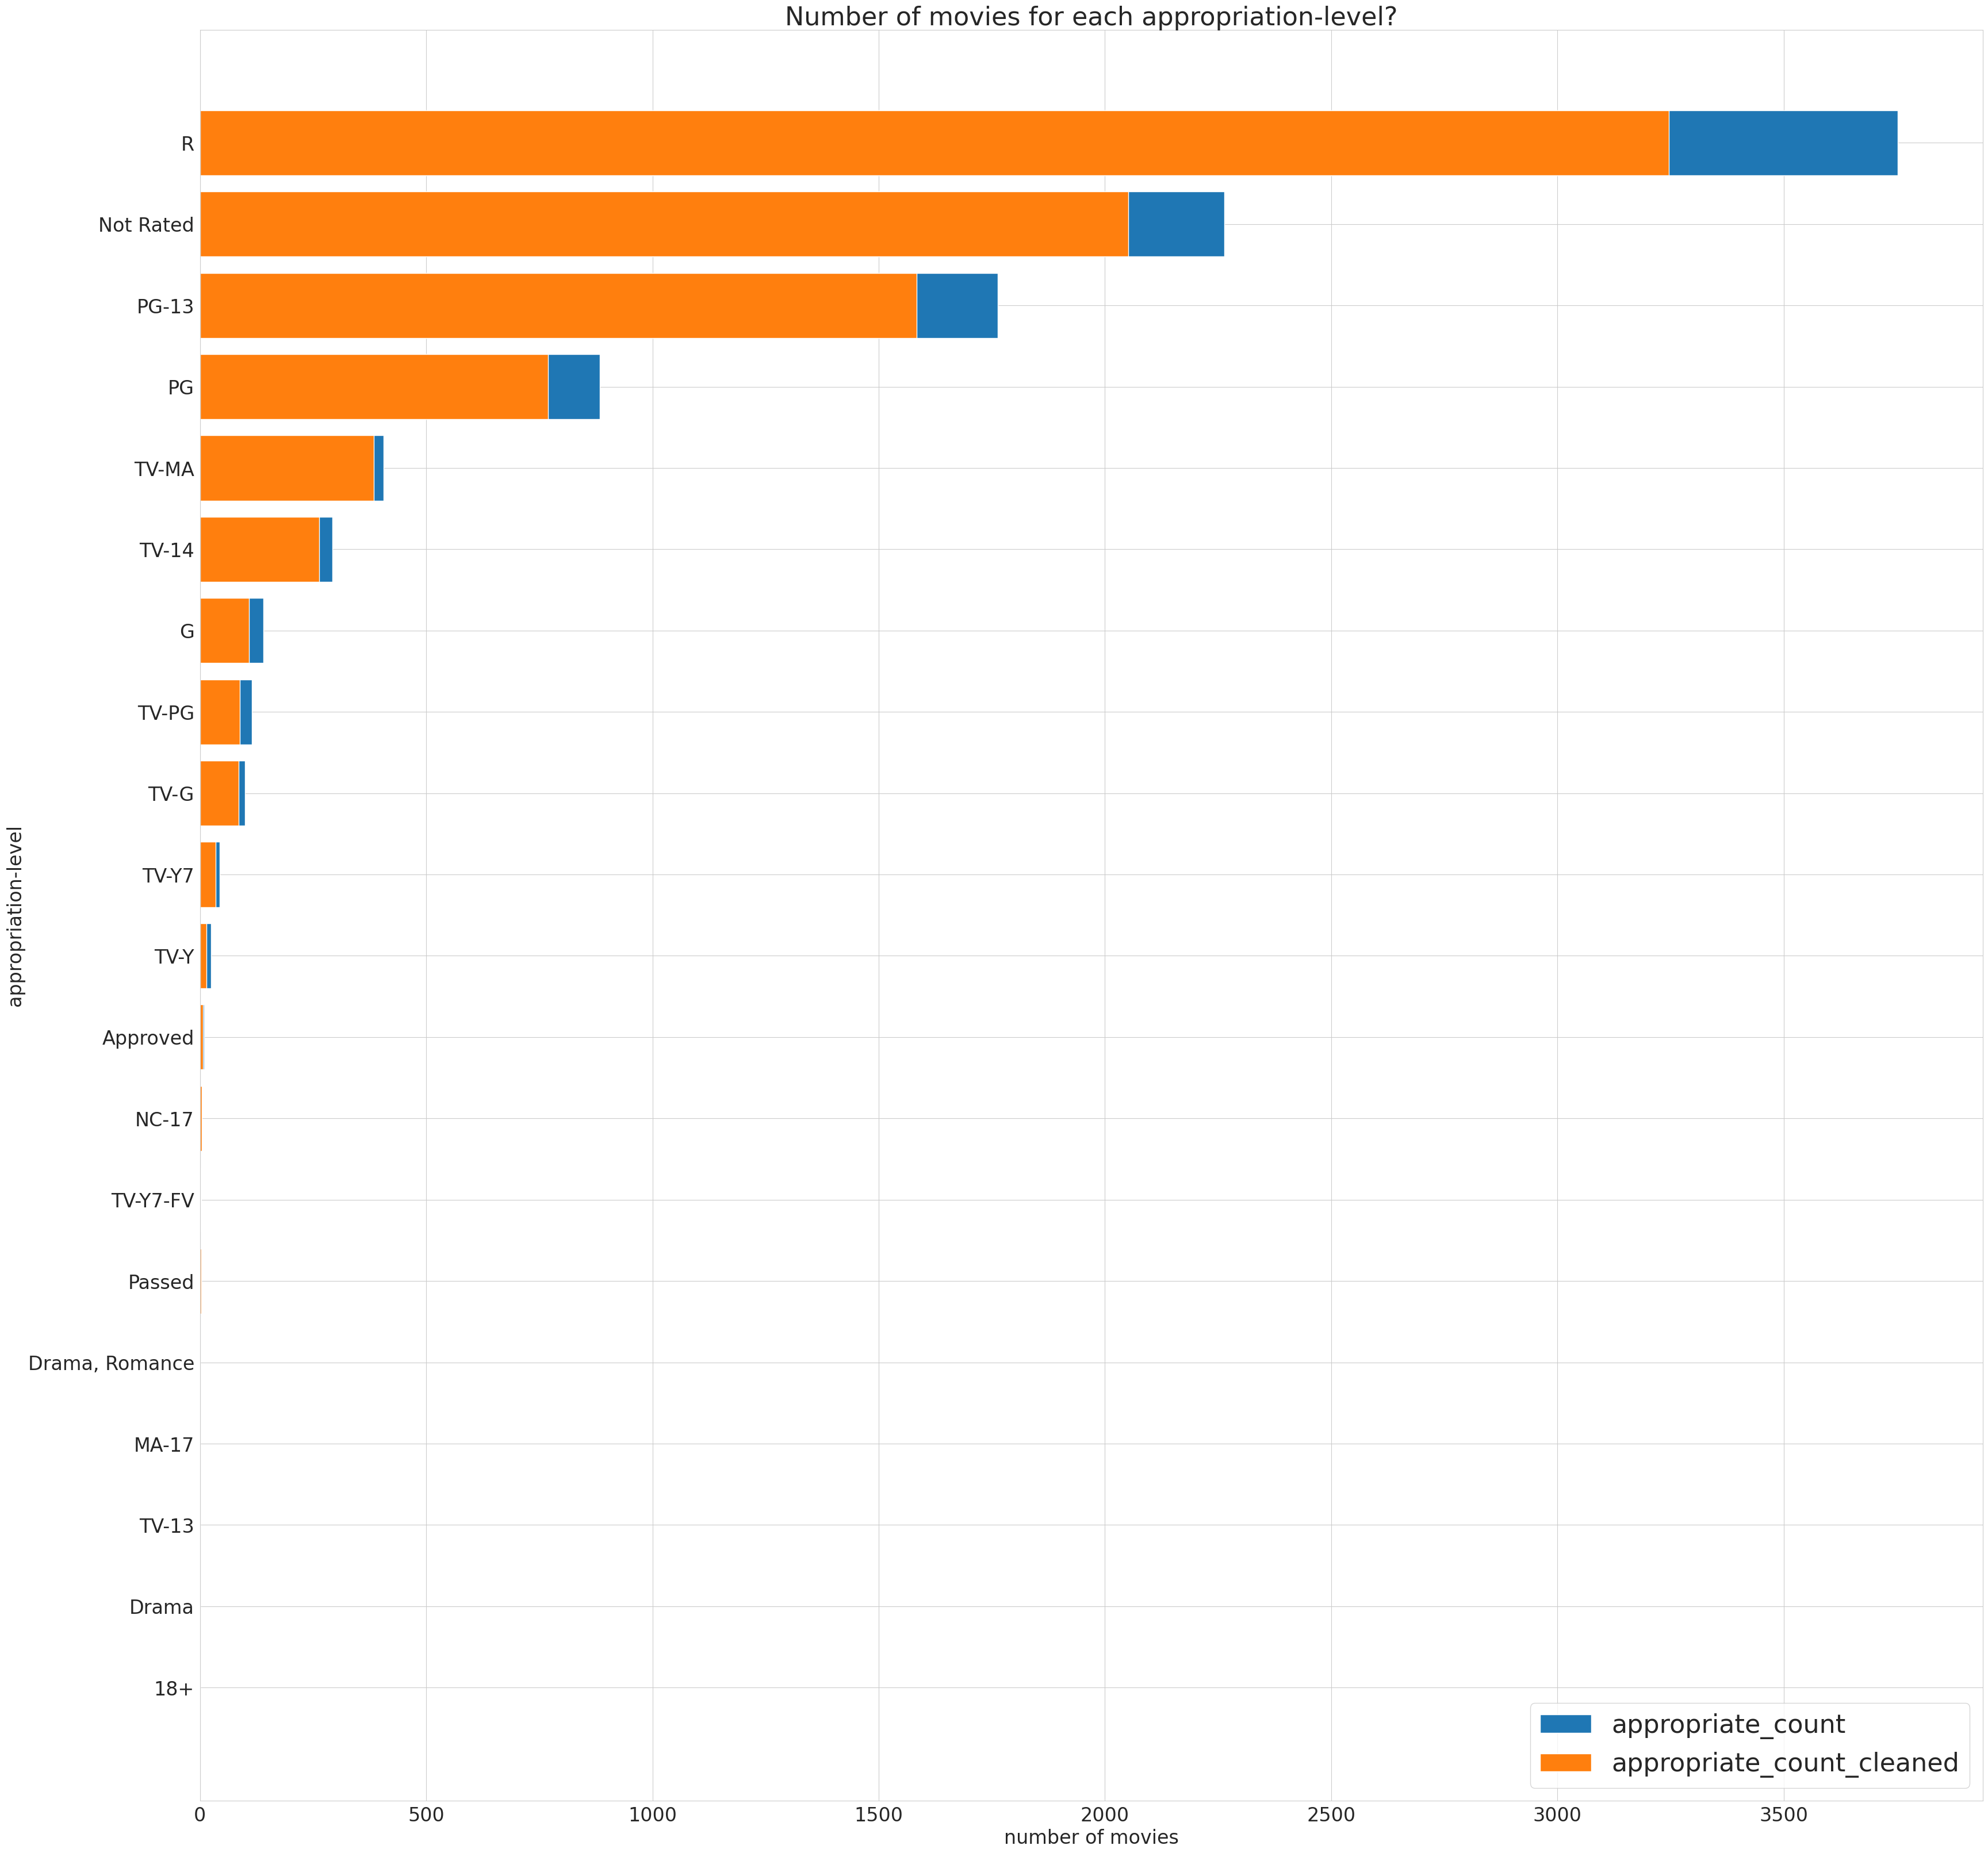

In [84]:
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(appropriate_count_cleaned.index, width=appropriate_count_cleaned['appropriate_count'], label='appropriate_count')
plt.barh(appropriate_count_cleaned.index, width=appropriate_count_cleaned['appropriate_count_cleaned'], label='appropriate_count_cleaned')
plt.ylabel('appropriation-level', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies for each appropriation-level?', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

分布略有变化。然而，删除具有缺失值`appropriate_for`的数据对其他属性的分布影响更显著。

In [85]:
(mov_data_cleaned['language']).iloc[2]

'English,Hindi'

In [86]:
mov_language_cleaned = mov_data_cleaned['language'].astype('str')
for i in range(len(mov_language_cleaned)):
    mov_language_cleaned.iloc[i] = mov_language_cleaned.iloc[i].split(',')
    for j in range(len(mov_language_cleaned.iloc[i])):
        mov_language_cleaned.iloc[i][j] = mov_language_cleaned.iloc[i][j].lstrip(' ')

mov_language_dict_cleaned = {}

for i in range(len(mov_language_cleaned)):
    for j in range(len(mov_language_cleaned.iloc[i])):
        if mov_language_cleaned.iloc[i][j] not in mov_language_dict_cleaned:
            mov_language_dict_cleaned['{}'.format(mov_language_cleaned.iloc[i][j])] = 0
        mov_language_dict_cleaned['{}'.format(mov_language_cleaned.iloc[i][j])] += 1
mov_language_dict_cleaned = dict(sorted(mov_language_dict_cleaned.items(), key=lambda x: x[1]))
# mov_language_dict_cleaned

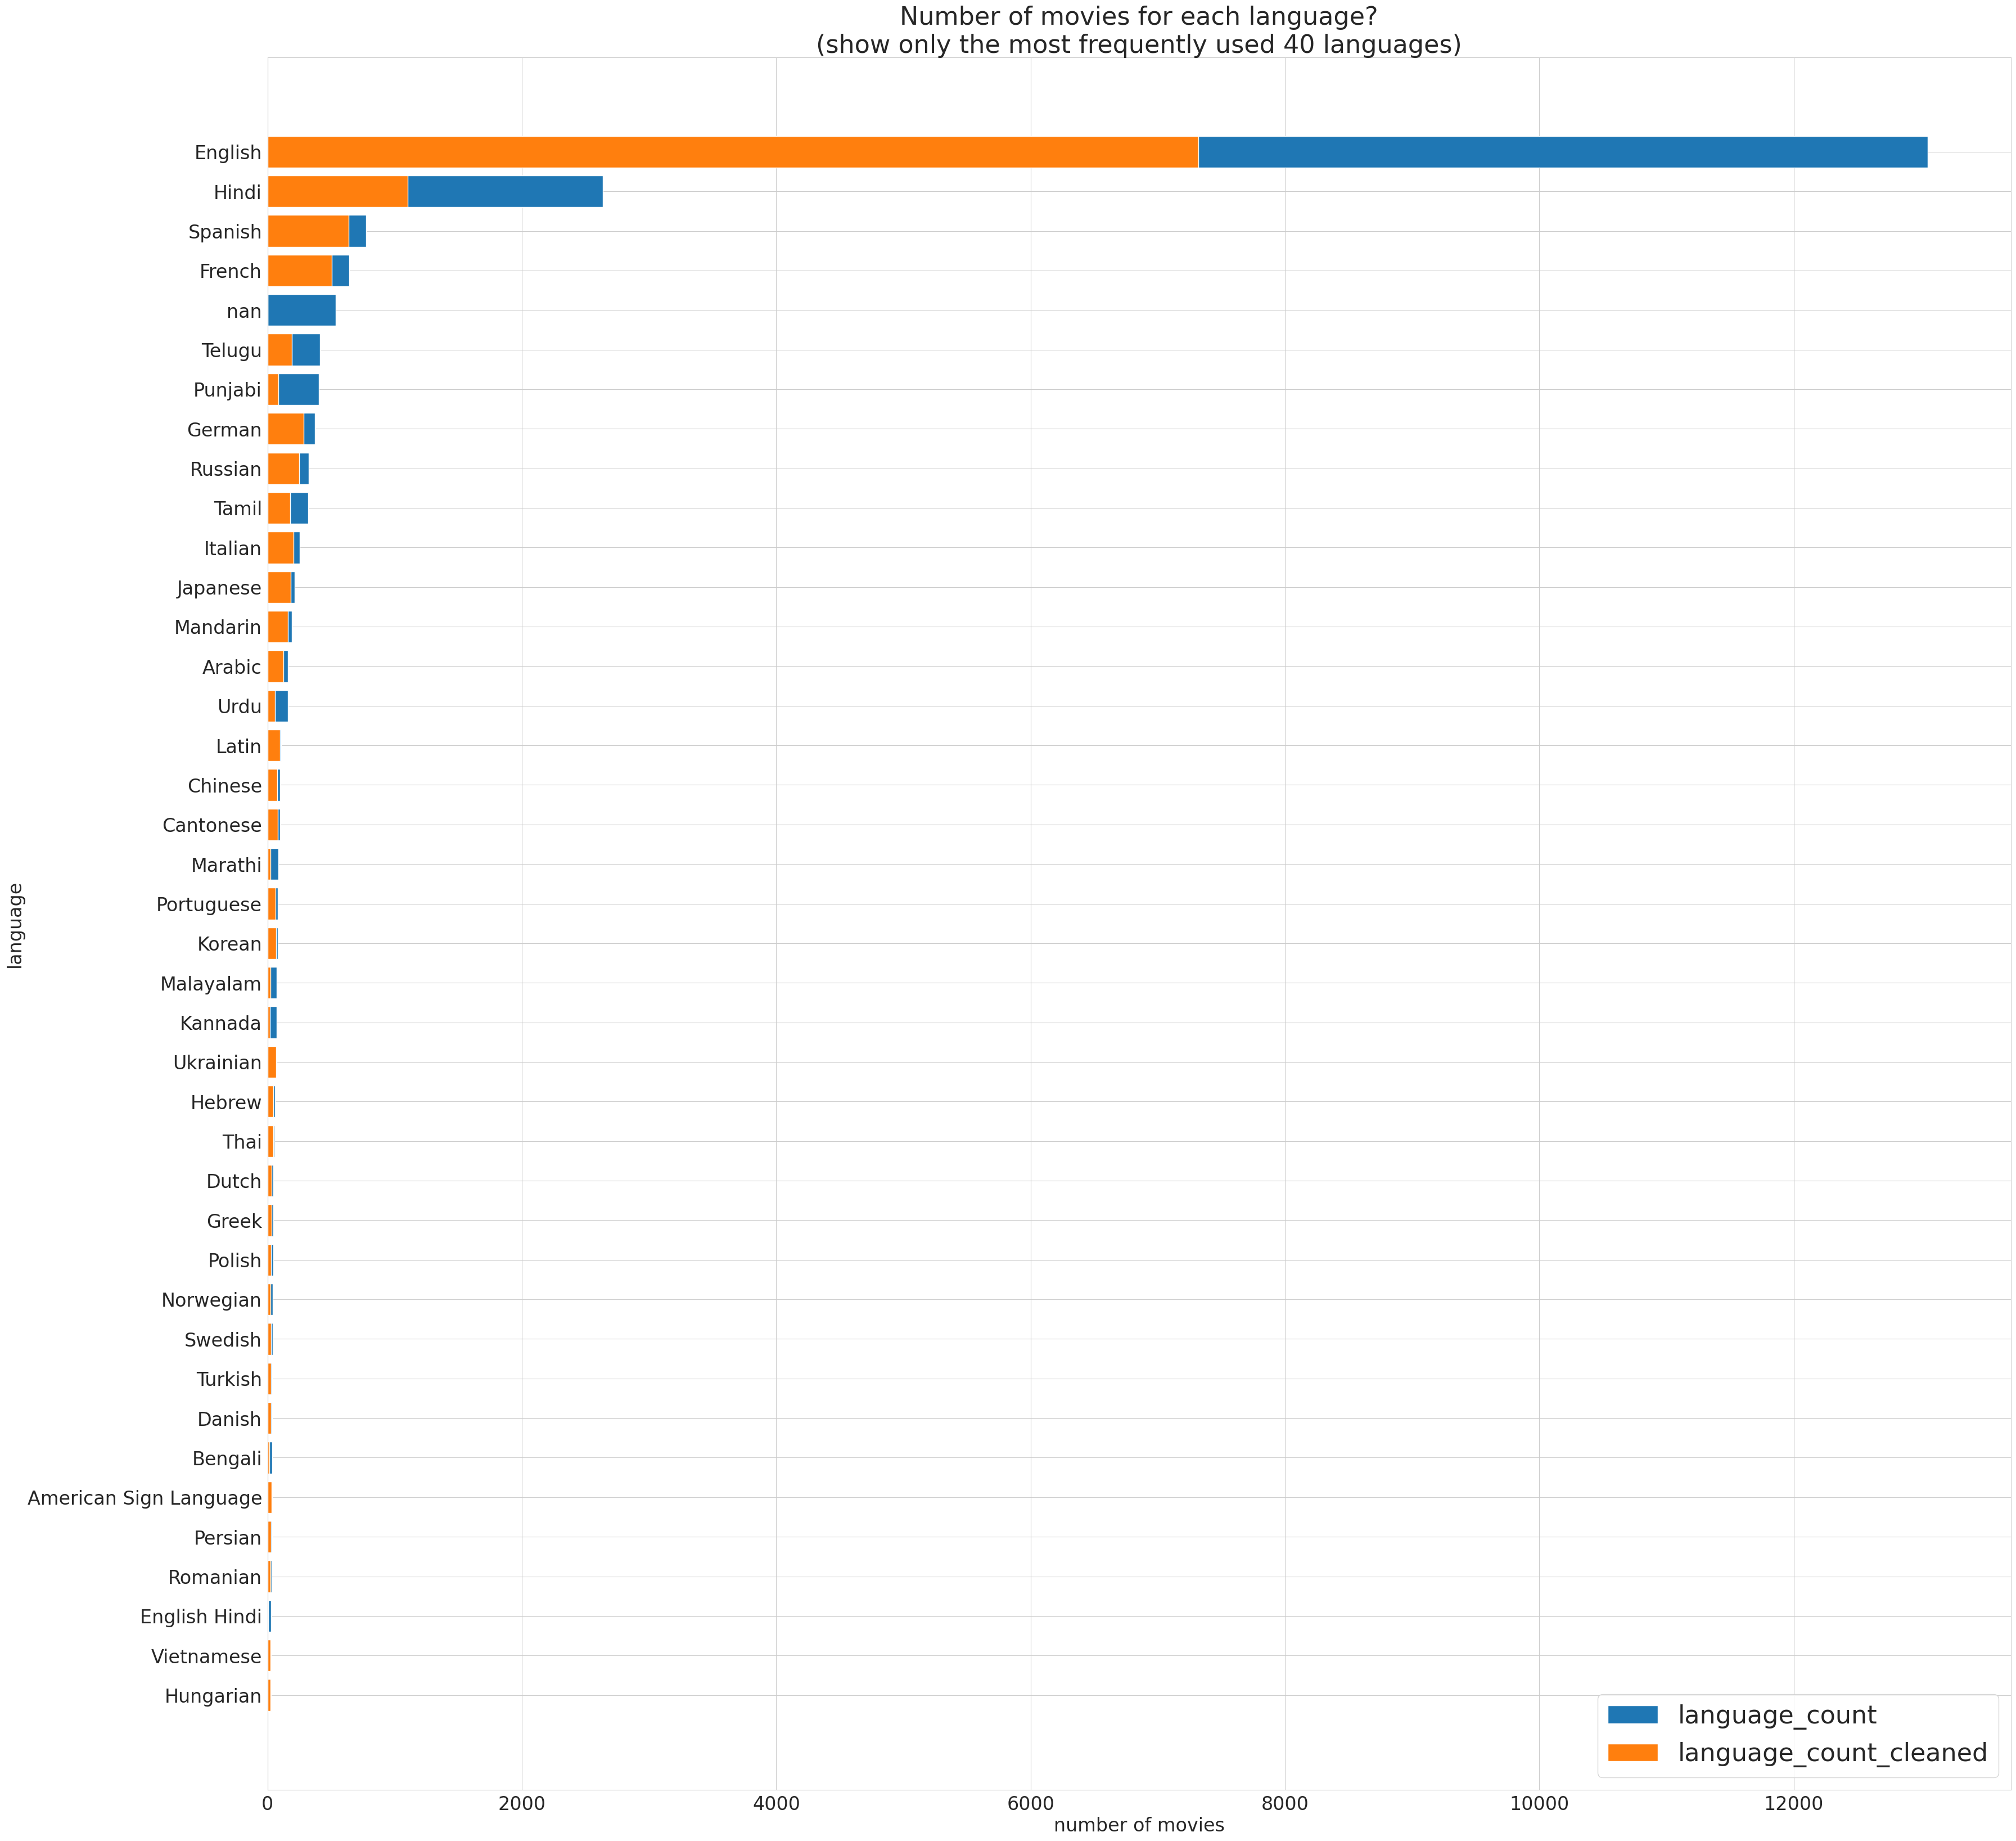

In [87]:
mov_language_dict_cleaned_sorted = {}
for language in list(mov_language_dict.keys()):
    mov_language_dict_cleaned_sorted[language] = 0
    if language in list(mov_language_dict_cleaned.keys()):
        mov_language_dict_cleaned_sorted[language] = mov_language_dict_cleaned[language]

plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(mov_language_dict.keys())[-40:], width=list(mov_language_dict.values())[-40:], label='language_count')
plt.barh(list(mov_language_dict.keys())[-40:], width=list(mov_language_dict_cleaned_sorted.values())[-40:], label='language_count_cleaned')
plt.ylabel('language', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies for each language?\n(show only the most frequently used 40 languages)', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

In [88]:
mov_data[mov_data['appropriate_for'].isna()]['industry'].value_counts()

Hollywood / English    4661
Bollywood / Indian     1339
Tollywood               425
Punjabi                 291
Anime / Kids            285
Stage shows             124
Pakistani                82
Wrestling                65
Dub / Dual Audio          4
Name: industry, dtype: int64

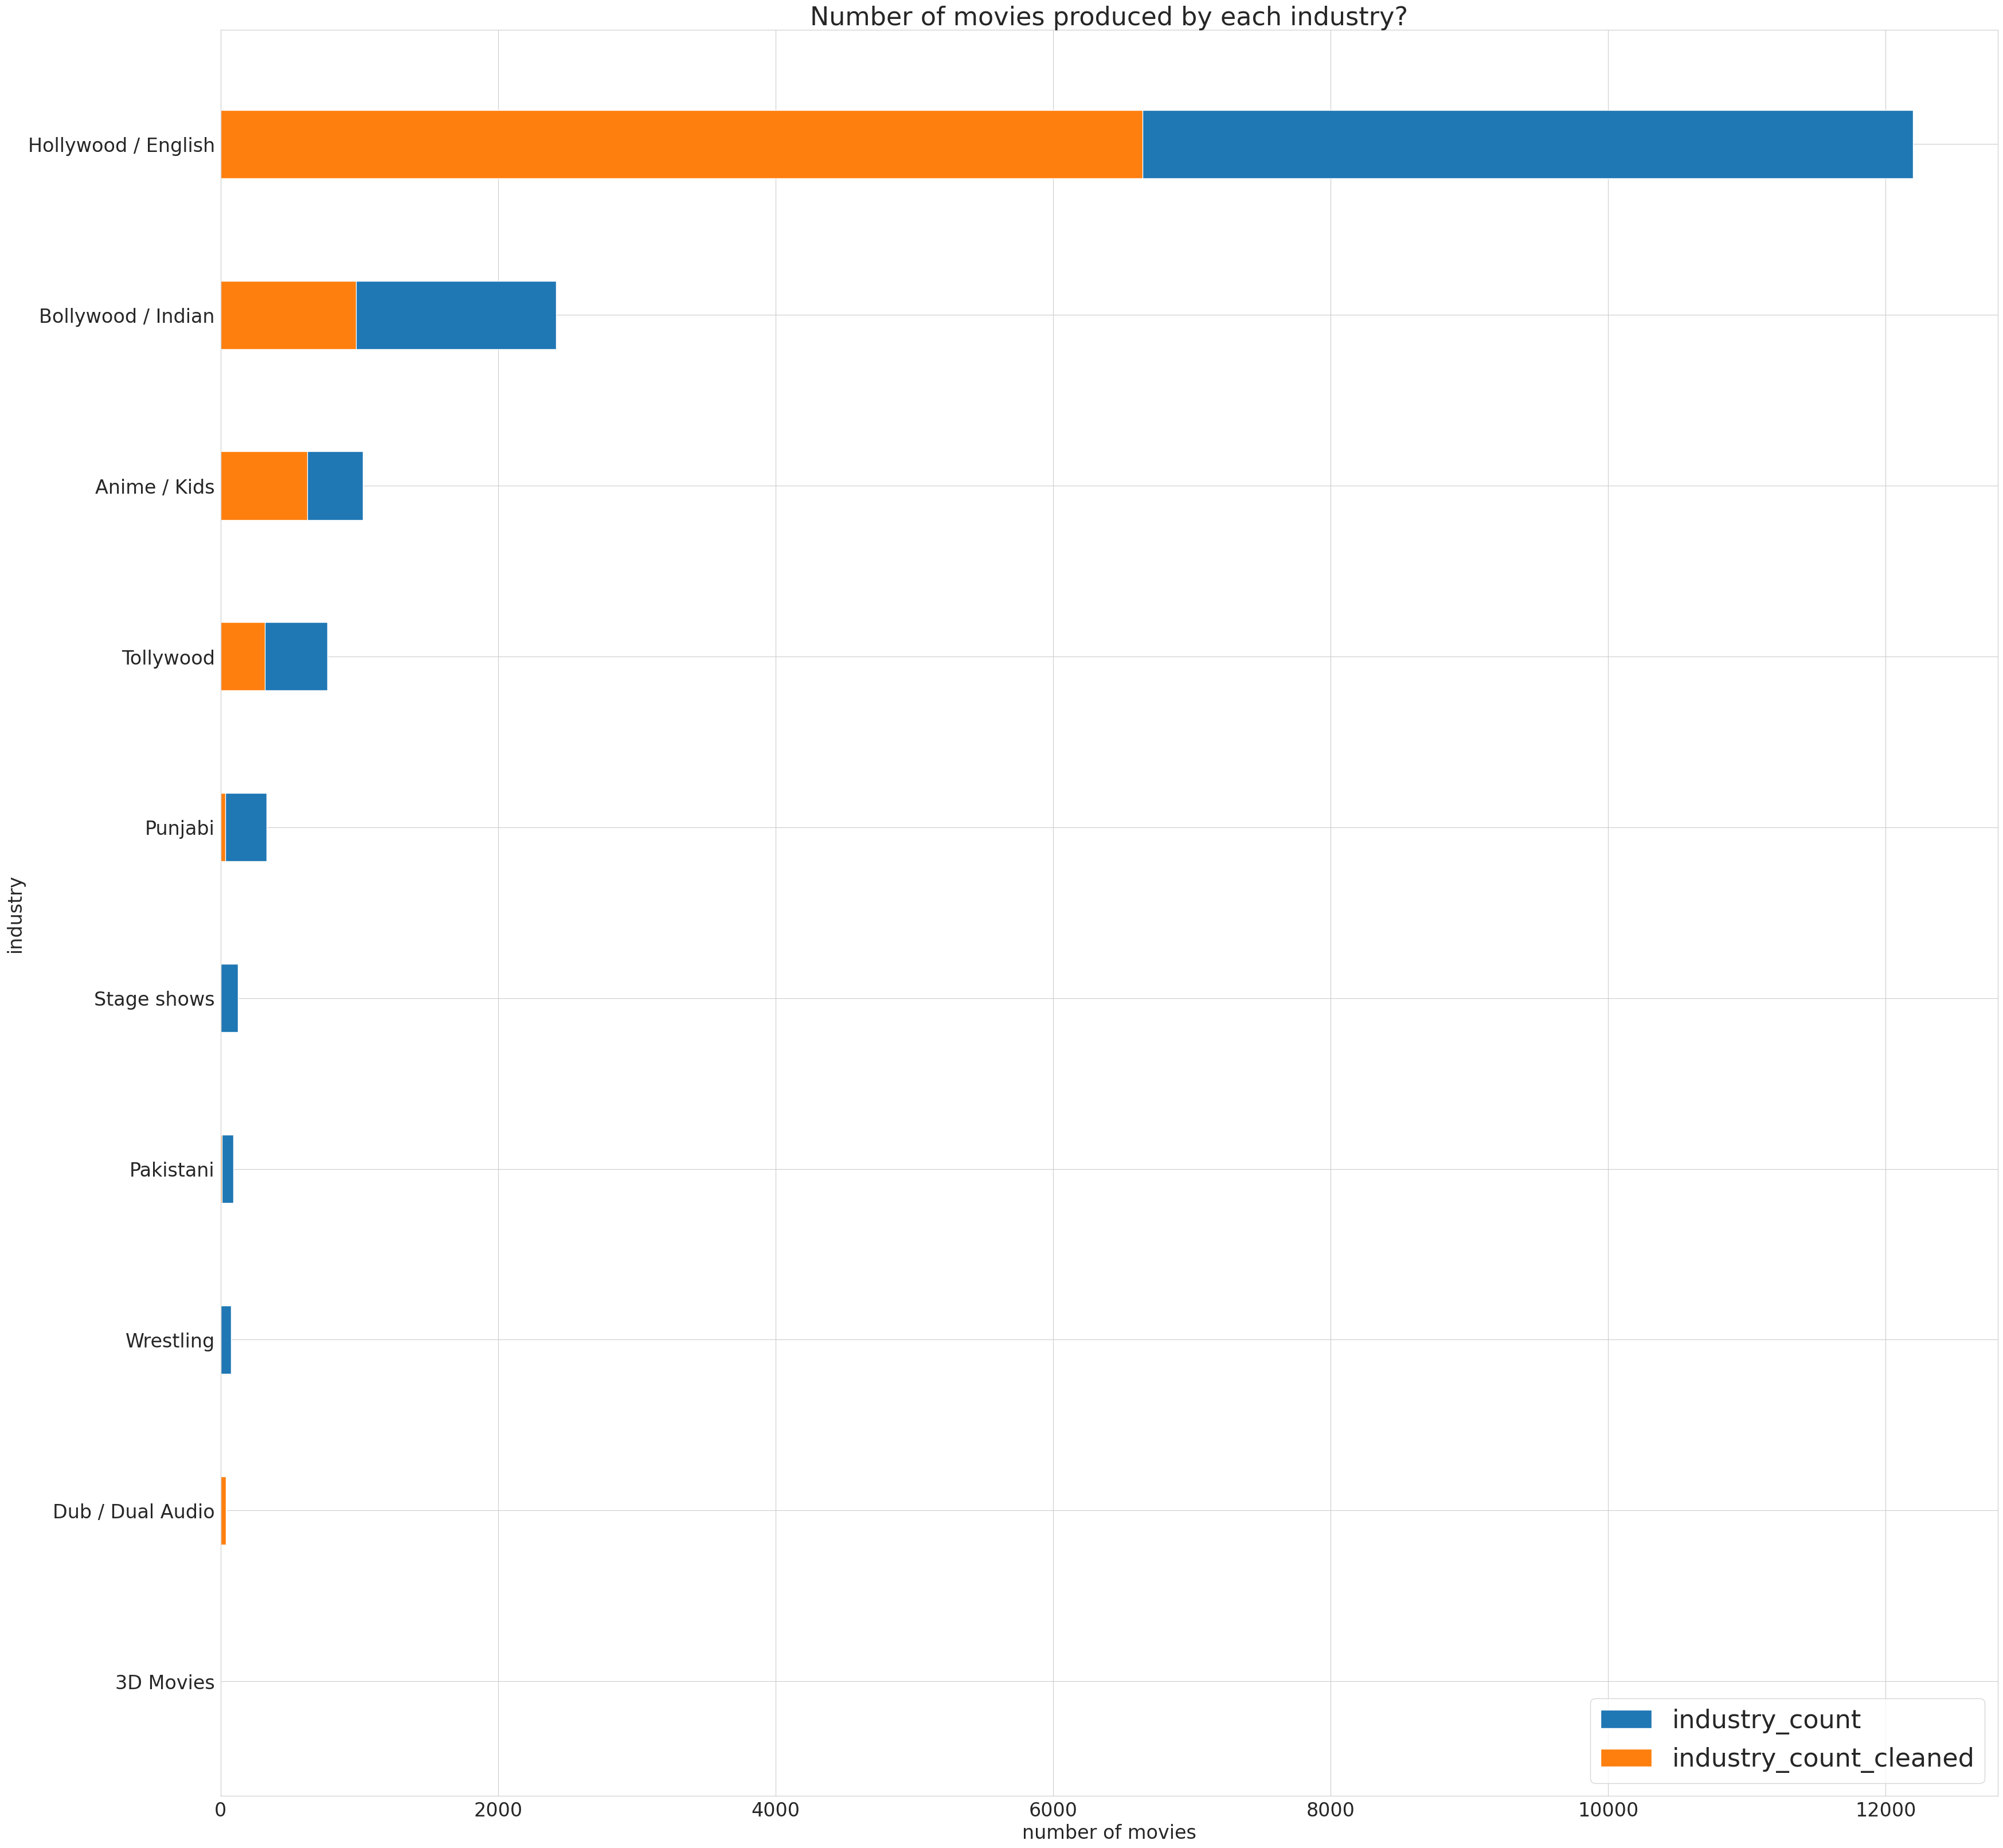

In [89]:
industry_count_cleaned = industry_count
industry_count_cleaned['industry_count_cleaned'] = [0] * len(industry_count)

for level in list(industry_count.index):
    if level in list(mov_data_cleaned['industry'].value_counts().index):
        industry_count_cleaned.loc[[level], ['industry_count_cleaned']] = mov_data_cleaned['industry'].value_counts().loc[[level]].values[0]

plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(industry_count_cleaned.index, width=industry_count_cleaned['industry_count'], height = 0.4, label='industry_count')
plt.barh(industry_count_cleaned.index, width=industry_count_cleaned['industry_count_cleaned'], height = 0.4, label='industry_count_cleaned')
plt.ylabel('industry', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies produced by each industry?', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

其他属性可以以同样的方式进行测试。通过这些比较，我们可以看到具有最高频率的值显著下降，因此，简单地删除会极大改变值分布的NaN不是一个好想法。

In [90]:
mov_data['appropriate_for'].isna().sum()

7277

### 用最高频数的值替换 NaN
通过这种方法清理的数据集被命名为 ***mov_data_HF_replaced***。

In [91]:
import copy
HF = {}
mov_data_HF_replaced = copy.deepcopy(mov_data)
for col in mov_data_HF_replaced:
    HF[col] = mov_data_HF_replaced[col].value_counts().index[0]
HF['language'] = 'English'

HF

{'IMDb-rating': 6.2,
 'appropriate_for': 'R',
 'director': 'David Dhawan',
 'downloads': 0.0,
 'id': '372092',
 'industry': 'Hollywood / English',
 'language': 'English',
 'posted_date': Timestamp('1970-01-01 00:00:00'),
 'release_date': Timestamp('1970-01-01 00:00:00'),
 'run_time': 90,
 'storyline': 'A young couple awakens a terrible force when they attempt to socialize their reclusive neighbor.',
 'title': 'Pinocchio',
 'views': 12350.0,
 'writer': 'Naresh Kathuria'}

In [92]:
for col in mov_data_HF_replaced:
    mov_data_HF_replaced[col] = mov_data_HF_replaced[col].replace(NA, HF[col])
mov_data_HF_replaced.isna().sum()

IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64

In [93]:
mov_data_HF_replaced.head(10)

IMDb-rating appropriate_for            director  downloads      id  \
0          4.8               R           John Swab      455.0  372092   
1          6.4           TV-PG         Paul Ziller       73.0  372091   
2          5.2               R        Ben Wheatley     1427.0  343381   
3          8.1               R        Venky Atluri     2379.0  372090   
4          4.6               R        Shaji Kailas      657.0  372089   
5          5.4               R  Srinivas Gavireddy      746.0  372088   
6          6.2           TV-PG        David Dhawan     5332.0  372059   
7          6.5               R      Benjamin Caron     1781.0  371751   
8          6.9           PG-13         Ravi Kapoor      458.0  372042   
9          4.2               R        Danny LeGare     1965.0  372041   

              industry       language posted_date release_date  run_time  \
0  Hollywood / English        English  2023-02-20   2023-01-28       105   
1  Hollywood / English        English  2023-02-20   2023-02-05        84   
2  Hollywood / English  English,Hindi  2021-04-20   2021-06-18       107   
3            Tollywood          Hindi  2023-02-20   2023-02-17       139   
4            Tollywood          Hindi  2023-02-20   2023-01-26       122   
5            Tollywood          Hindi  2023-02-20   2021-11-26       131   
6            Wrestling        English  2023-02-19   2023-02-18       200   
7  Hollywood / English        English  2023-02-13   2023-02-17       116   
8  Hollywood / English        English  2023-02-18   2022-12-02        80   
9  Hollywood / English        English  2023-02-18   2023-02-07        80   

                                           storyline  \
0  Doc\r\n facilitates a fragile truce between th...   
1  Caterer\r\n Goldy Berry reunites with detectiv...   
2  As the world searches for a cure to a disastro...   
3  The life of a young man and his struggles agai...   
4  A man named Kalidas gets stranded due to the p...   
5  Bagaram,\r\n after inheriting his grandfather'...   
6  Undisputed\r\n WWE Universal title: Reigns vs ...   
7  Motivations are suspect, and expectations are ...   
8  An\r\n unmotivated South Asian American rapper...   
9  A\r\n family moves back to a farm in the mothe...   

                                        title    views  \
0                                Little Dixie   4442.0   
1  Grilling Season: A Curious Caterer Mystery   1002.0   
2                                In the Earth  14419.0   
3                                      Vaathi   7891.0   
4                                       Alone   2438.0   
5                           Anubhavinchu Raja   2940.0   
6                     WWE Elimination Chamber  11978.0   
7                                     Sharper  18225.0   
8                                Four Samosas   6912.0   
9                               Blood Harvest   9710.0   

                                          writer  
0                                      John Swab  
1                         John Christian Plummer  
2                                   Ben Wheatley  
3                                   Venky Atluri  
4                               Rajesh Jayaraman  
5             Srinivas Gavireddy, Mayukh Adithya  
6                                Naresh Kathuria  
7              Brian Gatewood, Alessandro Tanaka  
8                                    Ravi Kapoor  
9  Michael Hultquist, Danny LeGare, Seth Metoyer

In [94]:
mov_data_HF_replaced['appropriate_for'].value_counts()

R                 11029
Not Rated          2264
PG-13              1763
PG                  884
TV-MA               406
TV-14               293
G                   140
TV-PG               115
TV-G                 99
TV-Y7                44
TV-Y                 25
Approved              9
NC-17                 4
TV-Y7-FV              3
Passed                3
MA-17                 1
TV-13                 1
Drama                 1
Drama, Romance        1
18+                   1
Name: appropriate_for, dtype: int64

为了判断这种方法是否好用，再次看一下几个属性的分布情况。

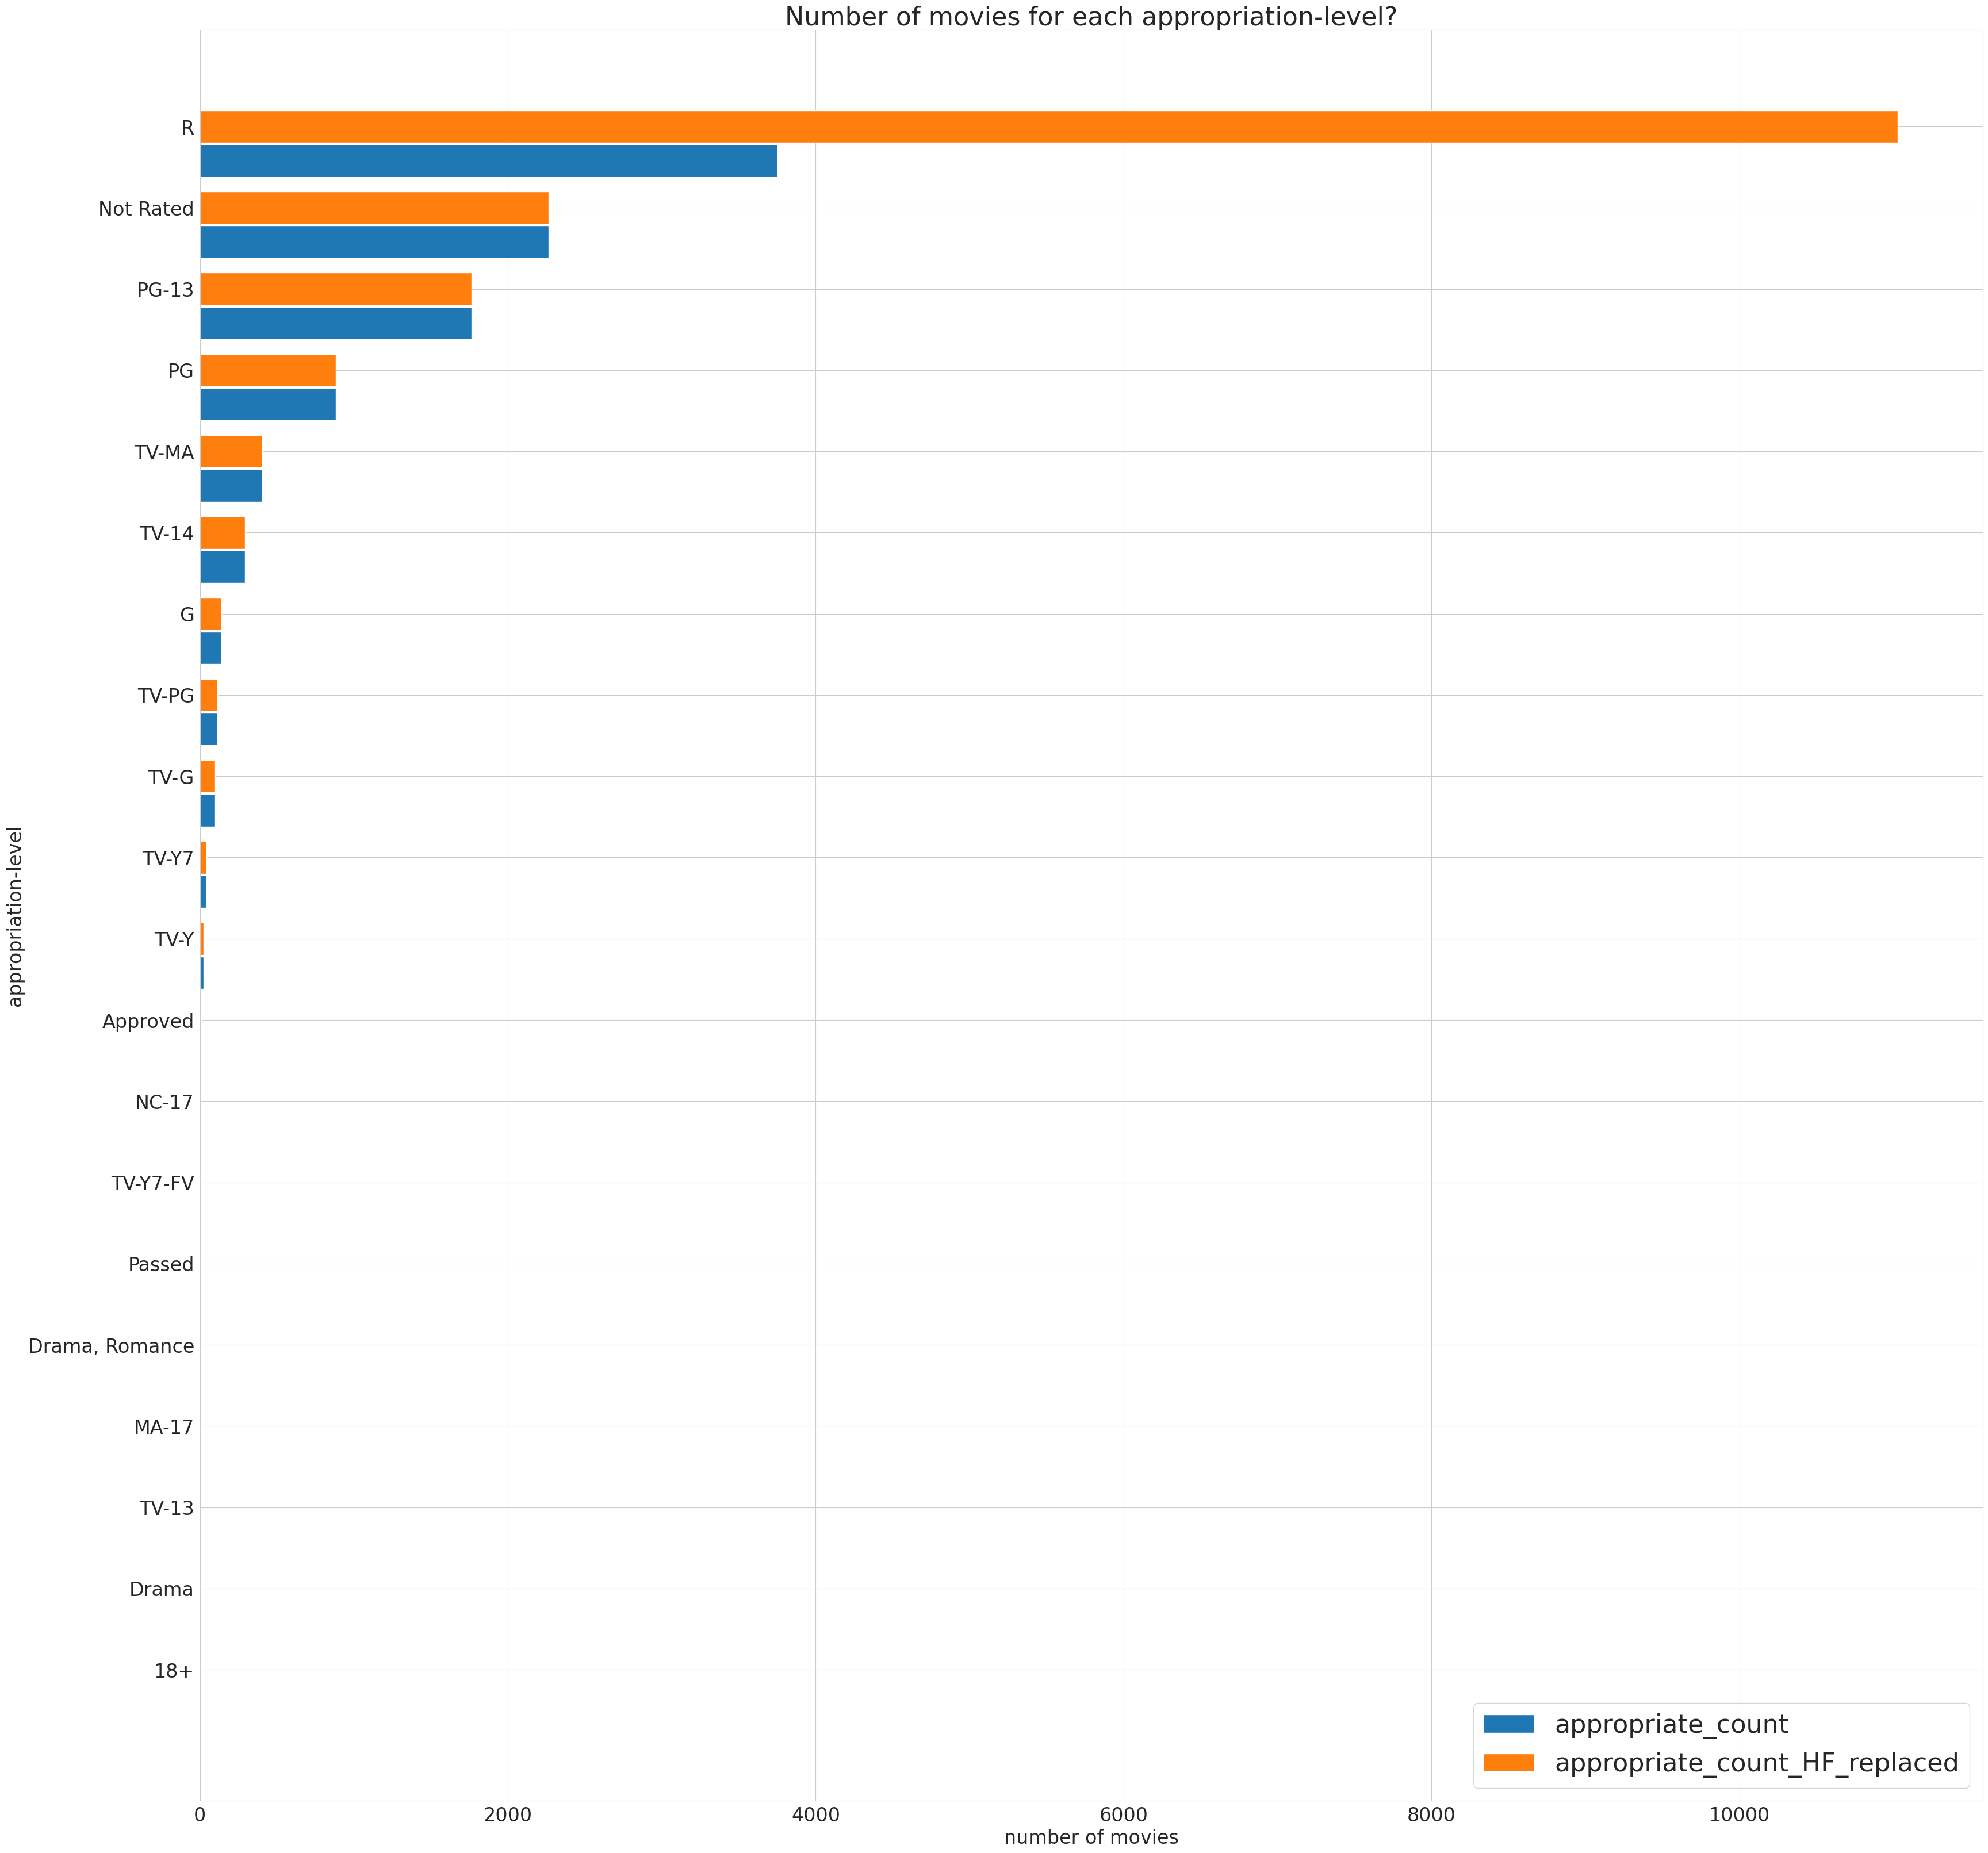

In [95]:
appropriate_count_HF_replaced = appropriate_count
appropriate_count_HF_replaced['appropriate_count_HF_replaced'] = [0] * len(appropriate_count)

for level in list(appropriate_count.index):
    if level in list(mov_data_HF_replaced['appropriate_for'].value_counts().index):
        appropriate_count_HF_replaced.loc[[level], ['appropriate_count_HF_replaced']] = mov_data_HF_replaced['appropriate_for'].value_counts().loc[[level]].values[0]

plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(range(len(appropriate_count_HF_replaced))), tick_label=appropriate_count_HF_replaced.index, width=appropriate_count_HF_replaced['appropriate_count'], label='appropriate_count', height=0.4)
plt.barh([d+0.42 for d in list(range(len(appropriate_count_HF_replaced)))], tick_label=appropriate_count_HF_replaced.index, width=appropriate_count_HF_replaced['appropriate_count_HF_replaced'], label='appropriate_count_HF_replaced', height=0.4)
plt.ylabel('appropriation-level', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies for each appropriation-level?', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

由于数据集中每个属性的最高频率值已经远远大于第二个值，这种方法会使该值变得更加频繁。看起来这不是一个好主意，但我们必须注意到除了`appropriate`之外，其他属性的空值比例不大。因此，与实施*.isna().drop()*方法相比，其他属性的分布变化不那么显著。

### 根据属性之间的相关性补充 NaN 值。

通过这种方法清理的数据集被命名为***mov_data_attr_corr***.

大多数属性都有缺失数据。因此，应该只使用具有少量NaN的属性作为基础。较好的选择是`views`和`downloads`。还可以使用`industry`、`language`、`posted_date`、`release_date`和`title`来计算与其他属性的相关性，但根据我们的经验，这些属性似乎与`appropriate_for`的相关性不太大。而考虑到`writer`和`director`，我们可能需要更多地考虑`language`，因为根据经验，这些可能是最相关的属性。

In [96]:
mov_data_attr_corr = copy.deepcopy(mov_data)

In [97]:
df_coded = pd.get_dummies(mov_data_attr_corr, columns=['appropriate_for'], dummy_na=True, drop_first=True)
df_coded.head()

IMDb-rating      director  downloads      id             industry  \
0          4.8     John Swab      455.0  372092  Hollywood / English   
1          6.4   Paul Ziller       73.0  372091  Hollywood / English   
2          5.2  Ben Wheatley     1427.0  343381  Hollywood / English   
3          8.1  Venky Atluri     2379.0  372090            Tollywood   
4          4.6  Shaji Kailas      657.0  372089            Tollywood   

        language posted_date release_date run_time  \
0        English  2023-02-20   2023-01-28      105   
1        English  2023-02-20   2023-02-05       84   
2  English,Hindi  2021-04-20   2021-06-18      107   
3          Hindi  2023-02-20   2023-02-17      139   
4          Hindi  2023-02-20   2023-01-26      122   

                                           storyline  ... appropriate_for_R  \
0  Doc\r\n facilitates a fragile truce between th...  ...                 1   
1  Caterer\r\n Goldy Berry reunites with detectiv...  ...                 0   
2  As the world searches for a cure to a disastro...  ...                 1   
3  The life of a young man and his struggles agai...  ...                 0   
4  A man named Kalidas gets stranded due to the p...  ...                 0   

   appropriate_for_TV-13 appropriate_for_TV-14  appropriate_for_TV-G  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   appropriate_for_TV-MA  appropriate_for_TV-PG  appropriate_for_TV-Y  \
0                      0                      0                     0   
1                      0                      1                     0   
2                      0                      0                     0   
3                      0                      0                     0   
4                      0                      0                     0   

   appropriate_for_TV-Y7  appropriate_for_TV-Y7-FV  appropriate_for_nan  
0                      0                         0                    0  
1                      0                         0                    0  
2                      0                         0                    0  
3                      0                         0                    1  
4                      0                         0                    1  

[5 rows x 33 columns]

In [98]:
df_coded.corr(method='spearman')

<ipython-input-98-35324e7065f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_coded.corr(method='spearman')


IMDb-rating  downloads     views  \
IMDb-rating                        1.000000   0.150422  0.143820   
downloads                          0.150422   1.000000  0.933962   
views                              0.143820   0.933962  1.000000   
appropriate_for_Approved           0.028334   0.008020  0.005540   
appropriate_for_Drama             -0.005230  -0.007849 -0.003979   
appropriate_for_Drama, Romance     0.009306   0.004260  0.007758   
appropriate_for_G                  0.047357   0.042654  0.019828   
appropriate_for_MA-17             -0.006370   0.002471  0.001651   
appropriate_for_NC-17              0.011396   0.007954  0.008774   
appropriate_for_Not Rated         -0.008354   0.298826  0.294812   
appropriate_for_PG                 0.071153   0.035123  0.030086   
appropriate_for_PG-13              0.147705   0.117488  0.118297   
appropriate_for_Passed             0.022666   0.002338 -0.002737   
appropriate_for_R                  0.075621   0.028449  0.014287   
appropriate_for_TV-13             -0.013393   0.006525  0.009388   
appropriate_for_TV-14             -0.037482  -0.020773 -0.000568   
appropriate_for_TV-G               0.033042  -0.055065 -0.052869   
appropriate_for_TV-MA             -0.016320  -0.030946 -0.004198   
appropriate_for_TV-PG              0.022588  -0.009082 -0.007841   
appropriate_for_TV-Y               0.003552   0.022792  0.018502   
appropriate_for_TV-Y7              0.014426   0.016489  0.016288   
appropriate_for_TV-Y7-FV          -0.000504  -0.003269 -0.004481   
appropriate_for_nan               -0.189953  -0.303651 -0.296643   

                                appropriate_for_Approved  \
IMDb-rating                                     0.028334   
downloads                                       0.008020   
views                                           0.005540   
appropriate_for_Approved                        1.000000   
appropriate_for_Drama                          -0.000176   
appropriate_for_Drama, Romance                 -0.000176   
appropriate_for_G                              -0.002087   
appropriate_for_MA-17                          -0.000176   
appropriate_for_NC-17                          -0.000351   
appropriate_for_Not Rated                      -0.008972   
appropriate_for_PG                             -0.005362   
appropriate_for_PG-13                          -0.007787   
appropriate_for_Passed                         -0.000304   
appropriate_for_R                              -0.012178   
appropriate_for_TV-13                          -0.000176   
appropriate_for_TV-14                          -0.003032   
appropriate_for_TV-G                           -0.001753   
appropriate_for_TV-MA                          -0.003582   
appropriate_for_TV-PG                          -0.001890   
appropriate_for_TV-Y                           -0.000879   
appropriate_for_TV-Y7                          -0.001166   
appropriate_for_TV-Y7-FV                       -0.000304   
appropriate_for_nan                            -0.019773   

                                appropriate_for_Drama  \
IMDb-rating                                 -0.005230   
downloads                                   -0.007849   
views                                       -0.003979   
appropriate_for_Approved                    -0.000176   
appropriate_for_Drama                        1.000000   
appropriate_for_Drama, Romance              -0.000059   
appropriate_for_G                           -0.000695   
appropriate_for_MA-17                       -0.000059   
appropriate_for_NC-17                       -0.000117   
appropriate_for_Not Rated                   -0.002990   
appropriate_for_PG                          -0.001787   
appropriate_for_PG-13                       -0.002595   
appropriate_for_Passed                      -0.000101   
appropriate_for_R                           -0.004058   
appropriate_for_TV-13                       -0.000059   
appropriate_for_TV-14                       -0

<ipython-input-99-ee8a509c0ba9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_coded.corr(method='spearman'), cmap='YlGnBu', annot=True)


Text(0.5, 1.0, 'Correlation Analysis')

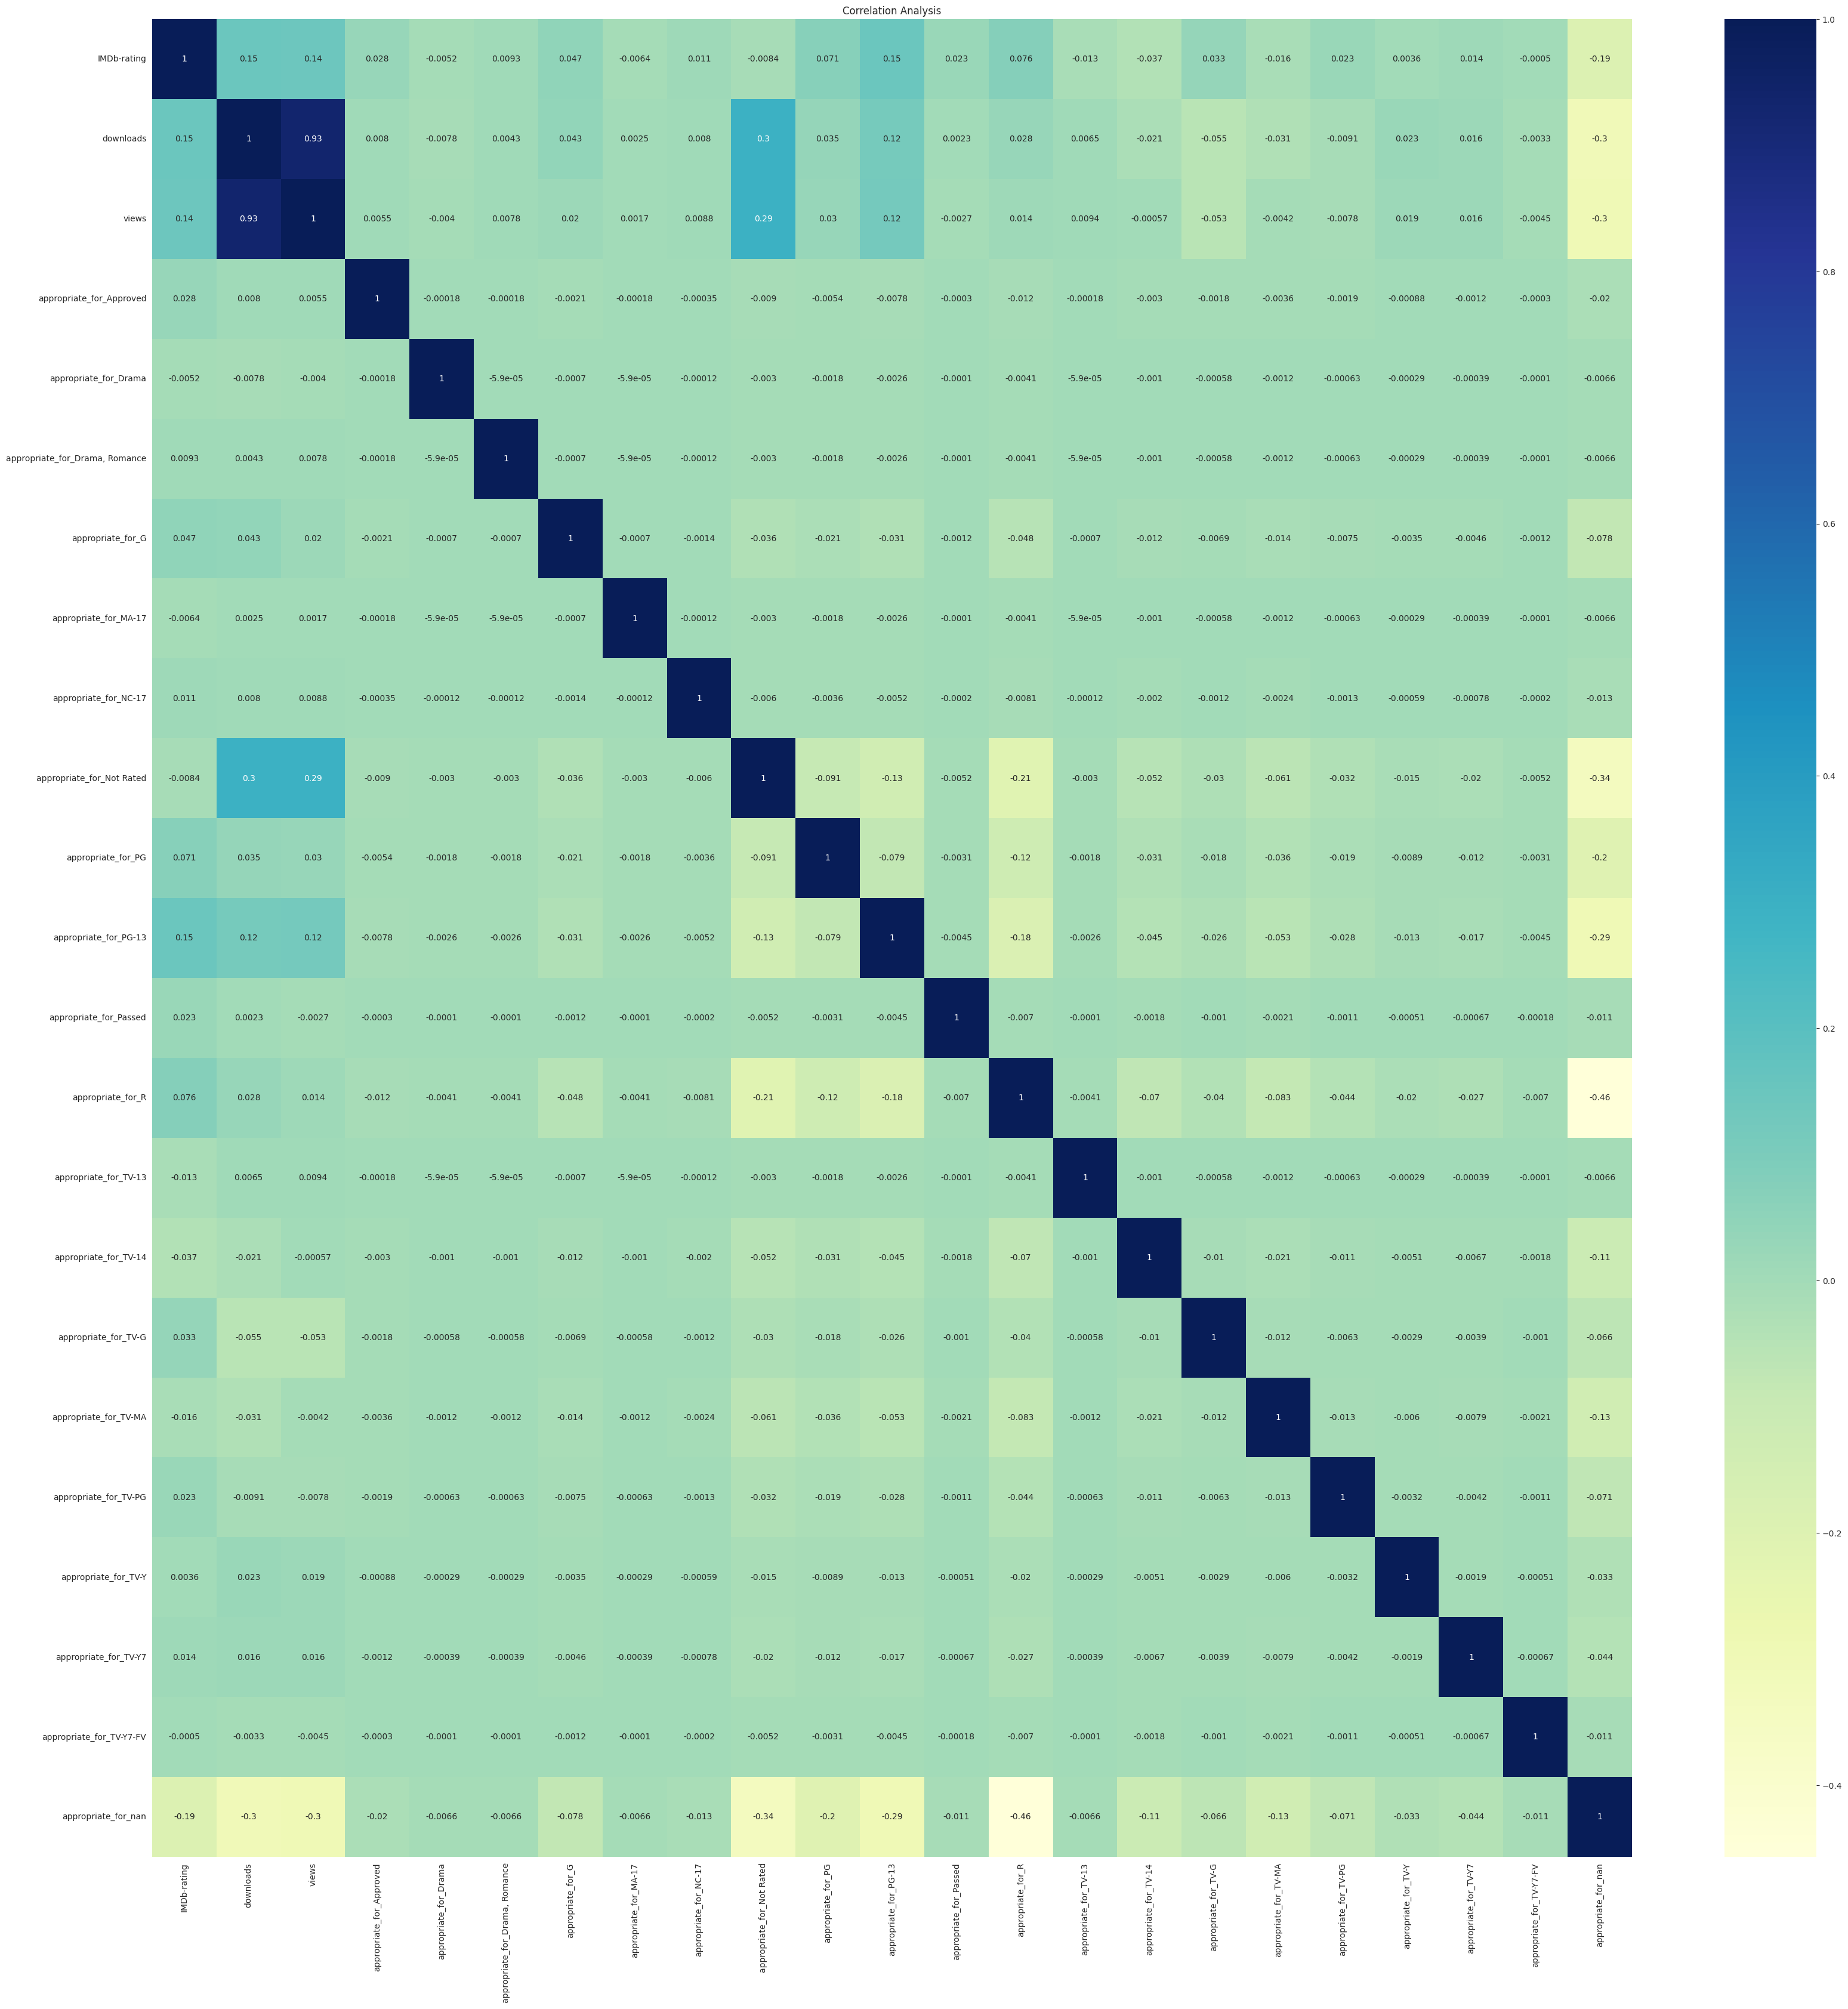

In [99]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_coded.corr(method='spearman'), cmap='YlGnBu', annot=True)
plt.title('Correlation Analysis')

从热力图中可以看到，`appropriate_for`与其他属性的相关性较弱（不超过0.3）。因此，知道使用属性之间的相关性来替换`appropriate_for`列中的NaN并不是一个好主意。使用`IMDb-rating`来完成这个补全，因为它是所有属性中相关性最强的属性。

<ipython-input-101-1c53b05cadaa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  level_views_box = sns.catplot(data=mov_data, kind='box', y='appropriate_for', x='IMDb-rating', height=20, palette='rocket')


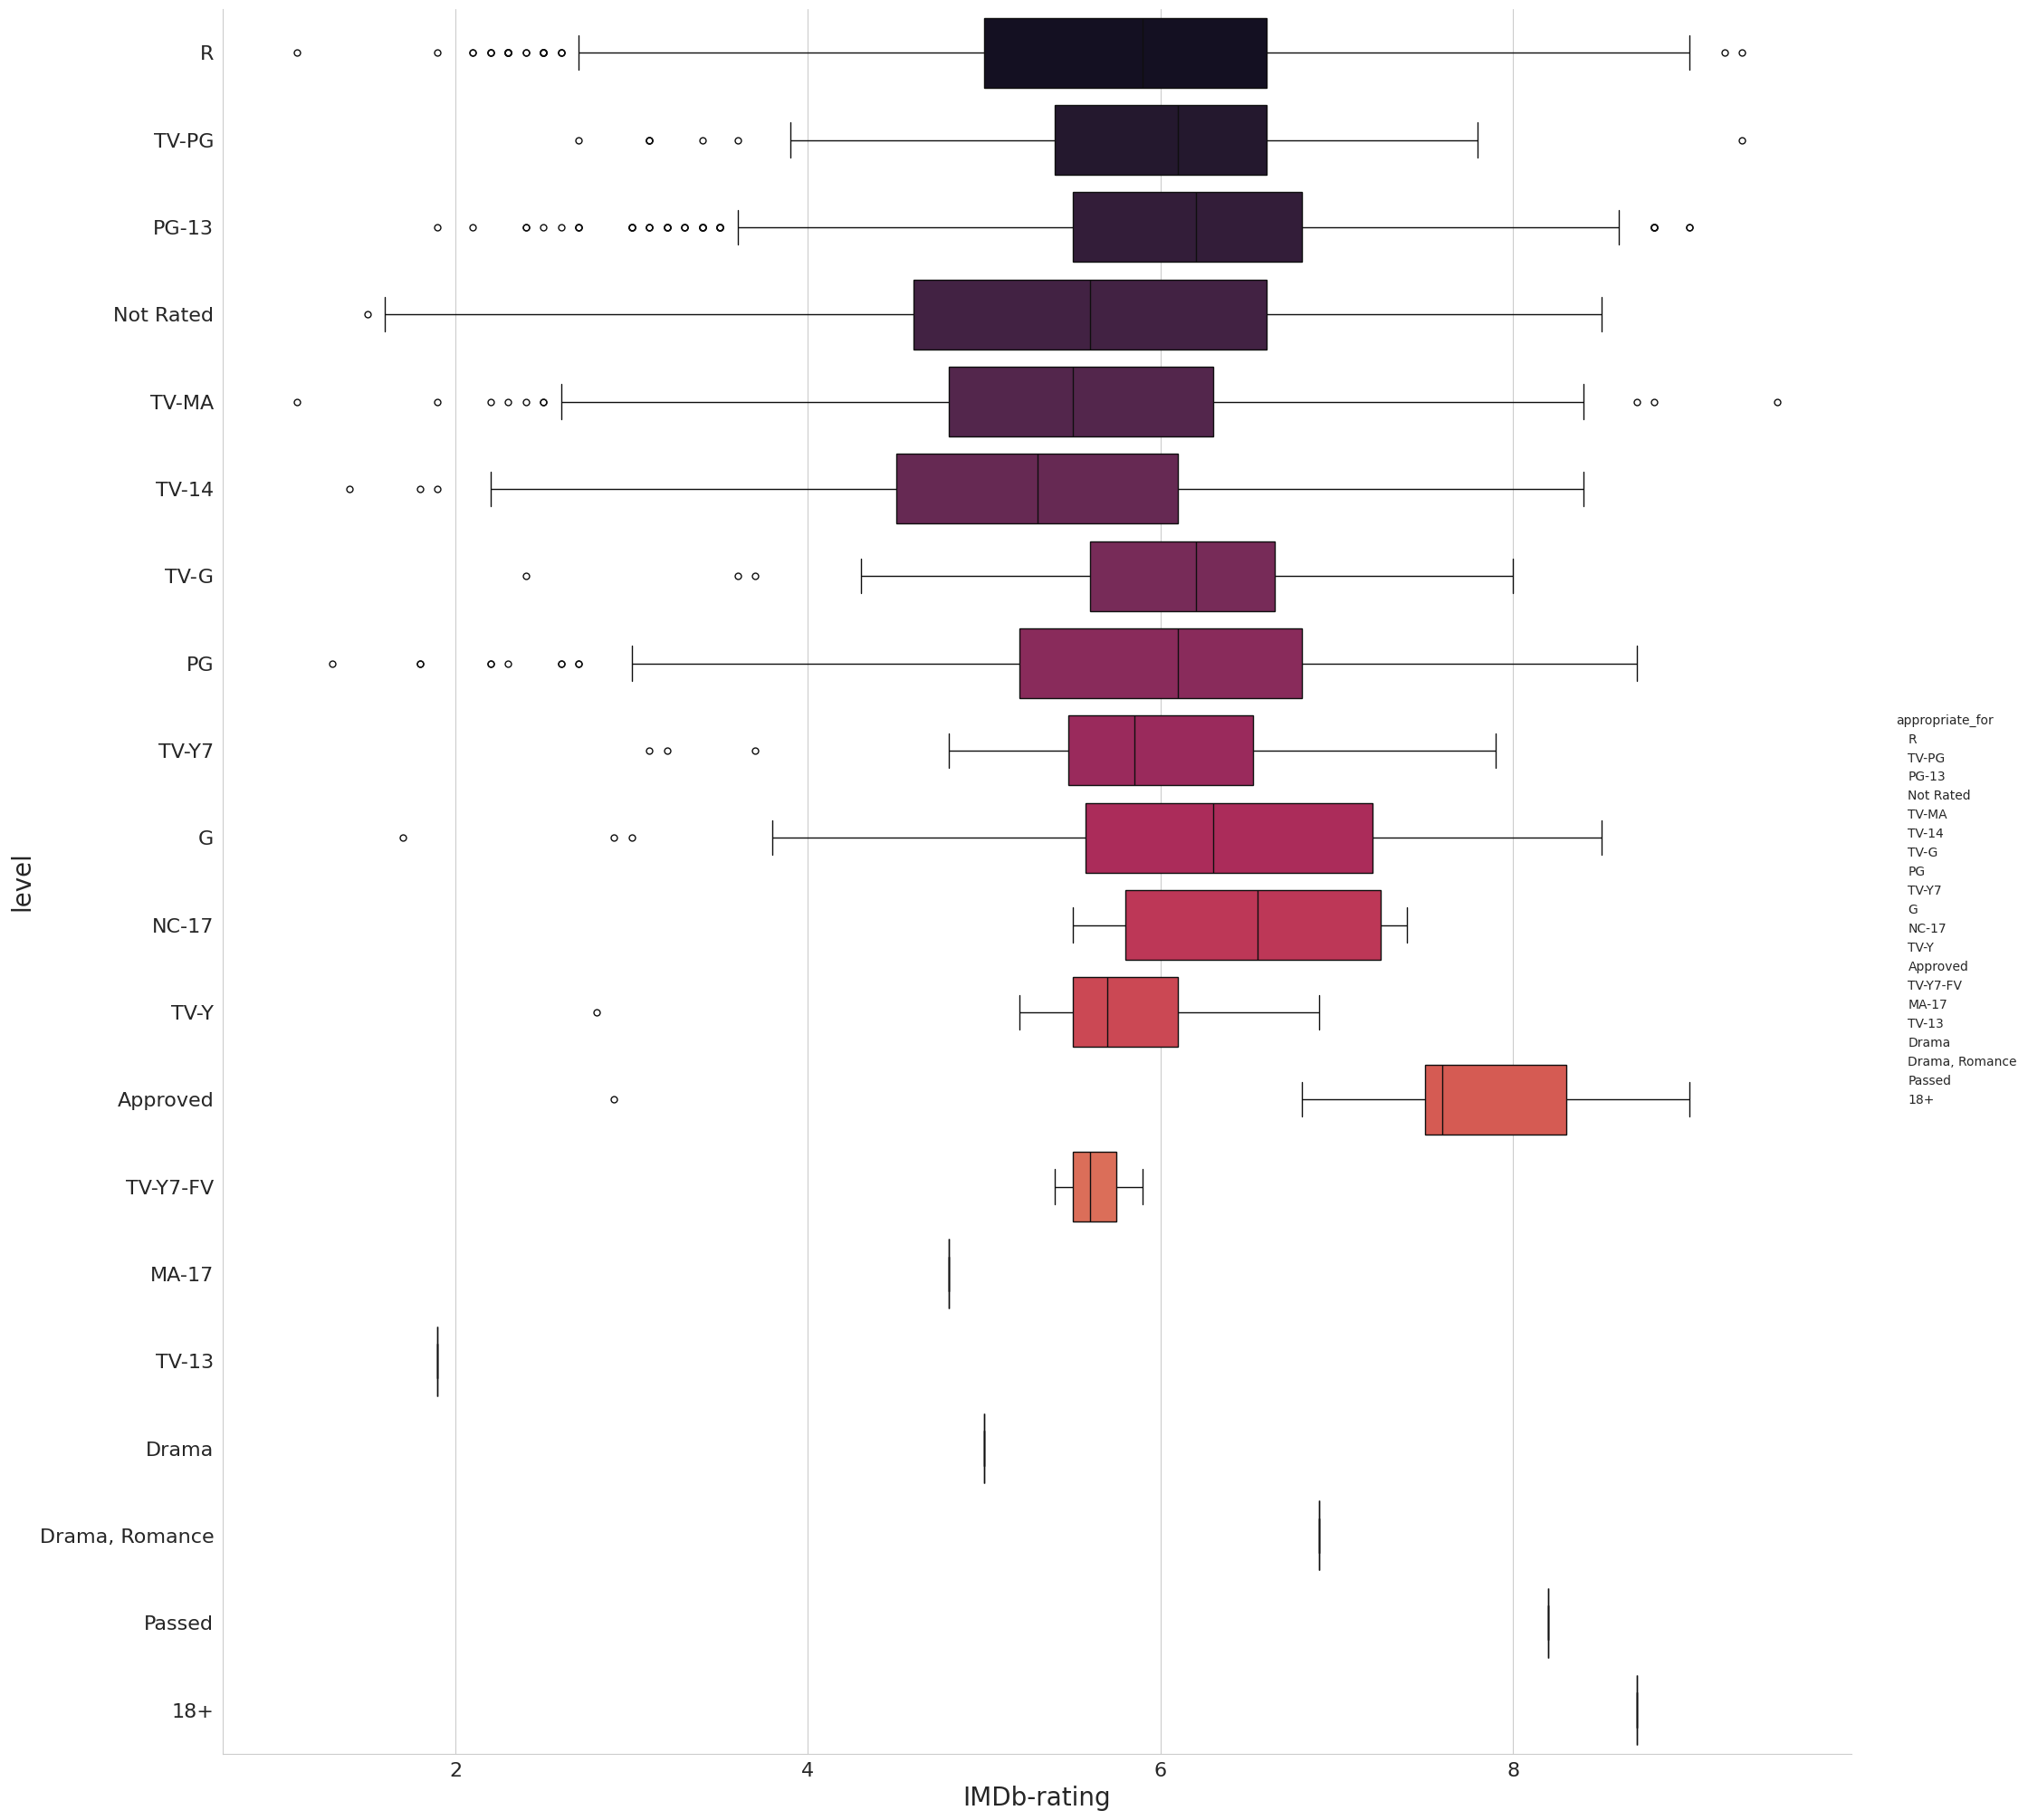

In [101]:
sns.set_style("whitegrid")
level_views_box = sns.catplot(data=mov_data, kind='box', y='appropriate_for', x='IMDb-rating', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('level', fontsize=20, )
plt.xlabel('IMDb-rating', fontsize=20)
plt.show()

In [102]:
df1 = mov_data_attr_corr.groupby('appropriate_for').agg(avg=('IMDb-rating', 'mean'))
df1

avg
appropriate_for          
18+              8.700000
Approved         7.411111
Drama            5.000000
Drama, Romance   6.900000
G                6.260714
MA-17            4.800000
NC-17            6.500000
Not Rated        5.559187
PG               5.973099
PG-13            6.122500
Passed           8.200000
R                5.770883
TV-13            1.900000
TV-14            5.235154
TV-G             6.076768
TV-MA            5.477833
TV-PG            5.922807
TV-Y             5.708000
TV-Y7            5.934091
TV-Y7-FV         5.633333

In [103]:
mov_data_attr_corr

IMDb-rating appropriate_for                   director  downloads  \
0              4.8               R                  John Swab      455.0   
1              6.4           TV-PG                Paul Ziller       73.0   
2              5.2               R               Ben Wheatley     1427.0   
3              8.1             NaN               Venky Atluri     2379.0   
4              4.6             NaN               Shaji Kailas      657.0   
...            ...             ...                        ...        ...   
20521          7.8             NaN                Yash Chopra     2433.0   
20522          7.1       Not Rated                  Biren Nag     1932.0   
20533          5.6               R  Barbara Topsøe-Rothenborg    12284.0   
20534          7.9             NaN                 Raj Kapoor     5625.0   
20545          8.0             NaN                        NaN     3276.0   

           id             industry                language posted_date  \
0      372092  Hollywood / English                 English  2023-02-20   
1      372091  Hollywood / English                 English  2023-02-20   
2      343381  Hollywood / English           English,Hindi  2021-04-20   
3      372090            Tollywood                   Hindi  2023-02-20   
4      372089            Tollywood                   Hindi  2023-02-20   
...       ...                  ...                     ...         ...   
20521   22874   Bollywood / Indian           Hindi,English  1970-01-01   
20522   23825   Bollywood / Indian                   Hindi  1970-01-01   
20533    1173  Hollywood / English  Spanish,German,English  2016-05-26   
20534    6839   Bollywood / Indian                   Hindi  1970-01-01   
20545   30459   Bollywood / Indian                   Hindi  1970-01-01   

      release_date run_time  \
0       2023-01-28      105   
1       2023-02-05       84   
2       2021-06-18      107   
3       2023-02-17      139   
4       2023-01-26      122   
...            ...      ...   
20521   1965-07-28      178   
20522   1962-05-11      158   
20533   1970-01-01       90   
20534   1954-01-25      193   
20545   1958-03-28      110   

                                               storyline  \
0      Doc\r\n facilitates a fragile truce between th...   
1      Caterer\r\n Goldy Berry reunites with detectiv...   
2      As the world searches for a cure to a disastro...   
3      The life of a young man and his struggles agai...   
4      A man named Kalidas gets stranded due to the p...   
...                                                  ...   
20521  Members of a family are separated in a natural...   
20522  After a lusty Thakur rapes a young girl, she k...   
20533  LOVE AT FIRST HICCUP is a charming, innocent, ...   
20534  Raju lives as a derelict as a result of being ...   
20545  While driving his car on a rainy night, Anand'...   

                                            title    views  \
0                                    Little Dixie   4442.0   
1      Grilling Season: A Curious Caterer Mystery   1002.0   
2                                    In the Earth  14419.0   
3                                          Vaathi   7891.0   
4                                           Alone   2438.0   
...                                           ...      ...   
20521                                        Waqt   6908.0   
20522                              Bees Saal Baad   6077.0   
20533                        Love at First Hiccup  36022.0   
20534                                      Awaara  13829.0   
20545                                   Madhumati   7220.0   

                                                  writer  
0                                              John Swab  
1                                 John Christian Plummer  
2                                           Ben Wheatley  
3                                           Venky Atluri  
4                                       Rajesh Jayaraman  
...         

In [104]:
mov_data_attr_corr = mov_data
for i in range(len(mov_data_attr_corr)):
    if mov_data_attr_corr['appropriate_for'].iloc[i] is NA:
        rate = mov_data_attr_corr['IMDb-rating'].iloc[i]
        dist = []
        for j in range(len(df1)):
            dist.append(abs(df1.iloc[j]['avg']-rate))
        idx = dist.index(min(dist))
        mov_data_attr_corr['appropriate_for'].iloc[i] = df1.index[idx]
mov_data_attr_corr['appropriate_for'].value_counts()

<ipython-input-104-da884c2b10bb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_data_attr_corr['appropriate_for'].iloc[i] = df1.index[idx]


R                 3946
Not Rated         2264
MA-17             1979
PG-13             1950
PG                1070
TV-MA              868
TV-14              692
Drama              549
G                  512
18+                501
Drama, Romance     474
TV-13              451
NC-17              410
Approved           392
TV-PG              316
TV-Y               231
TV-Y7-FV           218
Passed             120
TV-G                99
TV-Y7               44
Name: appropriate_for, dtype: int64

现在，将***mov_data_attr_corr***与原始数据集***mov_data***进行比较。

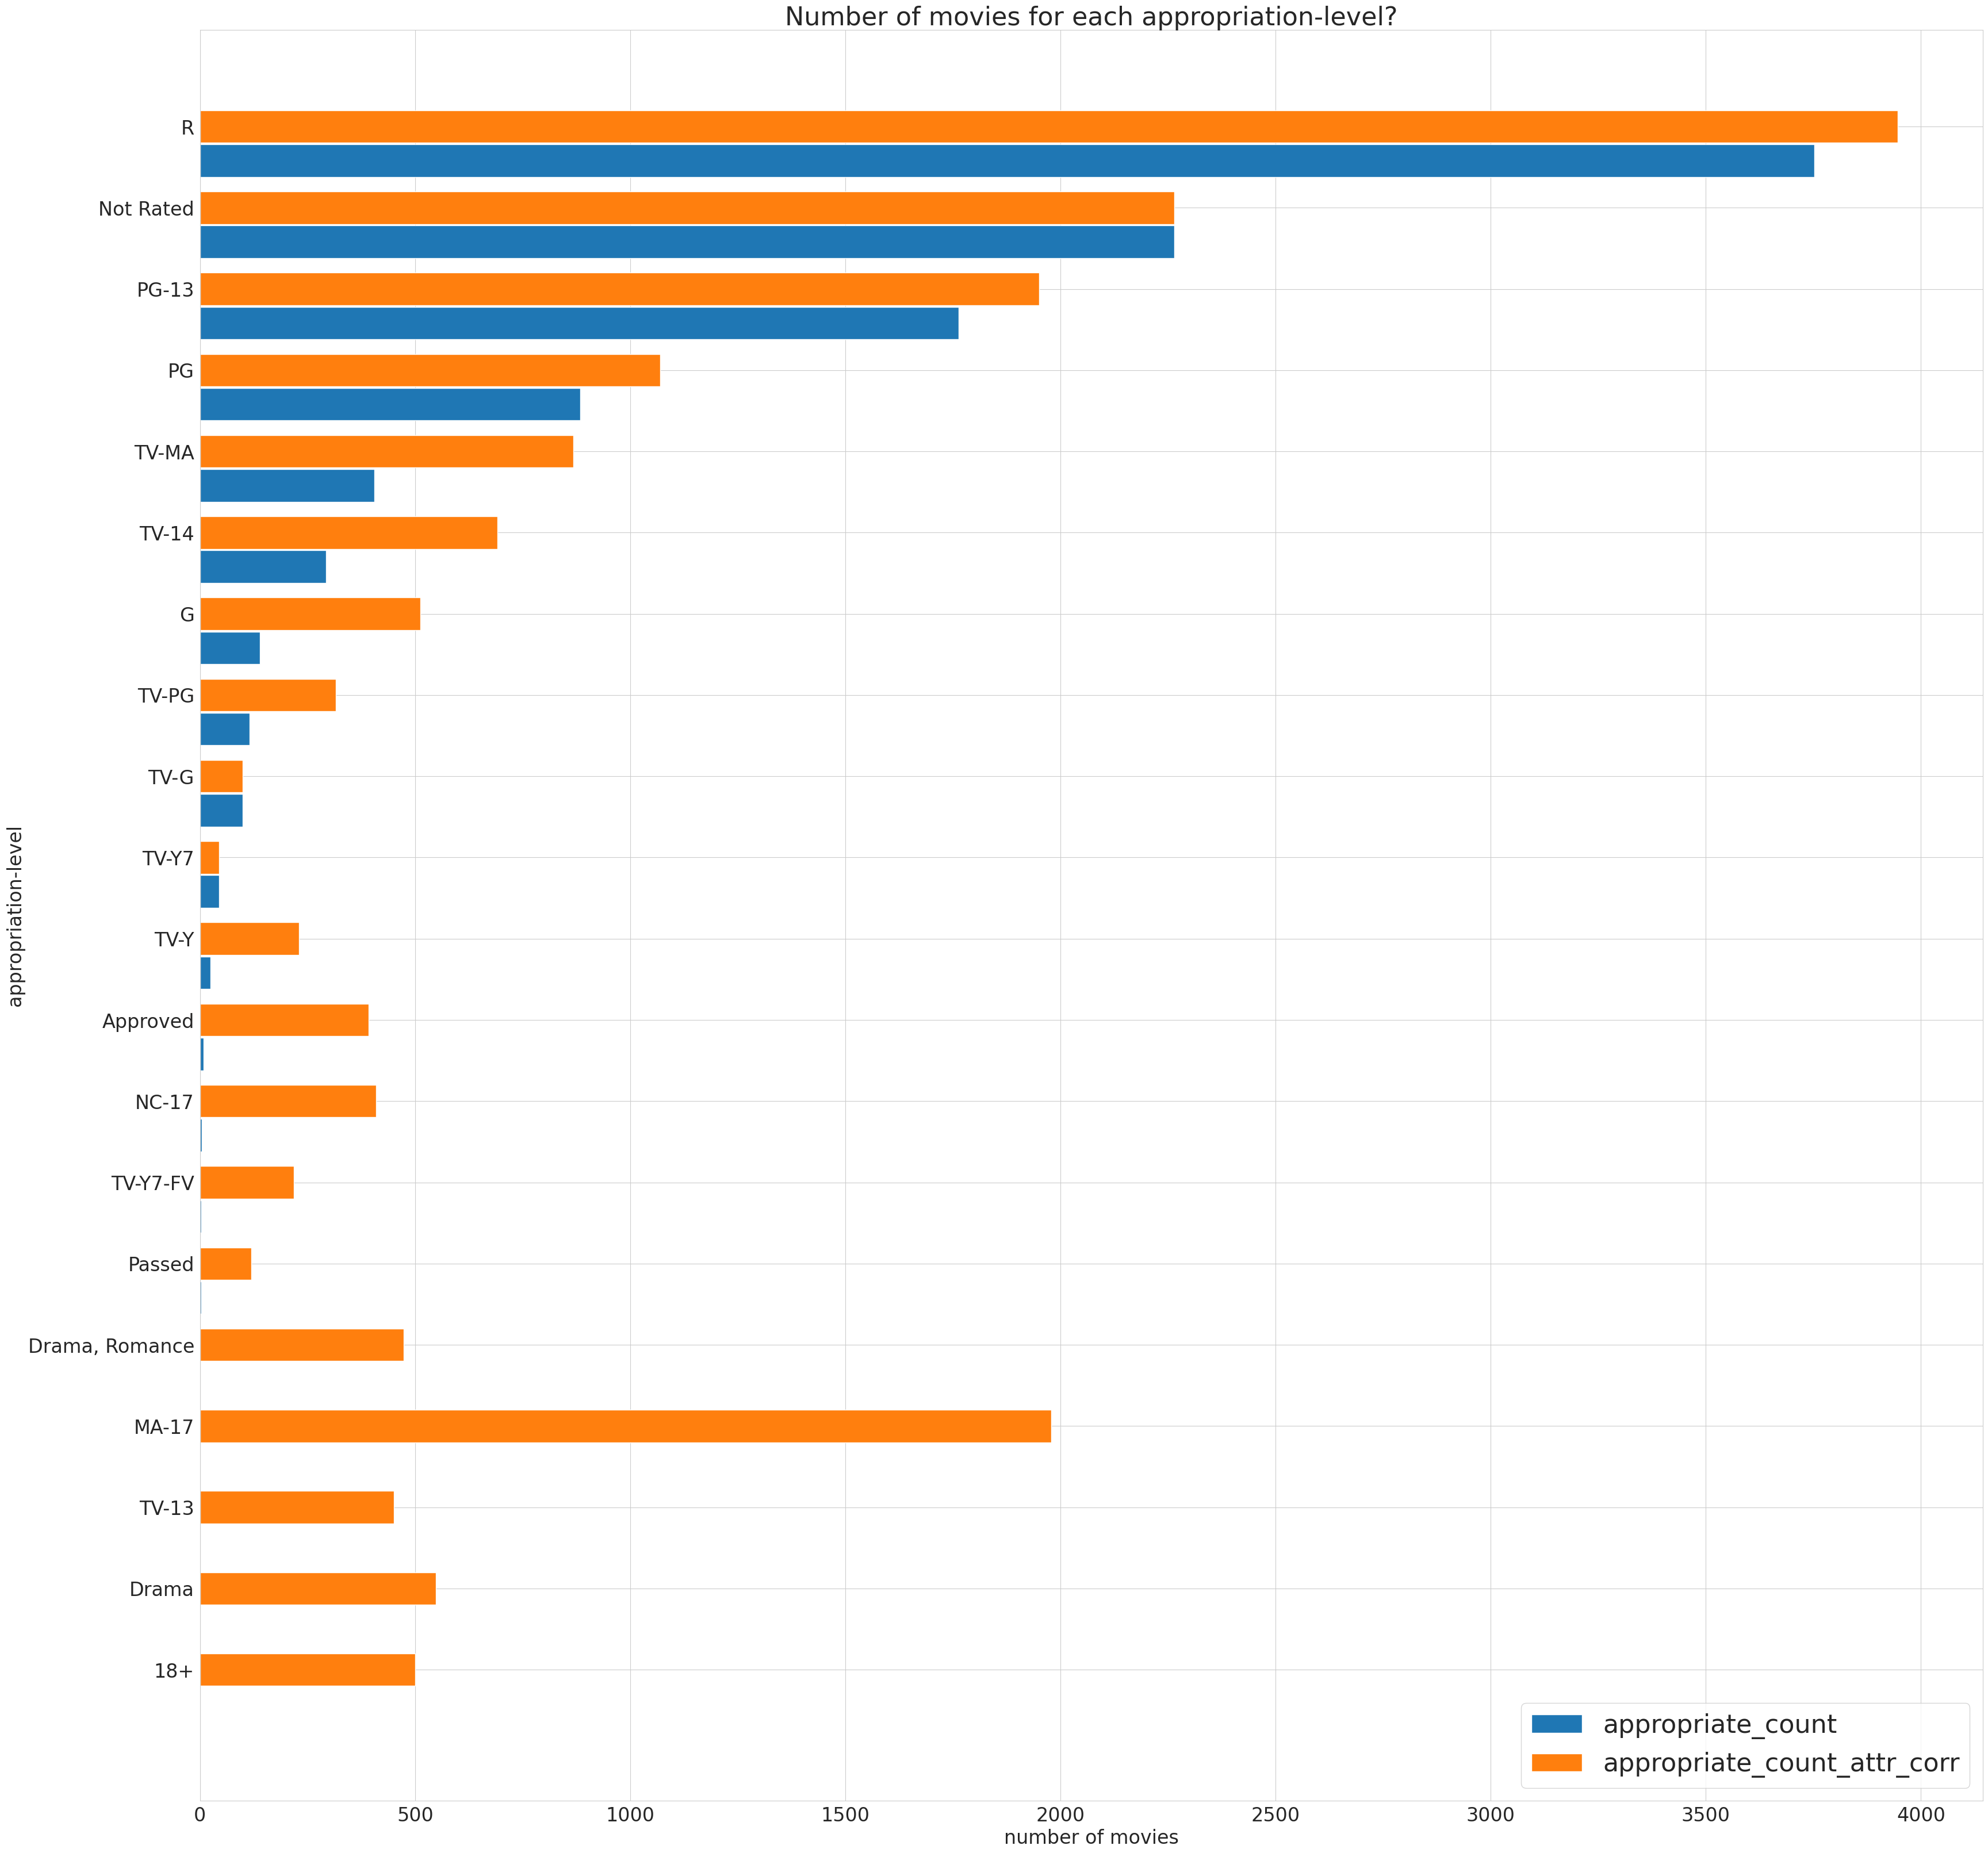

In [105]:
appropriate_count_attr_corr = appropriate_count
appropriate_count_attr_corr['appropriate_count_attr_corr'] = [0] * len(appropriate_count)

for level in list(appropriate_count.index):
    if level in list(mov_data_attr_corr['appropriate_for'].value_counts().index):
        appropriate_count_attr_corr.loc[[level], ['appropriate_count_attr_corr']] = mov_data_attr_corr['appropriate_for'].value_counts().loc[[level]].values[0]

plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(range(len(appropriate_count_attr_corr))), tick_label=appropriate_count_attr_corr.index, width=appropriate_count_attr_corr['appropriate_count'], label='appropriate_count', height=0.4)
plt.barh([d+0.42 for d in list(range(len(appropriate_count_attr_corr)))], tick_label=appropriate_count_attr_corr.index, width=appropriate_count_attr_corr['appropriate_count_attr_corr'], label='appropriate_count_attr_corr', height=0.4)
plt.ylabel('appropriation-level', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies for each appropriation-level?', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

这种方法使得数据更加平滑，但即使是对于在appropriate_count中没有数据的级别，这种方法仍然增加了很多。原因可能是相关性实际上太弱，因此这种方法并不适合这个数据集。

### 根据样本之间的相关性替换 NaN 值

通过这种方法清理的数据集被命名为***mov_data_sample_corr***.

In [106]:
mov_data_sample_corr = copy.deepcopy(mov_data)

In [107]:
mov_data.columns

Index(['IMDb-rating', 'appropriate_for', 'director', 'downloads', 'id',
       'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

In [108]:
def regularit(df):
    new_df = pd.DataFrame(index=df.index)
    columns = ['IMDb-rating', 'downloads', 'views']
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        new_df[c] = ((d - MIN) / (d - MAX))
    return new_df

In [109]:
normal_mov_data = regularit(mov_data)
normal_mov_data

IMDb-rating  downloads     views
0        -0.725490  -0.001164 -0.002310
1        -1.514286  -0.000187 -0.000205
2        -0.872340  -0.003660 -0.008467
3        -3.888889  -0.006117 -0.004430
4        -0.660377  -0.001682 -0.001082
...            ...        ...       ...
20521    -3.190476  -0.006257 -0.003825
20522    -2.142857  -0.004962 -0.003314
20533    -1.046512  -0.032413 -0.022062
20534    -3.400000  -0.014586 -0.008101
20545    -3.631579  -0.008443 -0.004017

[17086 rows x 3 columns]

In [110]:
normal_appropriate = pd.concat([normal_mov_data, mov_data['appropriate_for']], axis=1)
normal_appropriate

IMDb-rating  downloads     views appropriate_for
0        -0.725490  -0.001164 -0.002310               R
1        -1.514286  -0.000187 -0.000205           TV-PG
2        -0.872340  -0.003660 -0.008467               R
3        -3.888889  -0.006117 -0.004430          Passed
4        -0.660377  -0.001682 -0.001082           MA-17
...            ...        ...       ...             ...
20521    -3.190476  -0.006257 -0.003825        Approved
20522    -2.142857  -0.004962 -0.003314       Not Rated
20533    -1.046512  -0.032413 -0.022062               R
20534    -3.400000  -0.014586 -0.008101          Passed
20545    -3.631579  -0.008443 -0.004017          Passed

[17086 rows x 4 columns]

In [113]:
infos = []
for i in range(len(normal_appropriate)):
    info = []
    rate = normal_appropriate['IMDb-rating'].iloc[i]
    download = normal_appropriate['downloads'].iloc[i]
    view = normal_appropriate['views'].iloc[i]
    info.append(rate)
    info.append(download)
    info.append(view)
    infos.append(info)

In [114]:
for i in range(len(normal_appropriate)):
    if normal_appropriate['appropriate_for'].iloc[i] is NA:
        dists = []
        for j in len(rates):
            dist = np.sqrt(np.sum(np.square(infos[i] - infos[j])))
            dists.append(dist)
        idx = dists.index(min(dists))
        mov_data_sample_corr['appropriate_for'].iloc[i] = mov_data_sample_corr['appropriate_for'].iloc[idx]
mov_data_sample_corr['appropriate_for'].value_counts()

R                 3946
Not Rated         2264
MA-17             1979
PG-13             1950
PG                1070
TV-MA              868
TV-14              692
Drama              549
G                  512
18+                501
Drama, Romance     474
TV-13              451
NC-17              410
Approved           392
TV-PG              316
TV-Y               231
TV-Y7-FV           218
Passed             120
TV-G                99
TV-Y7               44
Name: appropriate_for, dtype: int64

这个结果与之前的方法非常相似。原因可能是在这里使用的三个属性高度相关，因此当我们使用它们来衡量样本之间的相关性时，结果变化不大。